# Installs and Imports

I will use pycarets time series library to help with efficiently performing the needed statistical tests on the time-series for stationarity, assessing correlation / lag correlation of exogenous variables, and rapid/automated back-testing cross-validation of traditional ML models to assess what will be most effective for forecasting these time series.

In [1]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.1/468.1 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pycaret.time_series import *

In [4]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

In [5]:
import numpy as np

In [6]:
import itertools

In [7]:
from datetime import date

In [8]:
from IPython.core.interactiveshell import InteractiveShell

In [9]:
# Only enable critical logging (Optional)
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [10]:
import seaborn as sns

In [11]:
def what_is_installed():
    from pycaret import show_versions

    show_versions()


try:
    what_is_installed()
except ModuleNotFoundError:
    # !pip install pycaret-ts-alpha
    # what_is_installed()
    pass


System:
    python: 3.8.10 (default, Nov 14 2022, 12:59:47)  [GCC 9.4.0]
executable: /usr/bin/python3
   machine: Linux-5.10.147+-x86_64-with-glibc2.29

Python dependencies:
          pip: 22.0.4
   setuptools: 57.4.0
      pycaret: 3.0.0
      sklearn: 1.0.2
       sktime: 0.10.1
  statsmodels: 0.13.5
        numpy: 1.21.6
        scipy: 1.7.3
       pandas: 1.3.5
   matplotlib: 3.2.2
       plotly: 5.5.0
       joblib: 1.0.1
        numba: 0.55.2
       mlflow: Not installed
     lightgbm: 3.3.5
      xgboost: 0.90
     pmdarima: 2.0.2
        tbats: 1.1.2
      prophet: 1.1.2
      tsfresh: Not installed


In [12]:
import plotly

In [13]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 85.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=bf2c1bfa57edd52e8c274d1b12b726df56b30f044d5

#  ECOM - Data Intake Ecom Univariate w/ Exogenous Var

This data set represents a company's own .com footwear sales.  It represents by-day quantity sales by order-placed date from Jan 2017 - Dec 2022.  This represents all product data in aggregation.  

ds = Order placement date
y = Quantity ordered
disc = Mean discount % for the day (indicative of total promotional activity)

In [ ]:
ecom_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/Exogenous Var Test/ECOM_UNI_QTY_DISC.csv')

In [ ]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1836 non-null   object
 1   y       1836 non-null   object
 2   disc    1836 non-null   object
dtypes: object(3)
memory usage: 43.2+ KB


In [ ]:
ecom_data

ds           y      disc
0         12/23/2014           1    1.0000
1         08/17/2016           2    0.0000
2         03/11/2017           3    0.0000
3         03/30/2017           2    0.2061
4         04/27/2017           2    0.0000
...              ...         ...       ...
1831      12/28/2022       2,167   -1.2874
1832      12/29/2022      15,497  -10.4274
1833      12/30/2022      16,136  -31.8186
1834      12/31/2022      12,531         X
1835  Overall Result  12,116,087    0.3233

[1836 rows x 3 columns]

In [ ]:
ecom_data = ecom_data[ecom_data['ds'] != 'Overall Result']
ecom_data.tail()

ds       y      disc
1830  12/27/2022     562    0.3102
1831  12/28/2022   2,167   -1.2874
1832  12/29/2022  15,497  -10.4274
1833  12/30/2022  16,136  -31.8186
1834  12/31/2022  12,531         X

There are some obvious errors in the discount average at the tail end of the dataset.  These are from the method of one-time data extraction for the purposes of experimentation so let's just drop those for now.  I will also drop out extraneous days of orders created before and after the experiment year range to keep the head and tail of the data-set clean and representative.

In [ ]:
ecom_data.index = pd.to_datetime(ecom_data['ds'], format='%m/%d/%Y')
ecom_data.drop(columns=['ds'], inplace=True)
ecom_data.sort_index(inplace=True)
ecom_data = ecom_data.asfreq('D')
print(ecom_data.info())
print(ecom_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2931 entries, 2014-12-23 to 2022-12-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       1835 non-null   object
 1   disc    1835 non-null   object
dtypes: object(2)
memory usage: 68.7+ KB
None
              y    disc
ds                     
2014-12-23    1  1.0000
2014-12-24  NaN     NaN
2014-12-25  NaN     NaN
2014-12-26  NaN     NaN
2014-12-27  NaN     NaN


In [ ]:
ecom_data = ecom_data[(ecom_data.index > '2017-12-31') & (ecom_data.index < '2022-12-28')]
ecom_data

y    disc
ds                        
2018-01-01   1,953  0.2589
2018-01-02   2,210  0.2633
2018-01-03   2,417  0.2510
2018-01-04   2,582  0.2282
2018-01-05   2,609  0.2328
...            ...     ...
2022-12-23  35,261  0.7219
2022-12-24  10,521  0.6879
2022-12-25     980  0.5694
2022-12-26     376  0.5790
2022-12-27     562  0.3102

[1822 rows x 2 columns]

There are also some missing dates and zero values that we need to handle to be able to forecast.  Since we are looking at aggregated ecommerce data from a known company, we know no days of sales would be zero.  These gaps are due to technical issues on those days and thus misrepresent selling.  Thus, an OK assumption will be to forward fill the prior days data to not pollute the seasonality/trend for prediction purposes.

In [ ]:
ecom_data['y'] = ecom_data['y'].str.replace(',','')
ecom_data['y'].fillna(method='ffill', inplace=True)
ecom_data['disc'].fillna(method='ffill', inplace=True)
ecom_data['y'] = ecom_data['y'].astype('int64')
ecom_data['disc'] = ecom_data['disc'].astype('float')


print(ecom_data.head())
print(ecom_data.tail())
print(ecom_data.info())
print('Sum of NaN = \n', ecom_data.isna().sum())

               y    disc
ds                      
2018-01-01  1953  0.2589
2018-01-02  2210  0.2633
2018-01-03  2417  0.2510
2018-01-04  2582  0.2282
2018-01-05  2609  0.2328
                y    disc
ds                       
2022-12-23  35261  0.7219
2022-12-24  10521  0.6879
2022-12-25    980  0.5694
2022-12-26    376  0.5790
2022-12-27    562  0.3102
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1822 non-null   int64  
 1   disc    1822 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 42.7 KB
None
Sum of NaN = 
 y       0
disc    0
dtype: int64


In [ ]:
ecom_data[ecom_data['y'] < 1000]

y    disc
ds                     
2019-09-07    2  0.2252
2022-02-06  750  0.1462
2022-12-25  980  0.5694
2022-12-26  376  0.5790
2022-12-27  562  0.3102

There is still one date in 2019 that is clearly an error.  Let's forward fill the value from the day prior manually.

In [ ]:
ecom_data.loc['2019-09-07','y'] 

2.0

In [ ]:
ecom_data.loc['2019-09-06','y']

3464.0

In [ ]:
ecom_data.loc['2019-09-07','y'] = ecom_data.loc['2019-09-06','y']

In [ ]:
ecom_data.loc['2019-09-07','y']

3464.0

**Add Cyber-6 and Flash-Sale Indicators**

We have available additional data on major sale events related to Black Friday (Cyber 6 week), as well as special Flash Sale events from the site.  I will add this to the data for exogenous variable indicators and explore its impact on prediction.

In [ ]:
p_holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/prophet_holidays.csv')
p_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   holiday       286 non-null    object
 1   ds            286 non-null    object
 2   lower_window  286 non-null    int64 
 3   upper_window  286 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.1+ KB


In [ ]:
holidays = p_holidays.loc[:,['holiday','ds']]
holidays.index = pd.to_datetime(holidays['ds'])
holidays.drop(columns=['ds'], inplace=True)
holidays.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 2017-11-24 to 2023-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   holiday  286 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [ ]:
holidays = pd.get_dummies(holidays, columns=['holiday'])
holidays

holiday_Cyber Week  holiday_Flash Sale
ds                                                
2017-11-24                   1                   0
2017-11-25                   1                   0
2017-11-26                   1                   0
2017-11-27                   1                   0
2017-11-28                   1                   0
...                        ...                 ...
2023-12-27                   0                   1
2023-12-28                   0                   1
2023-12-29                   0                   1
2023-12-30                   0                   1
2023-12-31                   0                   1

[286 rows x 2 columns]

In [ ]:
ecom_data_hol = pd.merge(ecom_data, holidays, how='left', on='ds')
ecom_data_hol['holiday_Cyber Week'].fillna(0, inplace=True)
ecom_data_hol['holiday_Flash Sale'].fillna(0, inplace=True)
ecom_data_hol

y    disc  holiday_Cyber Week  holiday_Flash Sale
ds                                                               
2018-01-01   1953  0.2589                 0.0                 0.0
2018-01-02   2210  0.2633                 0.0                 0.0
2018-01-03   2417  0.2510                 0.0                 0.0
2018-01-04   2582  0.2282                 0.0                 0.0
2018-01-05   2609  0.2328                 0.0                 0.0
...           ...     ...                 ...                 ...
2022-12-23  35261  0.7219                 0.0                 1.0
2022-12-24  10521  0.6879                 0.0                 1.0
2022-12-25    980  0.5694                 0.0                 1.0
2022-12-26    376  0.5790                 0.0                 1.0
2022-12-27    562  0.3102                 0.0                 1.0

[1822 rows x 4 columns]

In [ ]:
ecom_data_hol['holiday_Cyber Week'] = ecom_data_hol['holiday_Cyber Week'].astype('int64')
ecom_data_hol['holiday_Flash Sale'] = ecom_data_hol['holiday_Flash Sale'].astype('int64')
ecom_data_hol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   y                   1822 non-null   int64  
 1   disc                1822 non-null   float64
 2   holiday_Cyber Week  1822 non-null   int64  
 3   holiday_Flash Sale  1822 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 71.2 KB


:**Add daily sold style ratio to see if lag days product mix is predictive to future days total quantity**

Since we are looking at sales in aggregation, let's see if the "mix" or ratio of products from prior days has lag correlation to future days sales, and thus be some predictive indicator for forecasting future sales.  This product ratio data is exported as a report from the same data-source as the aggregate sales quantity data.

In [ ]:
ecom_uni_style_perc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/ECOM_UNI_STYLE_PERC.csv')
ecom_uni_style_perc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Columns: 315 entries, ds to ZUMA
dtypes: float64(314), object(1)
memory usage: 4.4+ MB


In [ ]:
ecom_uni_style_perc.index = pd.to_datetime(ecom_uni_style_perc['ds'], format='%m/%d/%Y')
ecom_uni_style_perc.drop(columns=['ds'], inplace=True)
ecom_uni_style_perc.sort_index(inplace=True)
ecom_uni_style_perc = ecom_uni_style_perc.asfreq('D')
ecom_uni_style_perc.fillna(0,inplace=True)
print(ecom_uni_style_perc.info())
print(ecom_uni_style_perc.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Freq: D
Columns: 314 entries, AIDEN to ZUMA
dtypes: float64(314)
memory usage: 4.4 MB
None
              AIDEN  AINSLEY  ALEX  ALISO  ALISO VULCANIZED  ALP MIDFORM  \
ds                                                                         
2018-01-01  0.00205      0.0   0.0    0.0               0.0          0.0   
2018-01-02  0.00362      0.0   0.0    0.0               0.0          0.0   
2018-01-03  0.00331      0.0   0.0    0.0               0.0          0.0   
2018-01-04  0.00155      0.0   0.0    0.0               0.0          0.0   
2018-01-05  0.00192      0.0   0.0    0.0               0.0          0.0   

            ALPARGATA  ALPARGATA BALLERINA  ALPARGATA BOARDWALK  \
ds                                                                
2018-01-01    0.46493                  0.0                  0.0   
2018-01-02    0.42353                  0.0                  0.0   
2018-01-03    0.

In [ ]:
ed_hol_style = pd.merge(ecom_data_hol, ecom_uni_style_perc, how='left', on='ds')
ed_hol_style.describe()

y         disc  holiday_Cyber Week  holiday_Flash Sale  \
count   1822.000000  1822.000000         1822.000000         1822.000000   
mean    6627.964325     0.238772            0.013721            0.097695   
std     6315.610394     0.134213            0.116363            0.296983   
min      376.000000     0.039300            0.000000            0.000000   
25%     3235.750000     0.127325            0.000000            0.000000   
50%     4672.500000     0.204700            0.000000            0.000000   
75%     7521.500000     0.329975            0.000000            0.000000   
max    62286.000000     0.725200            1.000000            1.000000   

             AIDEN      AINSLEY         ALEX        ALISO  ALISO VULCANIZED  \
count  1822.000000  1822.000000  1822.000000  1822.000000       1822.000000   
mean      0.000129     0.000223     0.003829     0.000361          0.000133   
std       0.000611     0.000674     0.008643     0.001442          0.000704   
min       0.000000     0.000000     0.000000     0.000000          0.000000   
25%       0.000000     0.000000     0.000000     0.000000          0.000000   
50%       0.000000     0.000000     0.000000     0.000000          0.000000   
75%       0.000000     0.000000     0.005290     0.000000          0.000000   
max       0.006700     0.007900     0.090860     0.021580          0.015220   

       ALP MIDFORM  ...          UMA          VAL     VALENCIA       VERANO  \
count  1822.000000  ...  1822.000000  1822.000000  1822.000000  1822.000000   
mean      0.000078  ...     0.000037     0.000026     0.001047     0.000007   
std       0.000643  ...     0.000153     0.000285     0.003645     0.000057   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
50%       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
75%       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
max       0.013720  ...     0.001730     0.005070     0.054080     0.000830   

             VISTA          VIV      VIVIANA       WHILEY       WILLOW  \
count  1822.000000  1822.000000  1822.000000  1822.000000  1822.000000   
mean      0.000333     0.004259     0.000434     0.000360     0.002589   
std       0.001522     0.008883     0.001726     0.001271     0.006140   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.003700     0.000000     0.000000     0.002087   
max       0.036030     0.064380     0.017310     0.014240     0.060590   

              ZUMA  
count  1822.000000  
mean      0.000262  
std       0.001527  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.027920  

[8 rows x 318 columns]

In [ ]:
print('Sum of NaN = \n', ed_hol_style.isna().sum())

Sum of NaN = 
 y                     0
disc                  0
holiday_Cyber Week    0
holiday_Flash Sale    0
AIDEN                 0
                     ..
VIV                   0
VIVIANA               0
WHILEY                0
WILLOW                0
ZUMA                  0
Length: 318, dtype: int64


:**Add daily sold base color ratio to see if lag days product mix is predictive to future days total quantity**

Similar to 'style' ratio from above, I will also explore if product colors sold have any predictive influence on upcoming days total sales.  

In [ ]:
ecom_uni_color_perc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/ECOM_UNI_COLOR_PERC.csv')
ecom_uni_color_perc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ds            1820 non-null   object 
 1   BEIGE         1247 non-null   float64
 2   BLACK         1819 non-null   float64
 3   BLUE          1819 non-null   float64
 4   BRONZE        270 non-null    float64
 5   BROWN         1820 non-null   float64
 6   BURGUNDY      1529 non-null   float64
 7   CREAM         275 non-null    float64
 8   DARK BROWN    1124 non-null   float64
 9   DARK GREY     1819 non-null   float64
 10  DARK RED      1369 non-null   float64
 11  GOLD          1740 non-null   float64
 12  GREEN         1819 non-null   float64
 13  GREY          1819 non-null   float64
 14  INDIGO        953 non-null    float64
 15  LIGHT BLUE    1463 non-null   float64
 16  LIGHT BROWN   729 non-null    float64
 17  LIGHT GREY    1652 non-null   float64
 18  MEDIUM GREEN  1127 non-null 

In [ ]:
ecom_uni_color_perc.index = pd.to_datetime(ecom_uni_color_perc['ds'], format='%m/%d/%Y')
ecom_uni_color_perc.drop(columns=['ds'], inplace=True)
ecom_uni_color_perc.sort_index(inplace=True)
ecom_uni_color_perc = ecom_uni_color_perc.asfreq('D')
ecom_uni_color_perc.fillna(0,inplace=True)
print(ecom_uni_color_perc.info())
print(ecom_uni_color_perc.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Freq: D
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BEIGE         1822 non-null   float64
 1   BLACK         1822 non-null   float64
 2   BLUE          1822 non-null   float64
 3   BRONZE        1822 non-null   float64
 4   BROWN         1822 non-null   float64
 5   BURGUNDY      1822 non-null   float64
 6   CREAM         1822 non-null   float64
 7   DARK BROWN    1822 non-null   float64
 8   DARK GREY     1822 non-null   float64
 9   DARK RED      1822 non-null   float64
 10  GOLD          1822 non-null   float64
 11  GREEN         1822 non-null   float64
 12  GREY          1822 non-null   float64
 13  INDIGO        1822 non-null   float64
 14  LIGHT BLUE    1822 non-null   float64
 15  LIGHT BROWN   1822 non-null   float64
 16  LIGHT GREY    1822 non-null   float64
 17  MEDIUM GREEN  1822 non-null   float64
 18  MU

In [ ]:
ed_hol_color = pd.merge(ecom_data_hol, ecom_uni_color_perc, how='left', on='ds')
ed_hol_color.describe()

y         disc  holiday_Cyber Week  holiday_Flash Sale  \
count   1822.000000  1822.000000         1822.000000         1822.000000   
mean    6627.964325     0.238772            0.013721            0.097695   
std     6315.610394     0.134213            0.116363            0.296983   
min      376.000000     0.039300            0.000000            0.000000   
25%     3235.750000     0.127325            0.000000            0.000000   
50%     4672.500000     0.204700            0.000000            0.000000   
75%     7521.500000     0.329975            0.000000            0.000000   
max    62286.000000     0.725200            1.000000            1.000000   

             BEIGE        BLACK         BLUE       BRONZE        BROWN  \
count  1822.000000  1822.000000  1822.000000  1822.000000  1822.000000   
mean      0.003230     0.248085     0.055104     0.000539     0.033617   
std       0.004613     0.061907     0.040778     0.002839     0.026161   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.205172     0.026783     0.000000     0.016595   
50%       0.001735     0.244580     0.044140     0.000000     0.028475   
75%       0.004530     0.289243     0.071023     0.000000     0.044563   
max       0.053060     0.585280     0.459040     0.060740     0.500000   

          BURGUNDY  ...         PINK         PLUM       PURPLE          RED  \
count  1822.000000  ...  1822.000000  1822.000000  1822.000000  1822.000000   
mean      0.005643  ...     0.071487     0.001073     0.009970     0.031778   
std       0.007735  ...     0.040328     0.002920     0.014198     0.019298   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.000960  ...     0.050210     0.000000     0.002340     0.018005   
50%       0.003185  ...     0.064715     0.000000     0.006120     0.028190   
75%       0.007222  ...     0.082665     0.000880     0.012880     0.041277   
max       0.065410  ...     0.449040     0.061540     0.301640     0.160070   

              SAGE       SILVER          TAN        TAUPE        WHITE  \
count  1822.000000  1822.000000  1822.000000  1822.000000  1822.000000   
mean      0.000154     0.010655     0.022297     0.031019     0.050326   
std       0.000758     0.011496     0.017058     0.024416     0.039418   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.005430     0.010548     0.016000     0.026462   
50%       0.000000     0.008085     0.017850     0.024755     0.040990   
75%       0.000000     0.011998     0.028733     0.038613     0.063168   
max       0.012000     0.178250     0.135770     0.256530     0.415720   

            YELLOW  
count  1822.000000  
mean      0.011990  
std       0.011034  
min       0.000000  
25%       0.005200  
50%       0.010325  
75%       0.015947  
max       0.209980  

[8 rows x 38 columns]

In [ ]:
print('Sum of NaN = \n', ed_hol_color.isna().sum())

Sum of NaN = 
 y                     0
disc                  0
holiday_Cyber Week    0
holiday_Flash Sale    0
BEIGE                 0
BLACK                 0
BLUE                  0
BRONZE                0
BROWN                 0
BURGUNDY              0
CREAM                 0
DARK BROWN            0
DARK GREY             0
DARK RED              0
GOLD                  0
GREEN                 0
GREY                  0
INDIGO                0
LIGHT BLUE            0
LIGHT BROWN           0
LIGHT GREY            0
MEDIUM GREEN          0
MULTI-COLOR           0
NATURAL               0
NAVY                  0
NO COLOR              0
OLIVE                 0
ORANGE                0
PINK                  0
PLUM                  0
PURPLE                0
RED                   0
SAGE                  0
SILVER                0
TAN                   0
TAUPE                 0
WHITE                 0
YELLOW                0
dtype: int64


# DS Aggregated - Data Intake Univariate w/ Exogenous Var

The next dataset loaded represents different dropship (DS) partner channels of sale.  Since it is a dropship sales relationship, there is less data available regarding ultimate consumer end-price or direct traffic data compared to a brand's own site.  However, forecasting by-day for inventory and warehouse planning is still important, so I will investigate forecastability with the data that is available.  

In [ ]:
ds_agg_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/DS_UNI_12192022.csv')

In [ ]:
ds_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Created On Date (Sales Order)  598 non-null    object
 1   Projected Quantity             598 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
ds_agg_data

Created On Date (Sales Order)  Projected Quantity
0                      04/27/2021                   1
1                      04/28/2021                   1
2                      04/29/2021                   6
3                      04/30/2021                  15
4                      05/01/2021                  11
..                            ...                 ...
593                    12/15/2022                 870
594                    12/16/2022                 805
595                    12/17/2022                 833
596                    12/18/2022                 809
597                    12/19/2022                  42

[598 rows x 2 columns]

First three days of dropship were test qty, and the final day in the dataset is incomplete, so drop those rows.

In [ ]:
ds_agg_data = ds_agg_data.iloc[3:]
ds_agg_data.head()

Created On Date (Sales Order)  Projected Quantity
3                    04/30/2021                  15
4                    05/01/2021                  11
5                    05/02/2021                   5
6                    05/03/2021                   7
7                    05/04/2021                  10

In [ ]:
ds_agg_data = ds_agg_data.iloc[:-1]
ds_agg_data.tail()

Created On Date (Sales Order)  Projected Quantity
592                    12/14/2022                 933
593                    12/15/2022                 870
594                    12/16/2022                 805
595                    12/17/2022                 833
596                    12/18/2022                 809

Rename the columns and set index for consistency.

ds = Order create date
y = Quantity sold

In [ ]:
ds_agg_data.columns = ['ds','y']

In [ ]:
ds_agg_data.index = pd.to_datetime(ds_agg_data['ds'], format='%m/%d/%Y')
ds_agg_data.drop(columns=['ds'], inplace=True)
ds_agg_data.sort_index(inplace=True)
ds_agg_data = ds_agg_data.asfreq('D')
print(ds_agg_data.info())
print(ds_agg_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2021-04-30 to 2022-12-18
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       594 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB
None
               y
ds              
2021-04-30  15.0
2021-05-01  11.0
2021-05-02   5.0
2021-05-03   7.0
2021-05-04  10.0


For these smaller channels of dropship, the assumtion is that days with empty values have no sales so I will fill these records with a zero.

In [ ]:
ds_agg_data['y'].fillna(0, inplace=True)

In [ ]:
ds_agg_data['y'] = ds_agg_data['y'].astype('int64')
ds_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2021-04-30 to 2022-12-18
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       598 non-null    int64
dtypes: int64(1)
memory usage: 9.3 KB


In [ ]:
ds_agg_data.describe()

y
count   598.000000
mean    261.299331
std     327.572871
min       0.000000
25%      14.250000
50%     148.000000
75%     409.750000
max    2833.000000

I will add in the previous owned ecomm daily discount % (0-1 scale) to gauage correlation/impact of owned .com discounting as a feature for prediction of daily dropship sales.  This will be a test of brand 'cannibalization' across sites/sub-channels.

In [ ]:
ds_agg_data_disc = pd.merge(ds_agg_data, ecom_data['disc'], how='left', on='ds')
ds_agg_data_disc.describe()

y        disc
count   598.000000  598.000000
mean    261.299331    0.286598
std     327.572871    0.146110
min       0.000000    0.039300
25%      14.250000    0.173875
50%     148.000000    0.274150
75%     409.750000    0.375550
max    2833.000000    0.713600

# DS - by Customer channel data intake univariate w/ Exogenous Var

The following is the same dataset for dropship accounts as above, but broken out by customer-account channel.  

In [ ]:
ds_cust_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/DS_UNI_CUST_12192022.csv')

In [ ]:
ds_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SOLD_TO  1438 non-null   object
 1   COD      1438 non-null   object
 2   QTY      1438 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


Split the loaded data into df by dropship account.

In [ ]:
ds_bloom = ds_cust_data[ds_cust_data['SOLD_TO'] == 'BLOOMINGDALES DROP SHIP']
ds_dsw = ds_cust_data[ds_cust_data['SOLD_TO'] == 'DSW DROP SHIP']
ds_journ = ds_cust_data[ds_cust_data['SOLD_TO'] == 'JOURNEYS-GENESCO DROP  SHIP']
ds_nord = ds_cust_data[ds_cust_data['SOLD_TO'] == 'NORDSTROM DROP SHIP']

print(ds_bloom.info())
print(ds_dsw.info())
print(ds_journ.info())
print(ds_nord.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SOLD_TO  571 non-null    object
 1   COD      571 non-null    object
 2   QTY      571 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 571 to 831
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SOLD_TO  261 non-null    object
 1   COD      261 non-null    object
 2   QTY      261 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 832 to 948
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SOLD_TO  117 non-null    object
 1   COD      117 non-null    object
 2   QTY      117 non-null    int64 
dtypes: int64(1), 

In [ ]:
df_list = [ds_bloom, ds_dsw, ds_journ, ds_nord]

In [ ]:
for i, df in enumerate(df_list):
  df.columns=['SOLD_TO','ds','y']
  df.index = pd.to_datetime(df['ds'])
  df = df.asfreq('D')
  df.drop(columns=['ds'], inplace=True)
  df.sort_values(by=['ds'], ascending=True, inplace=True)
  df['y'].fillna('0', inplace=True)
  df['y'] = df['y'].astype('int64')
  df['SOLD_TO'].fillna(method='ffill', inplace=True)
  df.drop(df.head(7).index, inplace=True)
  df = pd.merge(df, ecom_data['disc'], how='left', on='ds')
  df = df.iloc[3:]
  df = df.iloc[:-1]
  print(df.head())
  print(df.tail())
  print(df.info())
  print(df.describe())
  print('Sum of NaN = \n', df.isna().sum())
  df_list[i] = df


                            SOLD_TO  y    disc
ds                                            
2021-05-07  BLOOMINGDALES DROP SHIP  3  0.3208
2021-05-08  BLOOMINGDALES DROP SHIP  3  0.3157
2021-05-09  BLOOMINGDALES DROP SHIP  9  0.0956
2021-05-10  BLOOMINGDALES DROP SHIP  3  0.2466
2021-05-11  BLOOMINGDALES DROP SHIP  2  0.2434
                            SOLD_TO   y    disc
ds                                             
2022-12-14  BLOOMINGDALES DROP SHIP  70  0.4563
2022-12-15  BLOOMINGDALES DROP SHIP  46  0.4438
2022-12-16  BLOOMINGDALES DROP SHIP  40  0.4380
2022-12-17  BLOOMINGDALES DROP SHIP  47  0.4328
2022-12-18  BLOOMINGDALES DROP SHIP  41  0.4355
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2021-05-07 to 2022-12-18
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SOLD_TO  591 non-null    object 
 1   y        591 non-null    int64  
 2   disc     591 non-null    float64
dtypes: float64(1), in

In [ ]:
ds_bloom = df_list[0].drop(columns=['SOLD_TO'])
ds_dsw = df_list[1].drop(columns=['SOLD_TO'])
ds_journ = df_list[2].drop(columns=['SOLD_TO'])
ds_nord = df_list[3].drop(columns=['SOLD_TO'])


print(ds_bloom.info())
print(ds_dsw.info())
print(ds_journ.info())
print(ds_nord.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2021-05-07 to 2022-12-18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       591 non-null    int64  
 1   disc    591 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-04-11 to 2022-12-18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       252 non-null    int64  
 1   disc    252 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2022-08-18 to 2022-12-17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       122 non-null    int64  
 1   disc    122 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB
None
<class 'pandas.core.f

# Data Intake - Add Ecomm Traffic for exogenous variable test

Later, I received access to the owned site ecomm traffic data.  I will add this as an exogenous variable to explore its predictive influence on future days sales.

In [ ]:
traffic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/ecom_us_traffic.csv')
traffic

Date Traffic Count
0     01/01/2017        87,208
1     01/02/2017        55,788
2     01/03/2017        62,279
3     01/04/2017        48,164
4     01/05/2017        71,849
...          ...           ...
2208  01/18/2023        57,881
2209  01/19/2023        64,423
2210  01/20/2023       124,087
2211  01/21/2023       114,837
2212  01/22/2023       126,029

[2213 rows x 2 columns]

In [ ]:
traffic.columns = ['ds', 'traffic']
traffic.index = pd.to_datetime(traffic['ds'], format='%m/%d/%Y')
traffic.drop(columns=['ds'], inplace=True)
traffic.sort_index(inplace=True)
traffic = traffic.asfreq('D')
print(traffic.info())
print(traffic.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2213 entries, 2017-01-01 to 2023-01-22
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   traffic  2213 non-null   object
dtypes: object(1)
memory usage: 34.6+ KB
None
           traffic
ds                
2017-01-01  87,208
2017-01-02  55,788
2017-01-03  62,279
2017-01-04  48,164
2017-01-05  71,849


In [ ]:
traffic['traffic'].fillna('ffill', inplace=True)
traffic['traffic'] = traffic['traffic'].str.replace(',','')
traffic['traffic'] = traffic['traffic'].astype('int64')
#Normalize the values so it scales comparibly with other variables using min-max
traffic['traffic'] = traffic['traffic']/traffic['traffic'].abs().max()

traffic.describe()

traffic
count  2213.000000
mean      0.171634
std       0.091828
min       0.013898
25%       0.117021
50%       0.150634
75%       0.192790
max       1.000000

Merge with ecommerce data and discount.

In [ ]:
ecom_disc_traff = pd.merge(ecom_data, traffic, how = 'left', on='ds')
print(ecom_disc_traff.tail())

ecom_traff = ecom_disc_traff.drop(columns=['disc'])
print(ecom_traff.tail())

                y    disc   traffic
ds                                 
2022-12-23  35261  0.7219  0.542278
2022-12-24  10521  0.6879  0.360147
2022-12-25    980  0.5694  0.367881
2022-12-26    376  0.5790  0.363522
2022-12-27    562  0.3102  0.354949
                y   traffic
ds                         
2022-12-23  35261  0.542278
2022-12-24  10521  0.360147
2022-12-25    980  0.367881
2022-12-26    376  0.363522
2022-12-27    562  0.354949


Merge with dropship aggregate to explore the relationship of .com traffic with dropship.

In [ ]:
ds_disc_traff = pd.merge(ds_agg_data_disc, traffic, how = 'left', on='ds')
print(ds_disc_traff.tail())

ds_agg_traff = ds_disc_traff.drop(columns=['disc'])
print(ds_agg_traff.tail())

              y    disc   traffic
ds                               
2022-12-14  933  0.4563  0.151056
2022-12-15  870  0.4438  0.155624
2022-12-16  805  0.4380  0.154143
2022-12-17  833  0.4328  0.159965
2022-12-18  809  0.4355  0.164190
              y   traffic
ds                       
2022-12-14  933  0.151056
2022-12-15  870  0.155624
2022-12-16  805  0.154143
2022-12-17  833  0.159965
2022-12-18  809  0.164190


In [ ]:
ds_bloom_traff = pd.merge(ds_bloom, traffic, how = 'left', on='ds')
ds_bloom_traff

ds_bloom_traff = ds_bloom_traff.drop(columns=['disc'])
ds_bloom_traff

y   traffic
ds                      
2021-05-07   3  0.163391
2021-05-08   3  0.164132
2021-05-09   9  0.130349
2021-05-10   3  0.125628
2021-05-11   2  0.115761
...         ..       ...
2022-12-14  70  0.151056
2022-12-15  46  0.155624
2022-12-16  40  0.154143
2022-12-17  47  0.159965
2022-12-18  41  0.164190

[591 rows x 2 columns]

# Data Intake Class Level

The following repeats intake of owned e-commerce and dropship channel sales data intake, but broken down by major product level of detail.  It will be more useful to be able to predict at the product and product-class level to ultimately be able to get close as possible to UPC level forecasting.

In [ ]:
ecom_class_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/ECOM_DIVCLASS_QTY_DISC.csv')

In [ ]:
ecom_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36202 entries, 0 to 36201
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         36202 non-null  object
 1   Div_Class  36202 non-null  object
 2   y          36202 non-null  object
 3   disc       36202 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [ ]:
ecom_class_data

ds         Div_Class      y    disc
0      12/23/2014  WOMEN_ESPADRILLE      1  1.0000
1      08/17/2016  WOMEN_ESPADRILLE      2  0.0000
2      03/11/2017      TINY_SNEAKER      2  0.0000
3      03/11/2017  WOMEN_ESPADRILLE      1  0.0000
4      03/30/2017     WOMEN_SNEAKER      1  0.3000
...           ...               ...    ...     ...
36197  12/31/2022     WOMEN_SLIPPER    563       X
36198  12/31/2022     WOMEN_SNEAKER  2,916       X
36199  12/31/2022        YOUTH_BOOT     11       X
36200  12/31/2022  YOUTH_ESPADRILLE    379       X
36201  12/31/2022     YOUTH_SNEAKER      3       X

[36202 rows x 4 columns]

In [ ]:
ecom_class_data['Div_Class'].nunique()

41

In [ ]:
ecom_class_data['ds'] = pd.to_datetime(ecom_class_data['ds'])
ecom_class_data.sort_values(by=['ds'], ascending=True, inplace=True)
ecom_class_data = ecom_class_data[ecom_class_data['ds'] > '2017-12-31']
ecom_class_data = ecom_class_data[ecom_class_data['ds'] < '2022-12-28']
ecom_class_data

ds           Div_Class    y    disc
122   2018-01-01        WOMEN_BOOTIE   36  0.3523
123   2018-01-01  WOMEN_DRESS CASUAL    3  0.0625
124   2018-01-01    WOMEN_ESPADRILLE  668  0.1948
125   2018-01-01          WOMEN_FLAT   47  0.0836
126   2018-01-01        WOMEN_SANDAL   27  0.1159
...          ...                 ...  ...     ...
36118 2022-12-27         MEN_SLIPPER   16  0.3351
36117 2022-12-27      MEN_ESPADRILLE   13  0.3466
36116 2022-12-27    MEN_DRESS CASUAL    2  0.1001
36115 2022-12-27            MEN_BOOT    5  0.3471
36122 2022-12-27          WOMEN_BOOT   40  0.1477

[36026 rows x 4 columns]

In [ ]:
ecom_class_data['y'] = ecom_class_data['y'].str.replace(',','')
ecom_class_data['y'] = ecom_class_data['y'].astype('int64')

In [ ]:
ecom_class_data.tail()

ds         Div_Class   y    disc
36118 2022-12-27       MEN_SLIPPER  16  0.3351
36117 2022-12-27    MEN_ESPADRILLE  13  0.3466
36116 2022-12-27  MEN_DRESS CASUAL   2  0.1001
36115 2022-12-27          MEN_BOOT   5  0.3471
36122 2022-12-27        WOMEN_BOOT  40  0.1477

Create a dictionary of dataframes for each div_class to be used for training class-level forecasts.

In [ ]:
classes = ecom_class_data['Div_Class'].unique()

In [ ]:
ecom_class_dict = {}

for c in classes:
  temp_df = ecom_class_data[ecom_class_data['Div_Class'] == c]
  temp_df = temp_df.loc[:,['ds','y']]
  temp_df.sort_values(by=['ds'], ascending=True, inplace=True) 
  temp_df.index = pd.to_datetime(temp_df['ds'])
  temp_df.drop(columns=['ds'], inplace=True)
  temp_df = pd.merge(temp_df, traffic, how = 'left', on='ds')
  temp_df = temp_df.asfreq('D')
  temp_df['traffic'].fillna(method='ffill', inplace=True) 
  temp_df['y'].fillna(0, inplace=True)
  ecom_class_dict[c] = temp_df

print(ecom_class_dict.keys())

dict_keys(['WOMEN_BOOTIE', 'WOMEN_DRESS CASUAL', 'WOMEN_ESPADRILLE', 'WOMEN_FLAT', 'WOMEN_SANDAL', 'WOMEN_SLIP-ON', 'WOMEN_SLIPPER', 'WOMEN_SNEAKER', 'YOUTH_BOOTIE', 'YOUTH_DRESS LACE-UP', 'YOUTH_ESPADRILLE', 'YOUTH_SLIPPER', 'WOMEN_BOOT', 'YOUTH_SNEAKER', 'YOUTH_BOOT', 'YOUTH_DRESS CASUAL', 'TINY_SNEAKER', 'TINY_SLIP-ON', 'TINY_SLIPPER', 'MEN_BOOT', 'MEN_CASUAL LACE-UP', 'MEN_DRESS CASUAL', 'MEN_ESPADRILLE', 'MEN_SANDAL', 'MEN_DRESS LACE-UP', 'MEN_SLIPPER', 'MEN_SNEAKER', 'TINY_DRESS CASUAL', 'TINY_ESPADRILLE', 'TINY_FLAT', 'TINY_LAYETTE', 'MEN_SLIP-ON', 'TINY_BOOT', 'TINY_DRESS LACE-UP', 'YOUTH_FLAT', 'MEN_FLIP-FLOP', 'WOMEN_FLIP-FLOP', 'YOUTH_SLIP-ON', 'WOMEN_WEDGE', 'YOUTH_SANDAL', 'TINY_SANDAL'])


In [ ]:
for i in ecom_class_dict:
  print(i, " ", len(ecom_class_dict[i]))

WOMEN_BOOTIE   563
WOMEN_DRESS CASUAL   1822
WOMEN_ESPADRILLE   1822
WOMEN_FLAT   1822
WOMEN_SANDAL   1822
WOMEN_SLIP-ON   216
WOMEN_SLIPPER   1822
WOMEN_SNEAKER   1822
YOUTH_BOOTIE   68
YOUTH_DRESS LACE-UP   76
YOUTH_ESPADRILLE   1822
YOUTH_SLIPPER   1647
WOMEN_BOOT   1822
YOUTH_SNEAKER   1822
YOUTH_BOOT   1819
YOUTH_DRESS CASUAL   918
TINY_SNEAKER   1822
TINY_SLIP-ON   82
TINY_SLIPPER   1647
MEN_BOOT   1822
MEN_CASUAL LACE-UP   160
MEN_DRESS CASUAL   1822
MEN_ESPADRILLE   1822
MEN_SANDAL   1337
MEN_DRESS LACE-UP   304
MEN_SLIPPER   1822
MEN_SNEAKER   1822
TINY_DRESS CASUAL   924
TINY_ESPADRILLE   1822
TINY_FLAT   1820
TINY_LAYETTE   1420
MEN_SLIP-ON   315
TINY_BOOT   567
TINY_DRESS LACE-UP   75
YOUTH_FLAT   1097
MEN_FLIP-FLOP   67
WOMEN_FLIP-FLOP   554
YOUTH_SLIP-ON   30
WOMEN_WEDGE   117
YOUTH_SANDAL   1239
TINY_SANDAL   1419


Break the ecomm data into three dictionaries for Hyperparameter tuning purposes to avoid timeout of individual loop in Colab free edition later.

In [ ]:
ecom_wmn_dict = {}
ecom_men_dict = {}
ecom_oth_dict = {}

for i in ecom_class_dict:
  if i.startswith('WOMEN'):
    ecom_wmn_dict[i] = ecom_class_dict[i]
  elif i.startswith('MEN'):
    ecom_men_dict[i] = ecom_class_dict[i]
  else:
    ecom_oth_dict[i] = ecom_class_dict[i]

print(len(ecom_wmn_dict))
print(len(ecom_men_dict))
print(len(ecom_oth_dict))

11
10
20


# Data Intake Superstore

To compare how the approach will generalize to other product types and sales channels, I am also bringing in the generic "Superstore" sample dataset as downloaded from Kaggle.  I will run similar experimentation on this additional data set and compare to the performance on the company's own channel sales.

In [ ]:
superstore_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCSD/Capstone Eval/Sample - Superstore.csv')

In [ ]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   object 
 18  Quantity

In [ ]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

I will also leverage the discount aggregated by-day as a mean similar to the company data for as close of a like-for-like comparison with exogenous variables as possible.

In [ ]:
superstore_grp = superstore_data.groupby('Order Date').agg({'Quantity':'sum', 'Discount':'mean'})
superstore_grp

Quantity  Discount
Order Date                    
2014-01-03       2.0  0.200000
2014-01-04       8.0  0.400000
2014-01-05       3.0  0.200000
2014-01-06      30.0  0.000000
2014-01-07      10.0  0.700000
...              ...       ...
2017-12-26      12.0  0.225000
2017-12-27       6.0  0.300000
2017-12-28      64.0  0.216842
2017-12-29      41.0  0.033333
2017-12-30      23.0  0.142857

[1237 rows x 2 columns]

I will assume the same about the superstore data set as the owned .com sales data, that zero-sales or missing dates would be from technical error, and I will forward fill the missing values to preserve the seasonality and trend overall as close as possible.

In [ ]:
superstore_grp = superstore_grp.asfreq('D')
superstore_grp['Quantity'].fillna(method='ffill',inplace=True)
superstore_grp['Discount'].fillna(method='ffill',inplace=True)

In [ ]:
superstore_grp['Quantity'] = superstore_grp['Quantity'].astype('int')

In [ ]:
superstore_grp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2014-01-03 to 2017-12-30
Freq: D
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  1458 non-null   int64  
 1   Discount  1458 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 34.2 KB


In [ ]:
superstore_grp.columns = ['y', 'disc']
superstore_grp.describe()

y         disc
count  1458.000000  1458.000000
mean     30.418381     0.156406
std      35.518309     0.129777
min       1.000000     0.000000
25%      10.000000     0.066667
50%      23.000000     0.140000
75%      41.000000     0.208250
max     721.000000     1.687500

# Ecom - Setup, Statistical Validation


Starting with owned .com, I use PyCaret's time-series EDA tools to be able to validate the necessary statistical testing and components of the time-series to inform how to approach forecast modeling.

1. Evaluate stationarity and required differencing
2. Check for seasonality and trend
3. Check if the series is / contains white noise
4. Check auto-correlation of target and exogenous variables
5. Check lagged co-variation of exogenous variables


In [ ]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()

In [ ]:
target = 'y'

In [ ]:
eda.setup(
  data=ecom_data,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 2)
5              Train data shape                (1792, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     f2e6

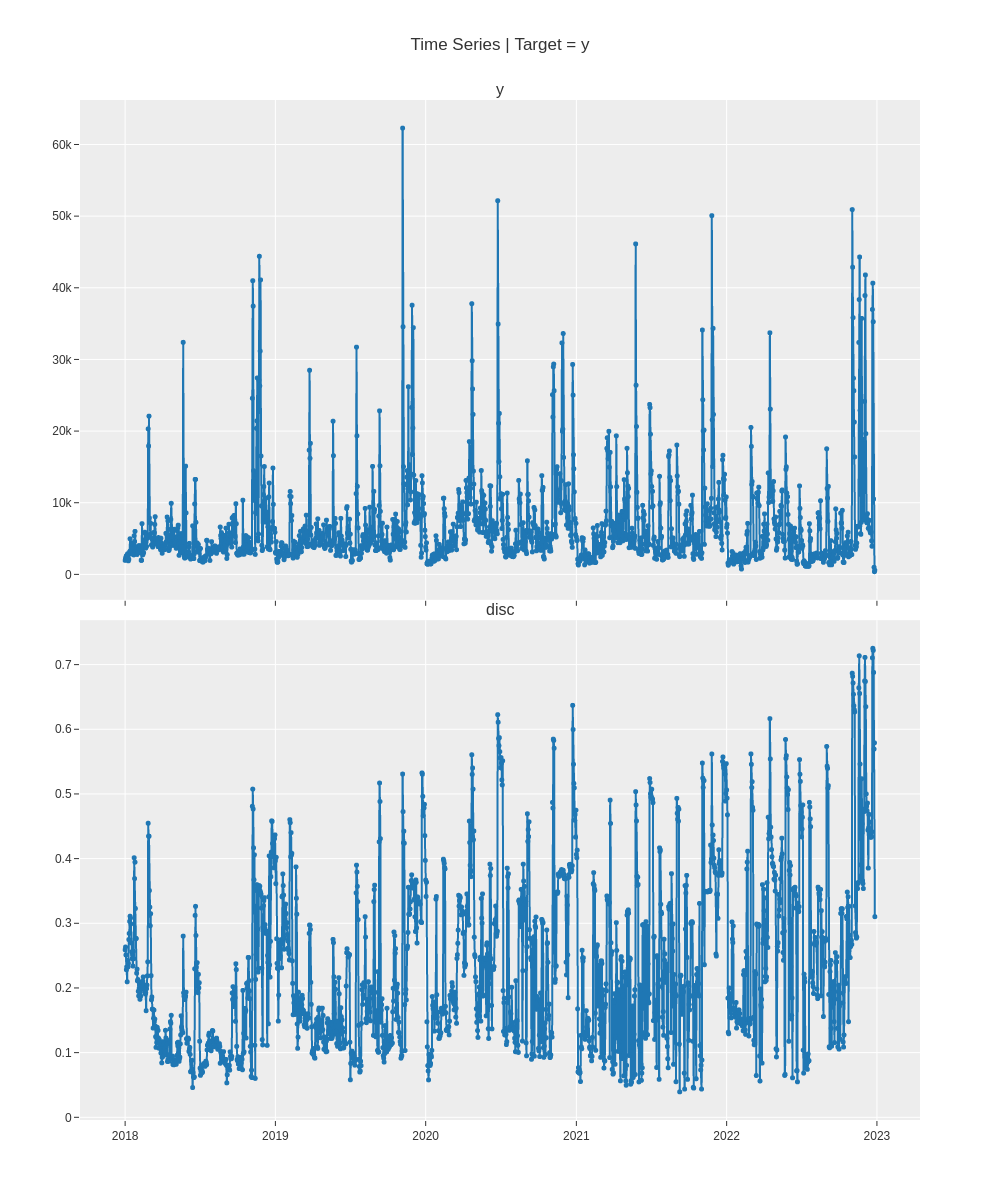

In [ ]:
# Plot the target variable along with any exogenous variables ----
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

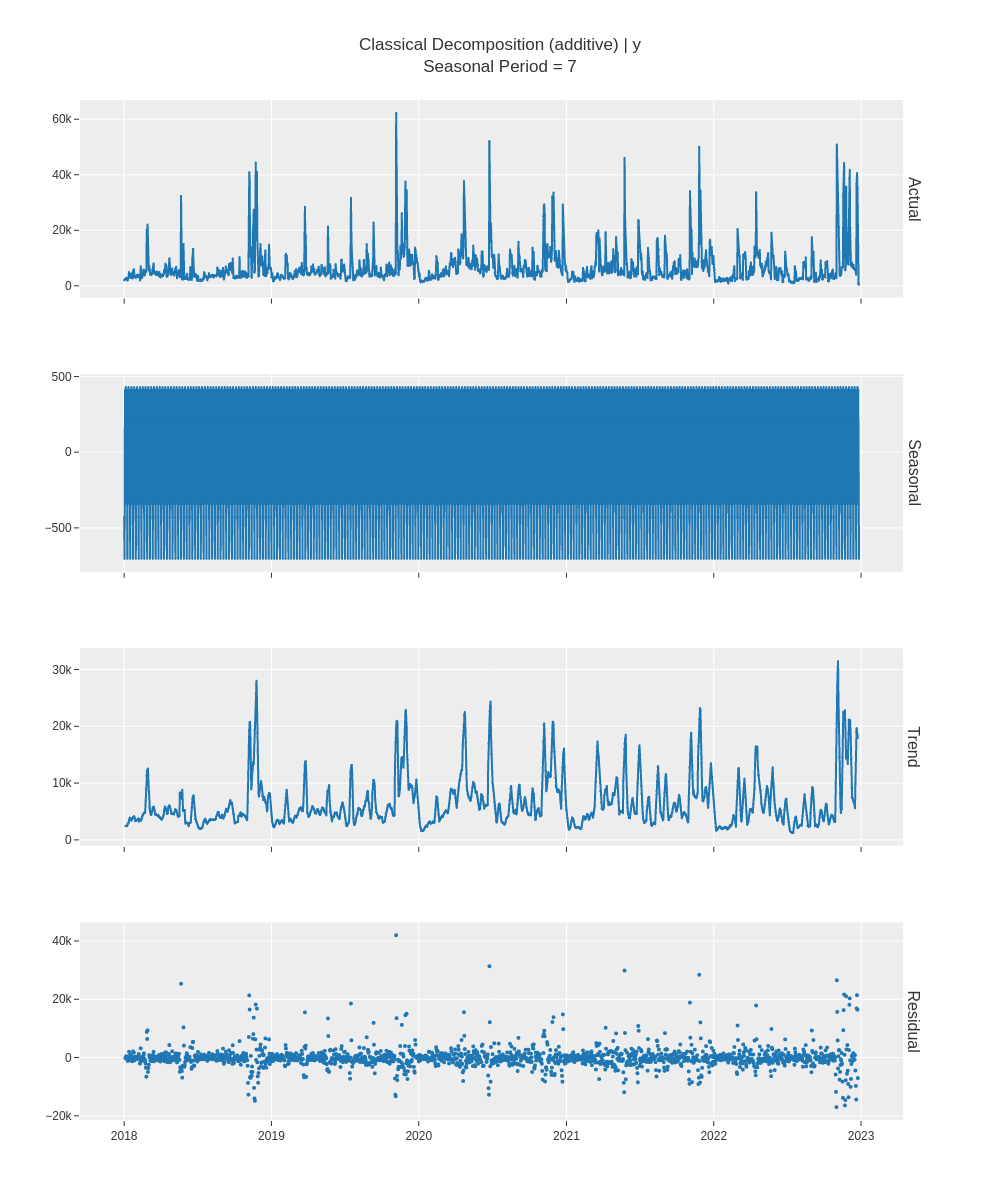

In [ ]:
eda.plot_model(plot="decomp", fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

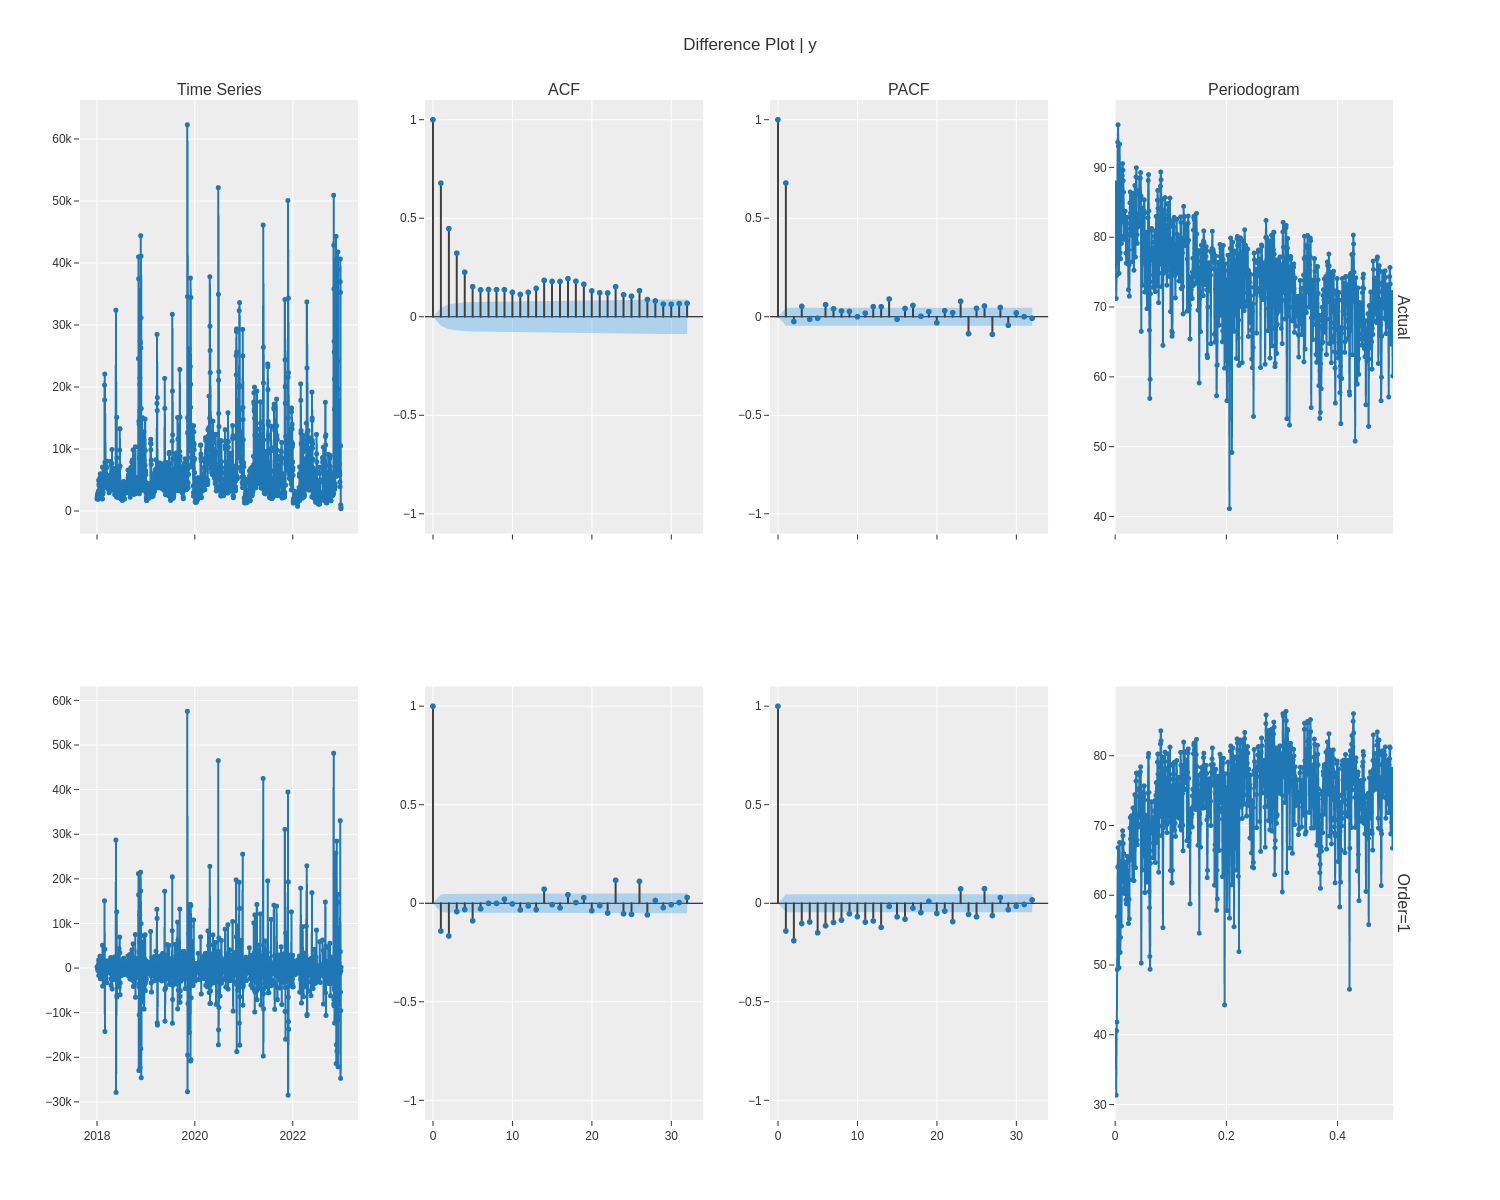

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1200},
    data_kwargs={"acf": True, "pacf": True, "periodogram": True})


A first-order difference (similar to recommendation by the setup) appears to reduce the long-tail of the ACF.  The PACF still seems to indicate close to a weekly pattern which matches expected seasonality of ecommerce sales.

Now to check cross-correlation between exogenous variables and the target.

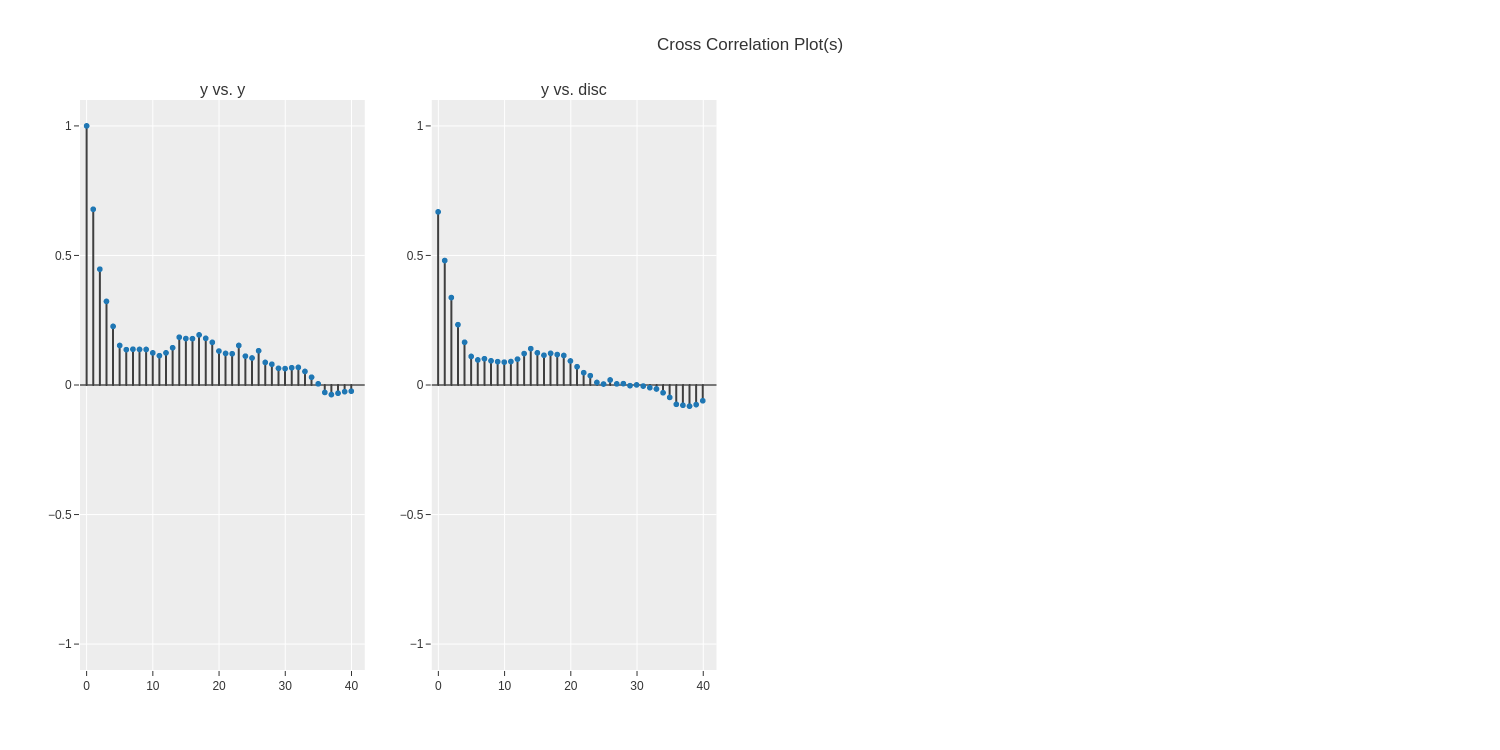

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

There is strong correlation to the strength of discounting to the days near where the discount is offered, which is not surprising.  This could be indicative of a useful exogenous variable in near-term projections.  It is interesting to see that after about a 1 month lag there appears to be a slight 'reverse' (negative correlated) affect.

**EDA on Style Exogenous Set**

Let's add the additional exogenous variables and check more correlation statistics.

In [ ]:
# Create an EDA experiment ----
eda_full = TSForecastingExperiment()

In [ ]:
eda_full.setup(
  data= ed_hol_style,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape              (1822, 318)
5              Train data shape              (1792, 318)
6               Test data shape                (30, 318)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     9ac4

There are too many styles to compute all of the lagged correlation charts right now.  The same-day correlation heat map is still difficult to read, but does provide some interesting visual cluses as to which style names are most highly correlated with the sales total.

<AxesSubplot: >

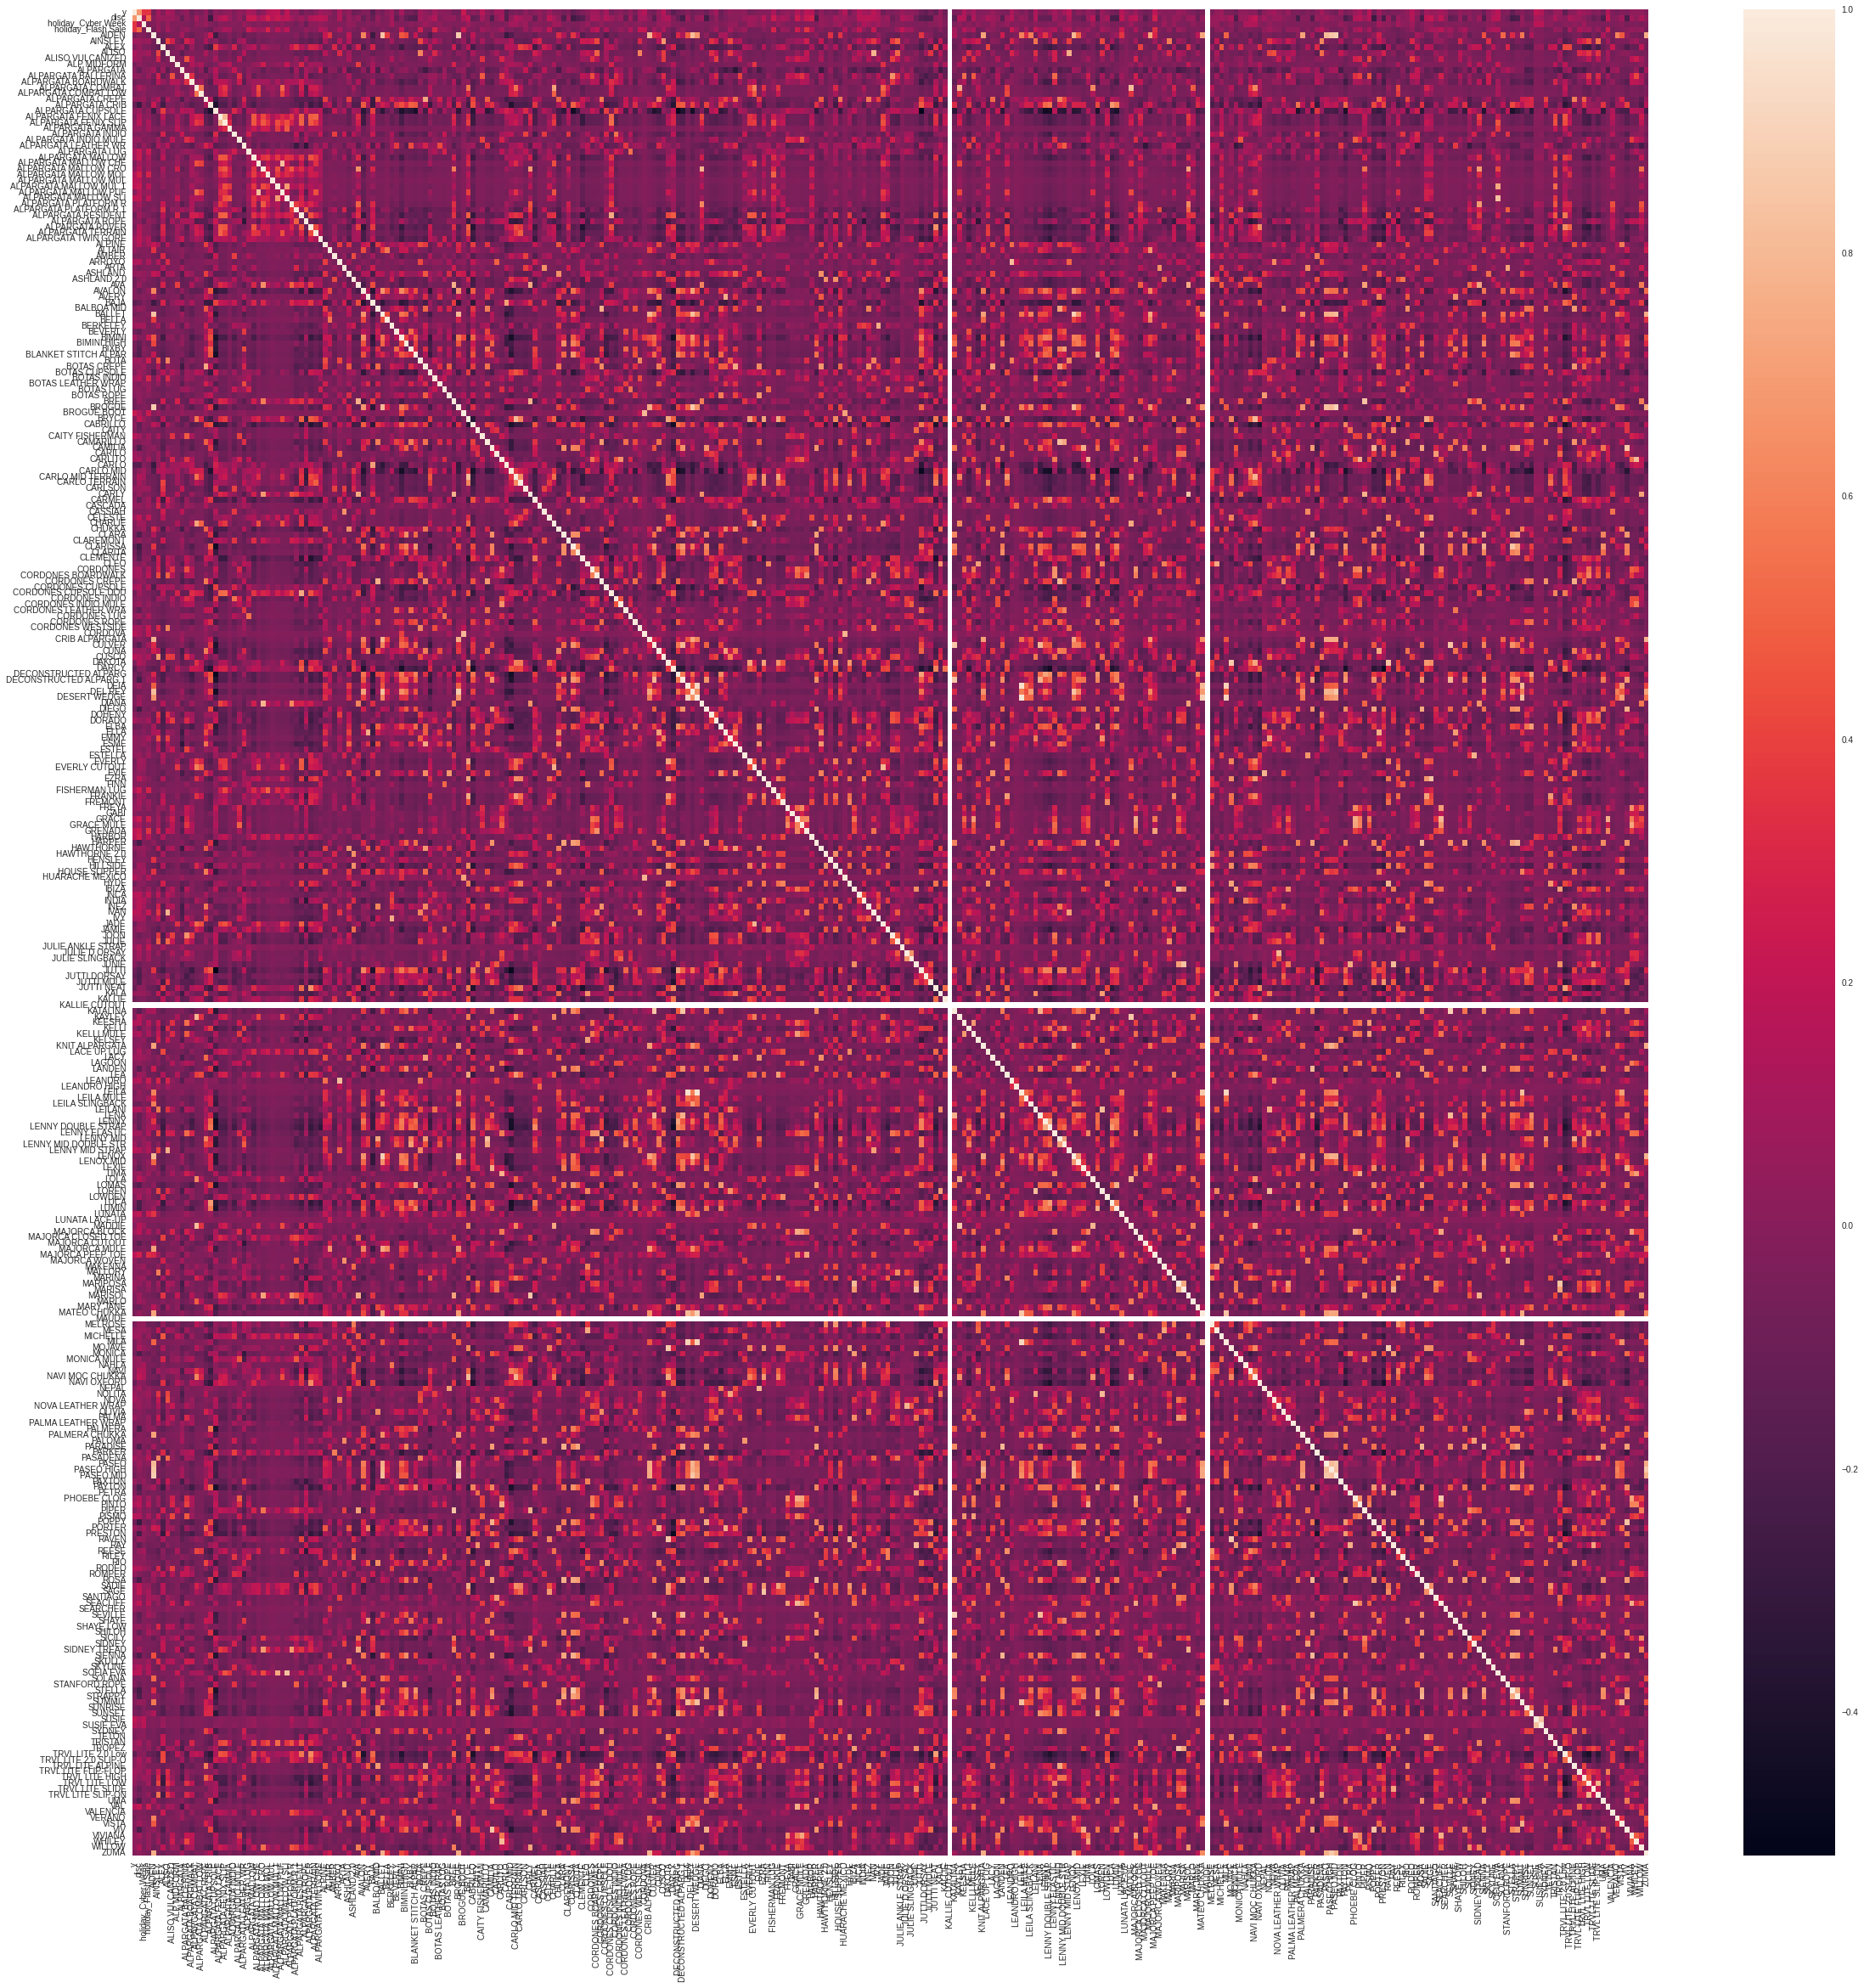

In [ ]:
corr = ed_hol_style.corr()

fig, ax = plt.subplots(figsize=(40,40))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

I will also try including base color to see if there is any predictive effect later.

I also evaluate the correlation of holiday when added to discounting as exogenous/explanatory variable.  

In [ ]:
eda_hol = TSForecastingExperiment()

eda_hol.setup(
  data= ecom_data_hol,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 4)
5              Train data shape                (1792, 4)
6               Test data shape                  (30, 4)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     348c

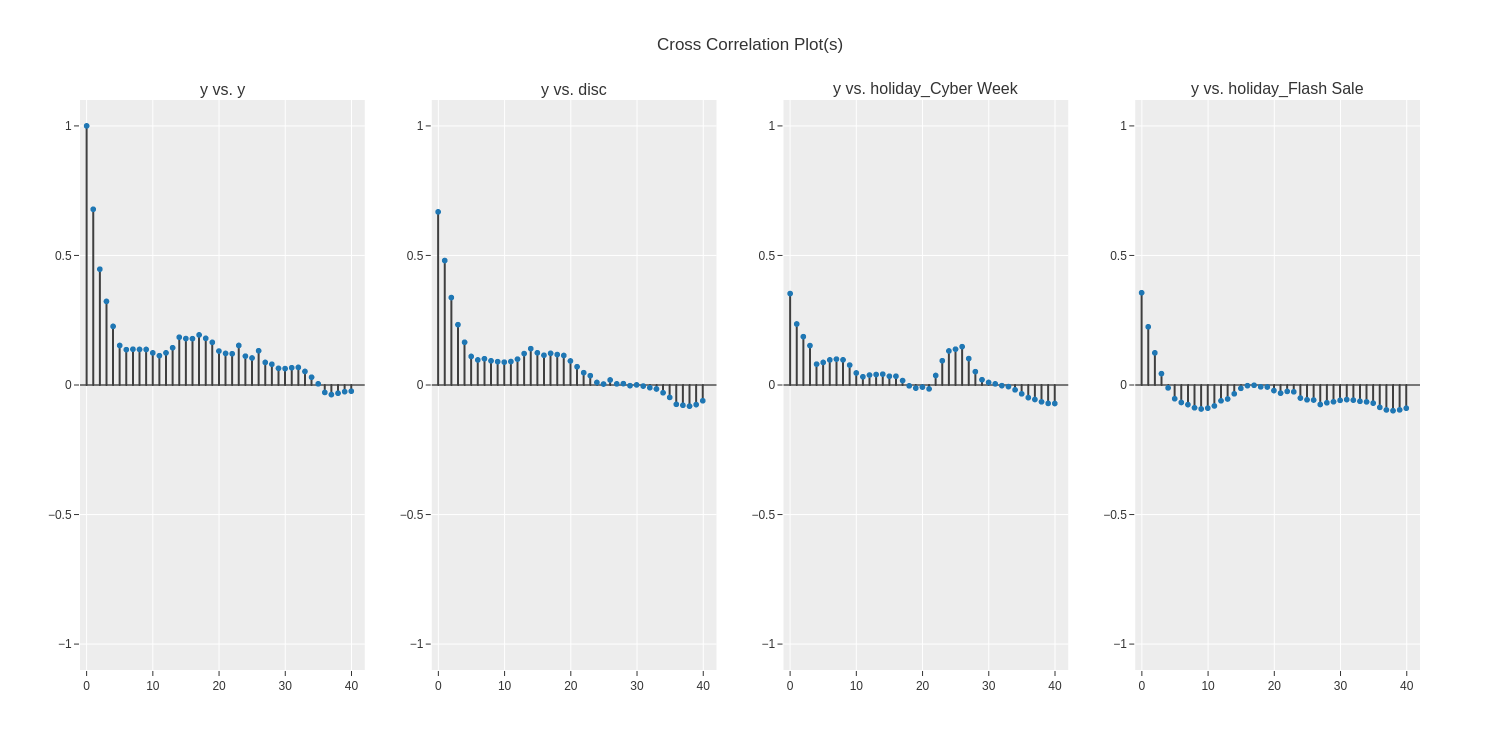

In [ ]:
eda_hol.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

Interestingly, there is a small negative correlation in lagging days after a flash-sale, which is likely indicative of consumers having already purchased on discounted days, so not re-visiting in the days immediately following a large sale.

                           y      disc  holiday_Cyber Week  holiday_Flash Sale
y                   1.000000  0.668179            0.352871            0.356109
disc                0.668179  1.000000            0.134602            0.511693
holiday_Cyber Week  0.352871  0.134602            1.000000           -0.038811
holiday_Flash Sale  0.356109  0.511693           -0.038811            1.000000


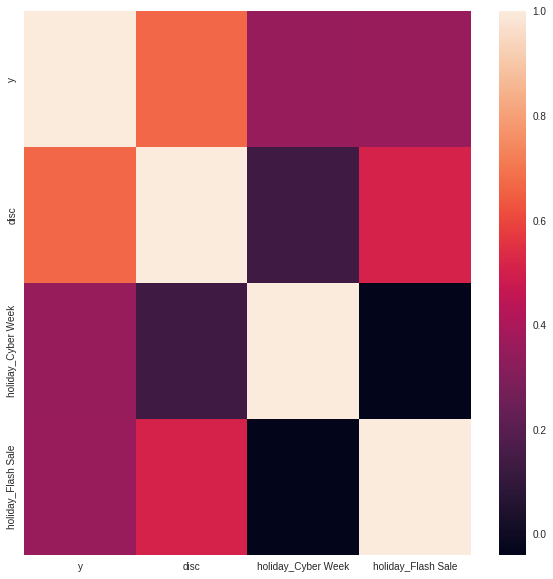

In [ ]:
corr_hol = ecom_data_hol.corr()

fig, ax = plt.subplots(figsize=(10,10))

# plot the heatmap
sns.heatmap(corr_hol, 
        xticklabels=corr_hol.columns,
        yticklabels=corr_hol.columns)

print(corr_hol)

Unsurprisingly, flash-sale days are somewhat correlated to the avg daily discounting offered.  Cyber week is showing less correlation than expected.  The correlation of the two, combined with the relatively weak correlation to the target qty in aggregate, make it appear that the addition of the variables will only minorly improve performance, if at all when combined with the discount variable. 

**EDA for adding base color as an exogenous variable**

In [ ]:
# Create an EDA experiment ----
eda_color = TSForecastingExperiment()

In [ ]:
eda_color.setup(
  data= ed_hol_color,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape               (1822, 38)
5              Train data shape               (1792, 38)
6               Test data shape                 (30, 38)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     136c

<AxesSubplot: >

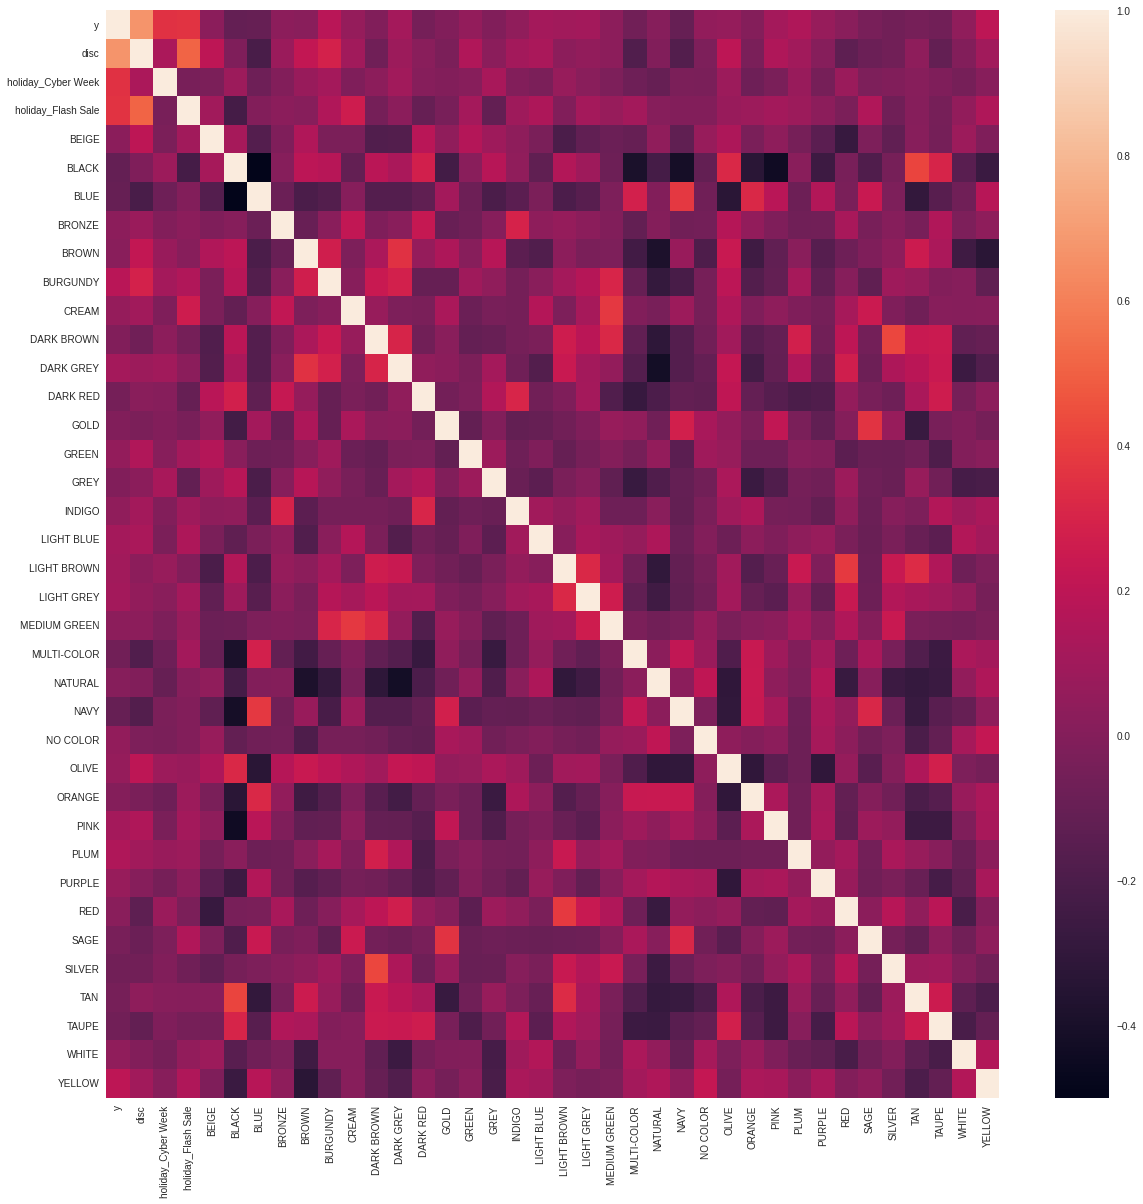

In [ ]:
corr = ed_hol_color.corr()

fig, ax = plt.subplots(figsize=(20,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

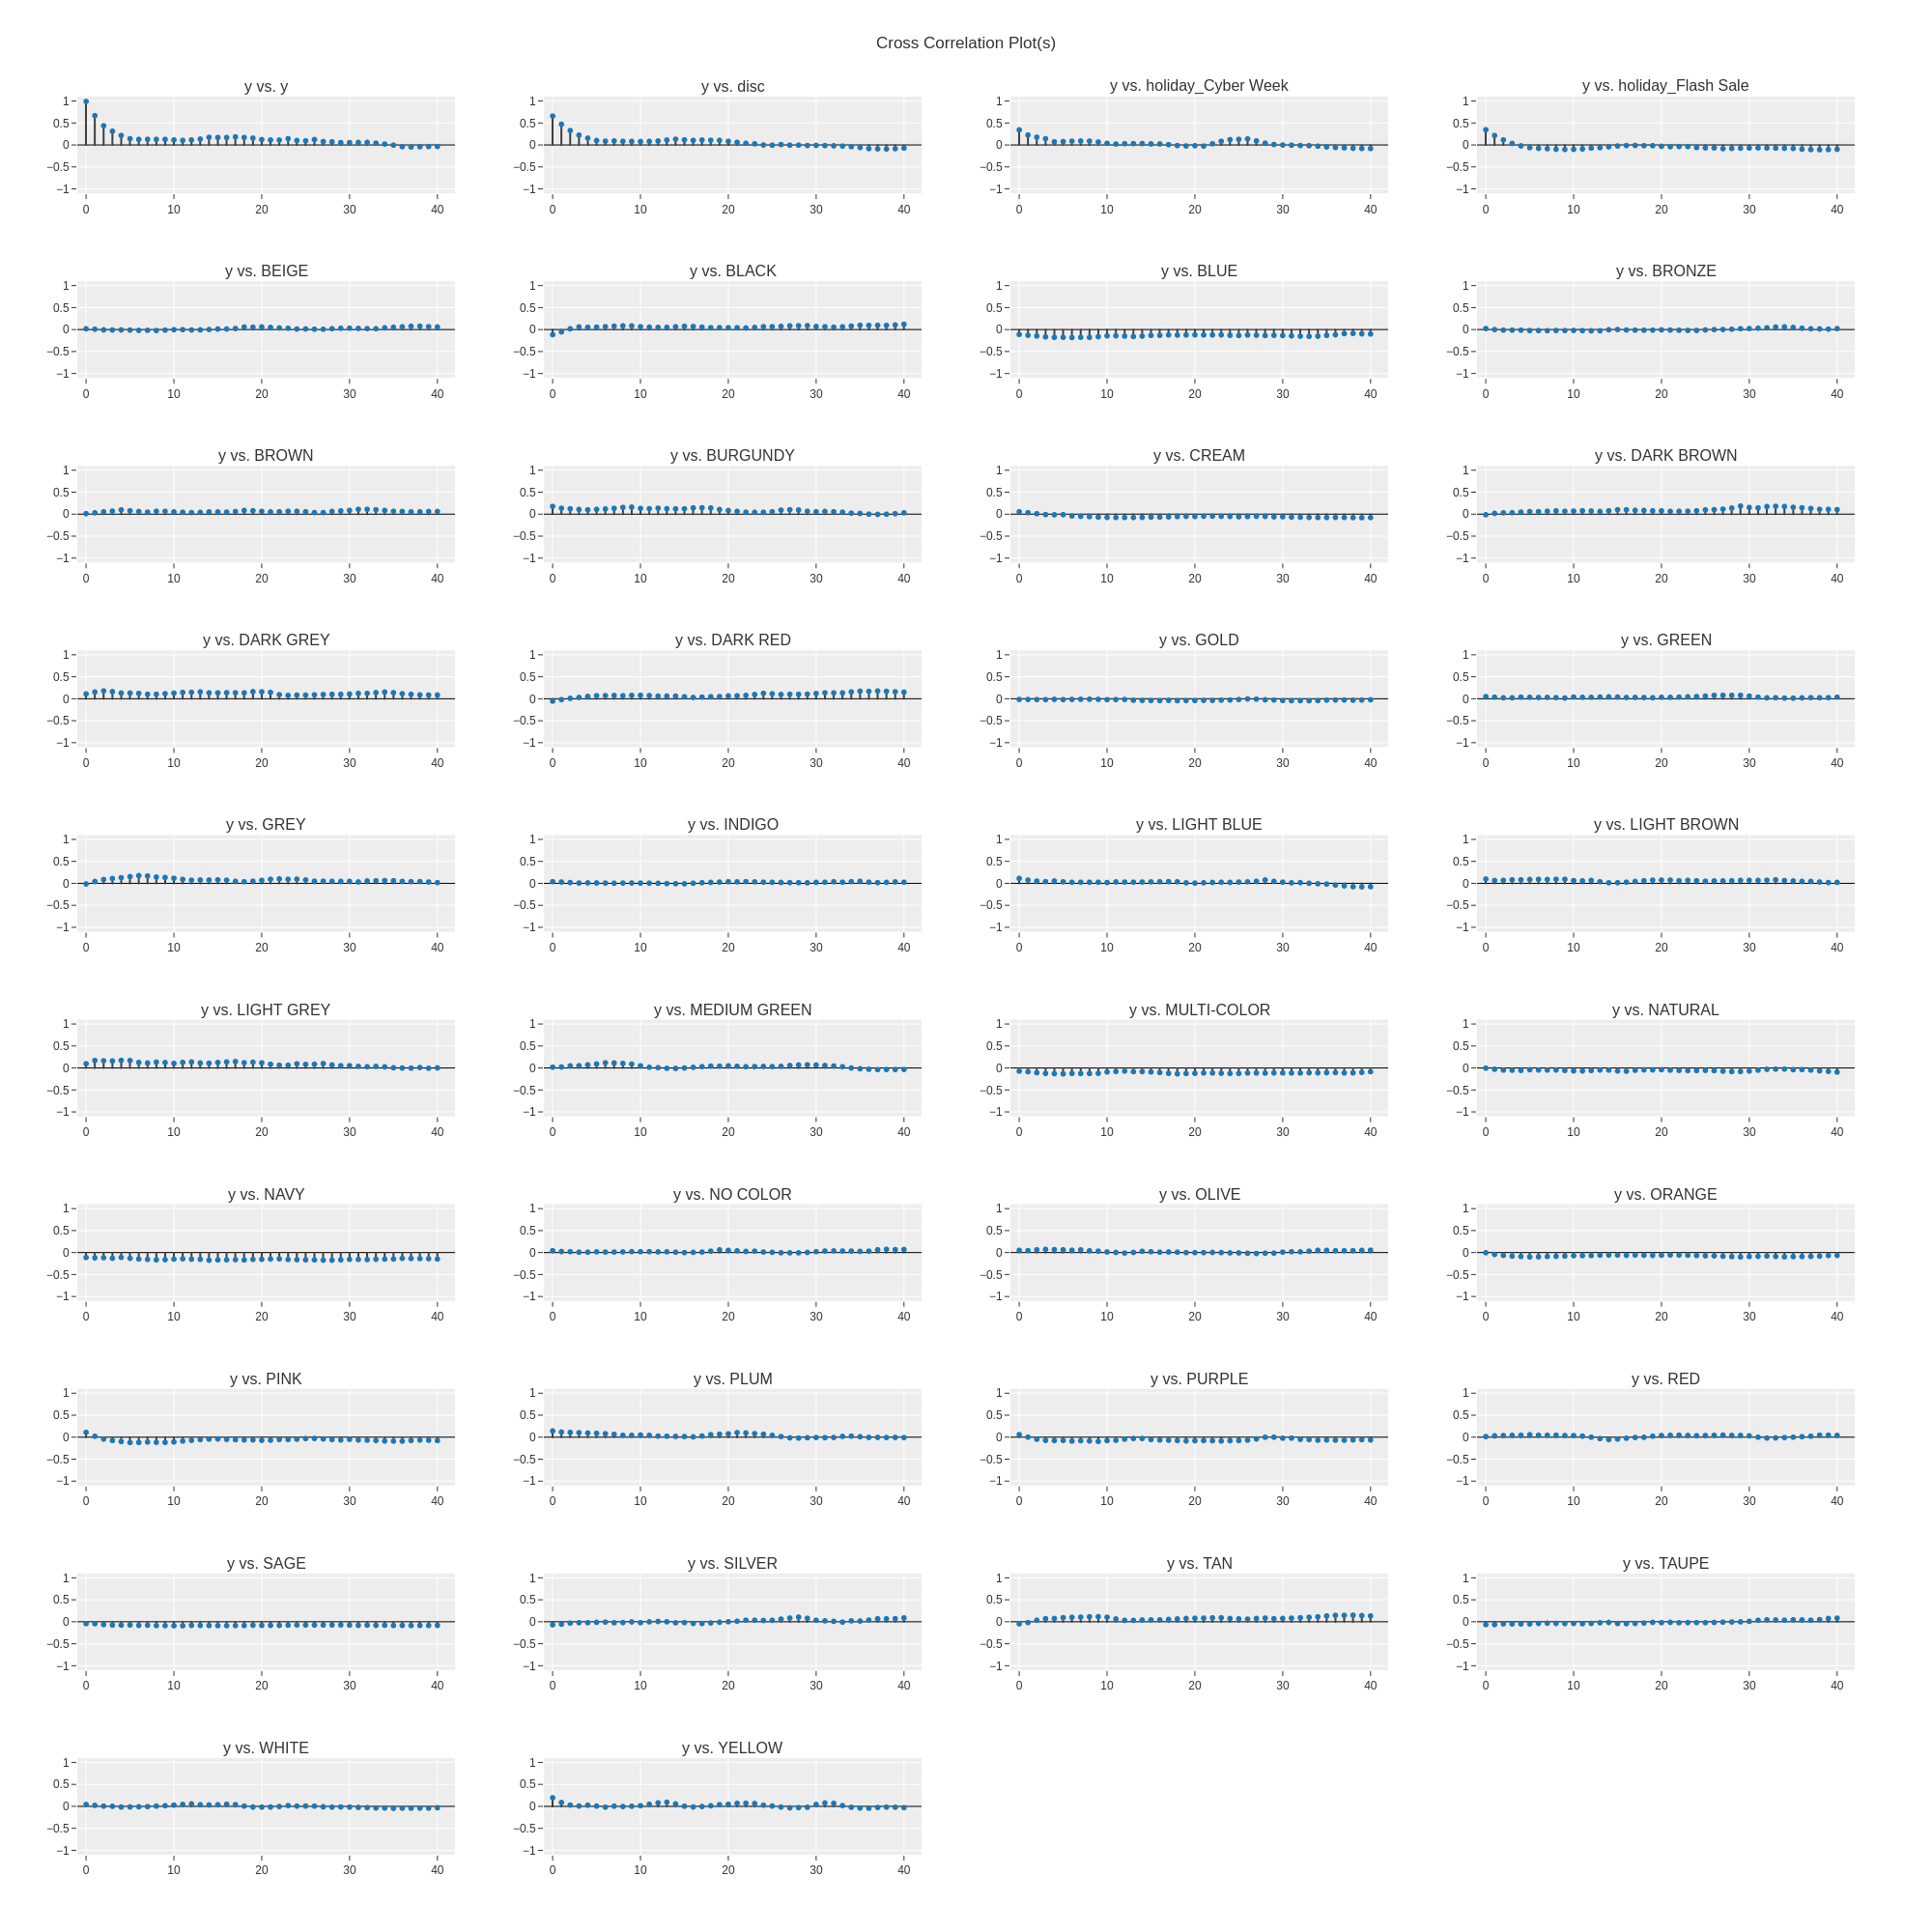

In [ ]:
eda_color.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 2000, "width": 2000})

 There seems to be very low correlation between different color and the lags, so color will likely not be a very useful predictor for the aggregate.  Again, this may vary once working with specific gender-class combinations.  We will try an AutoML experiment anyway.

**Add Traffic**

In [ ]:
# Create an EDA experiment ----
eda_ecom_traff = TSForecastingExperiment()

In [ ]:
eda_ecom_traff.setup(
  data=ecom_disc_traff,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 3)
5              Train data shape                (1792, 3)
6               Test data shape                  (30, 3)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     e3fa

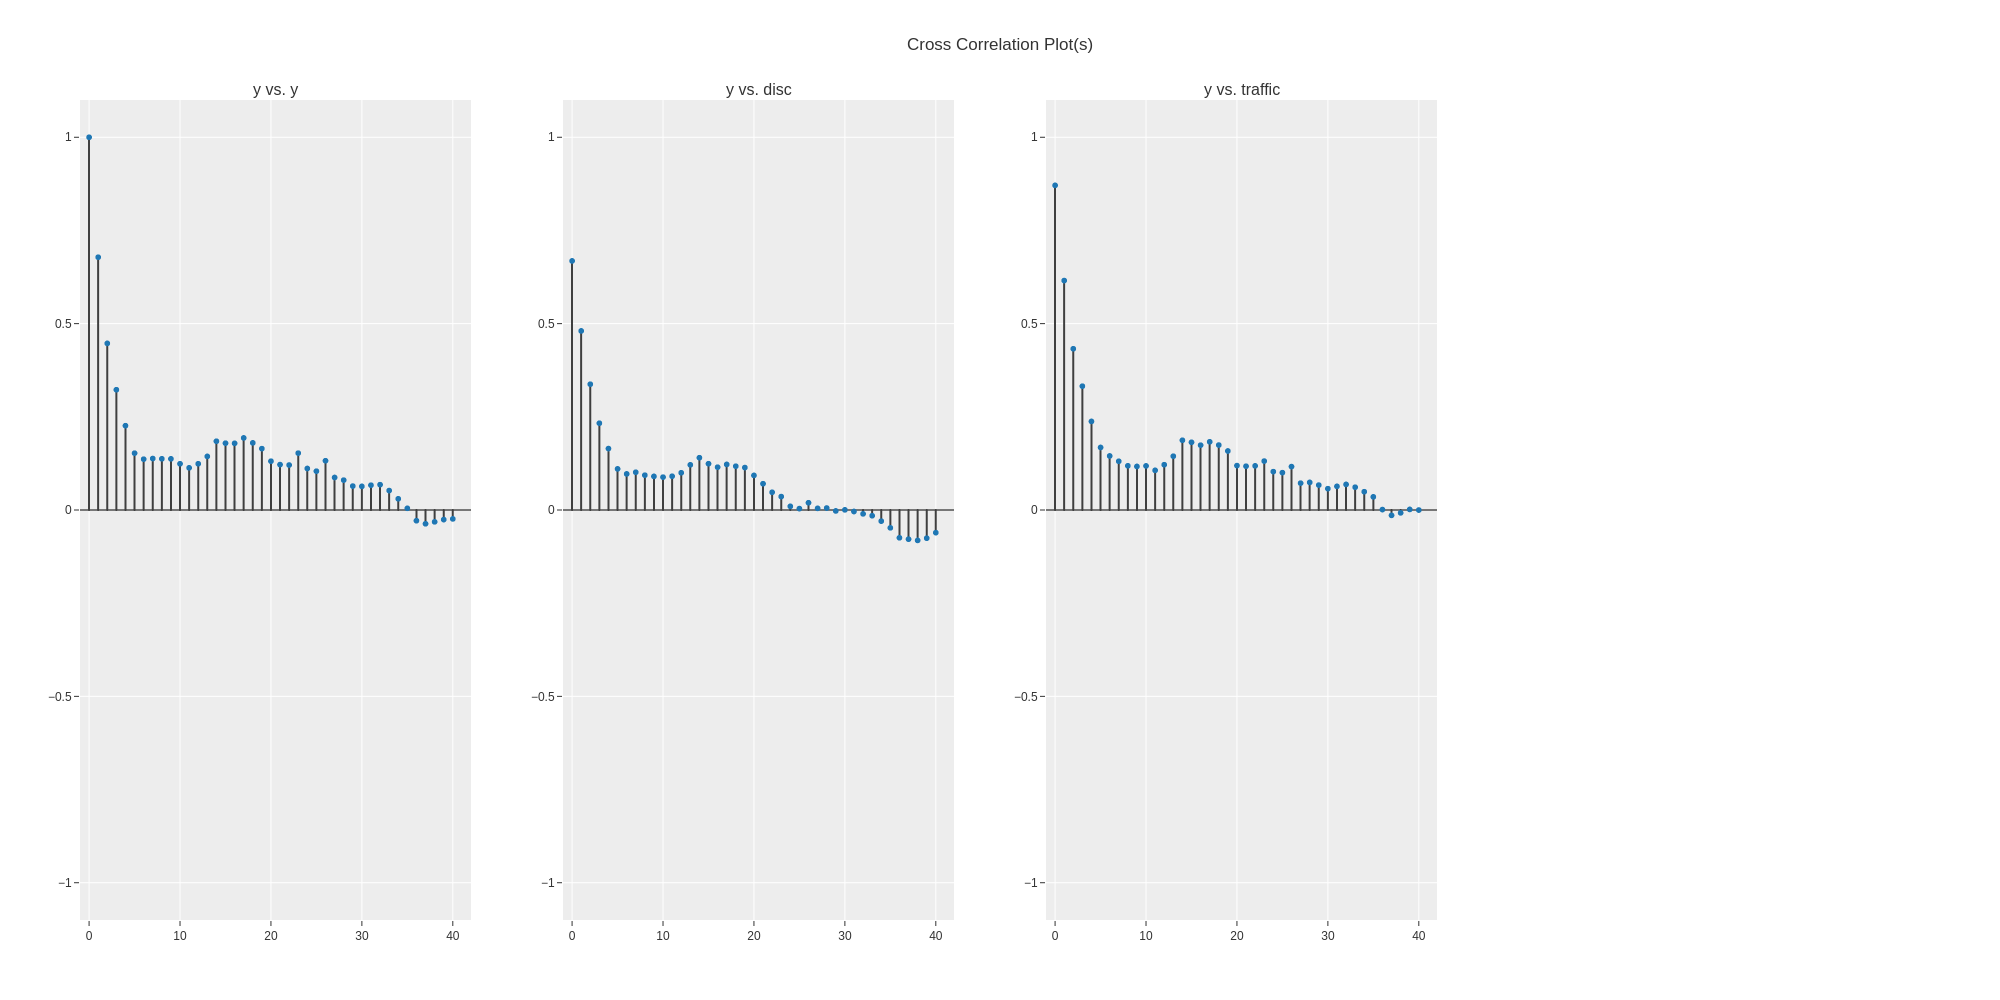

In [ ]:
eda_ecom_traff.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 1000, "width": 2000})

<AxesSubplot: >

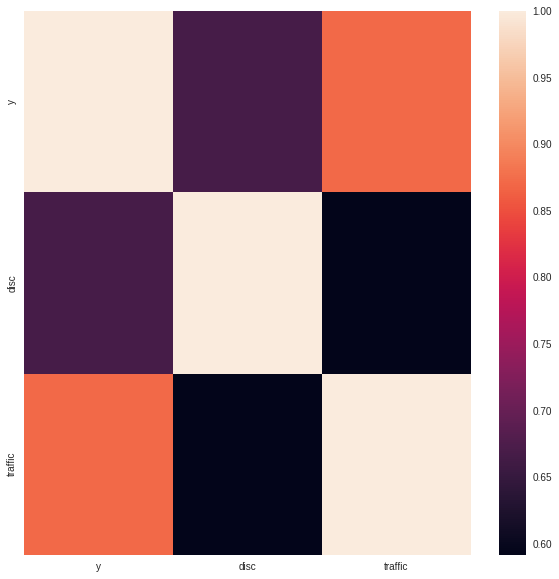

In [ ]:
corr = ecom_disc_traff.corr()

fig, ax = plt.subplots(figsize=(10,10))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Traffic shows the highest lag correlation to the target variable, and thus it may be the most useful for prediction later.  Also unsurprisingly, it has a strong correlation with the other exogenous variable, discount %.

# DS Aggregate - Setup, Statistical Validation

I repeat the EDA with the dropship data in aggregate: I use PyCaret's time-series EDA tools to be able to validate the necessary statistical testing and components of the time-series to inform how to approach forecast modeling.

1. Evaluate stationarity and required differencing
2. Check for seasonality and trend
3. Check if the series is / contains white noise
4. Check auto-correlation of target and exogenous variables
5. Check lagged co-variation of exogenous variables


In [ ]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()

In [ ]:
target = 'y'

In [ ]:

eda.setup(
  data=ds_agg_data_disc,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (598, 2)
5              Train data shape                 (568, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     ca7a

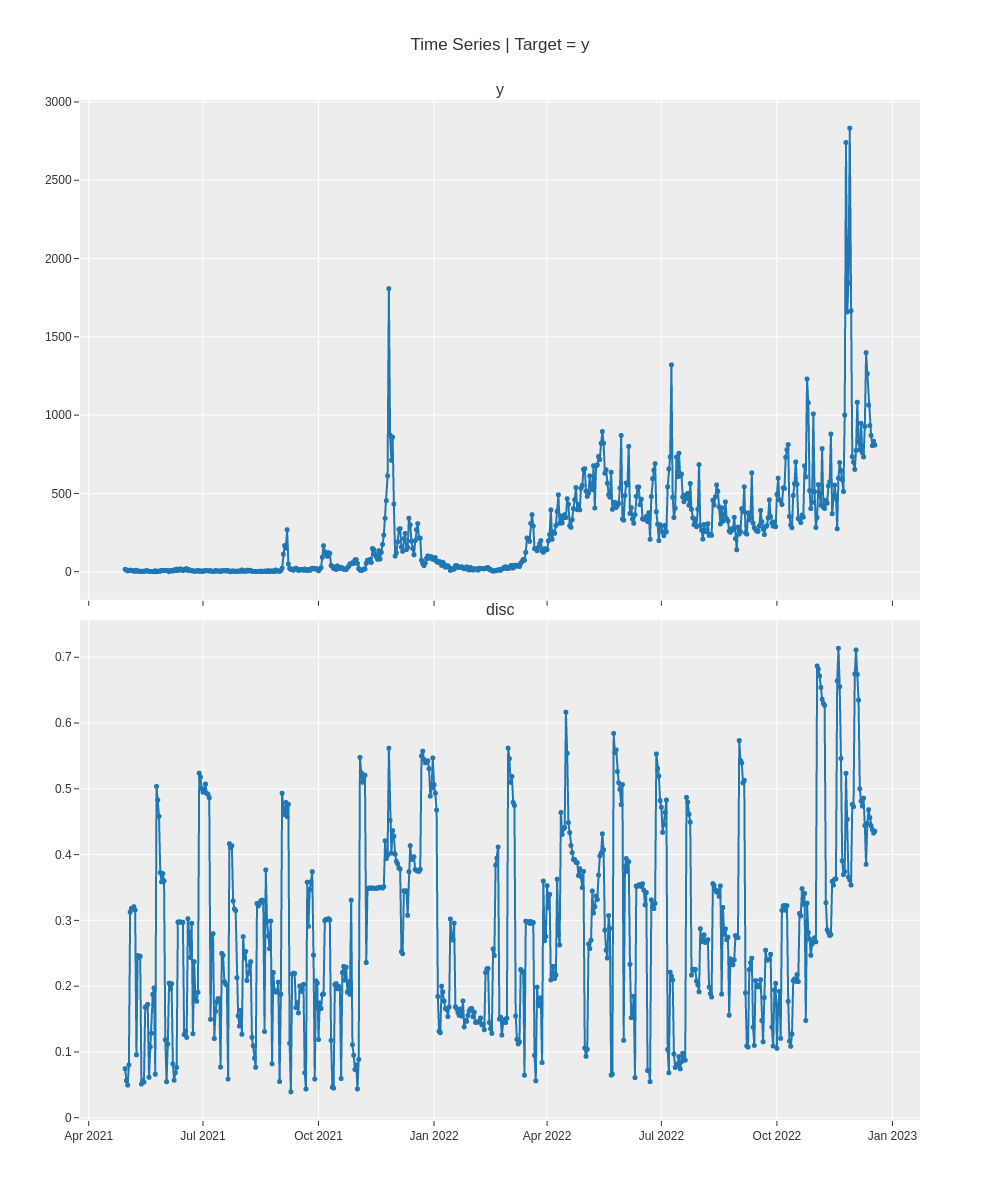

In [ ]:
# Plot the target variable along with any exogenous variables ----
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

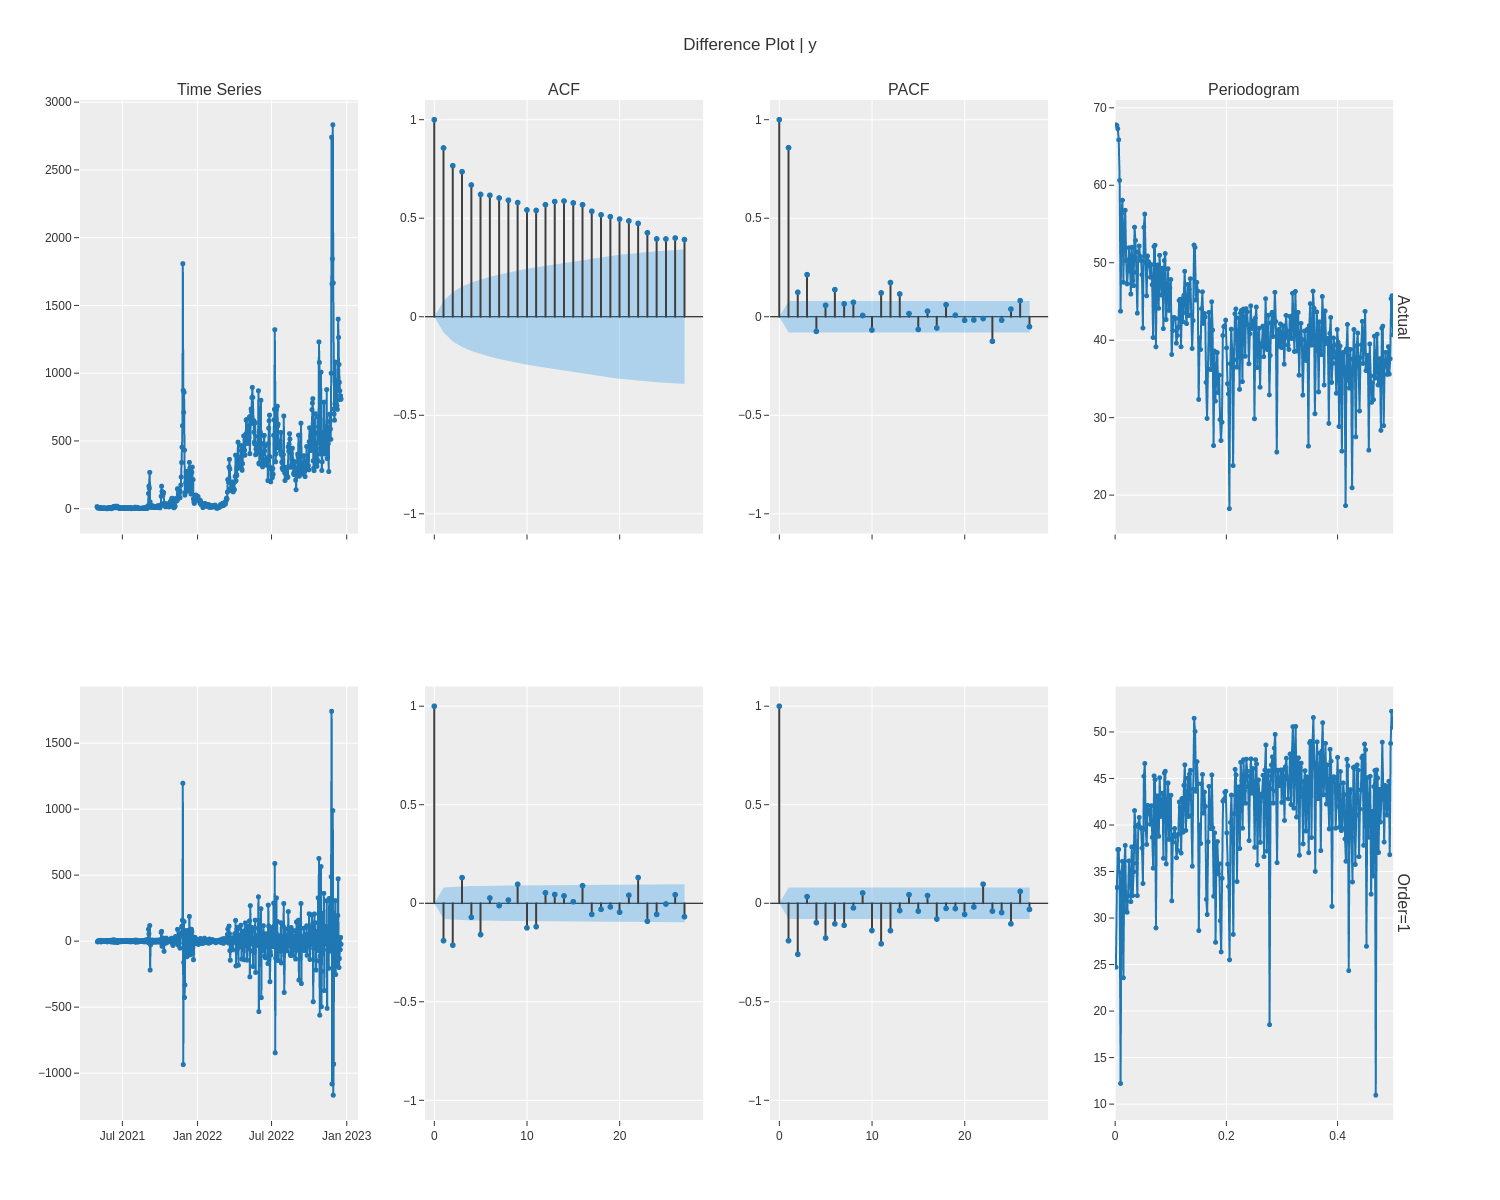

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1200},
    data_kwargs={"acf": True, "pacf": True, "periodogram": True})


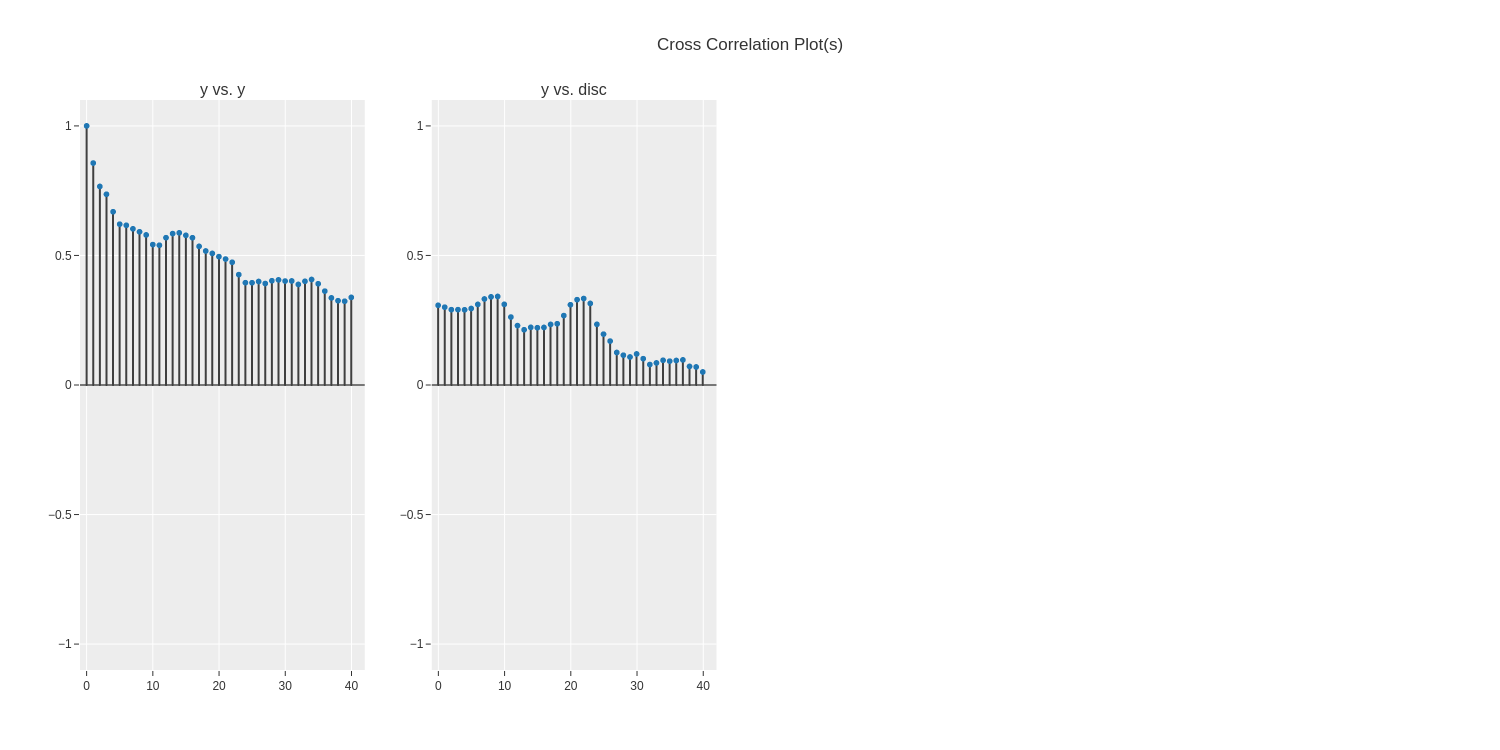

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

As expected, the lag correlation from .com discount offering to dropship is less than .com direct.  There is some weak correlation that is positive.

Try it with traffic.

In [ ]:
eda_ds_traff = TSForecastingExperiment()

In [ ]:
eda_ds_traff.setup(
  data=ds_disc_traff,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (598, 3)
5              Train data shape                 (568, 3)
6               Test data shape                  (30, 3)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     d876

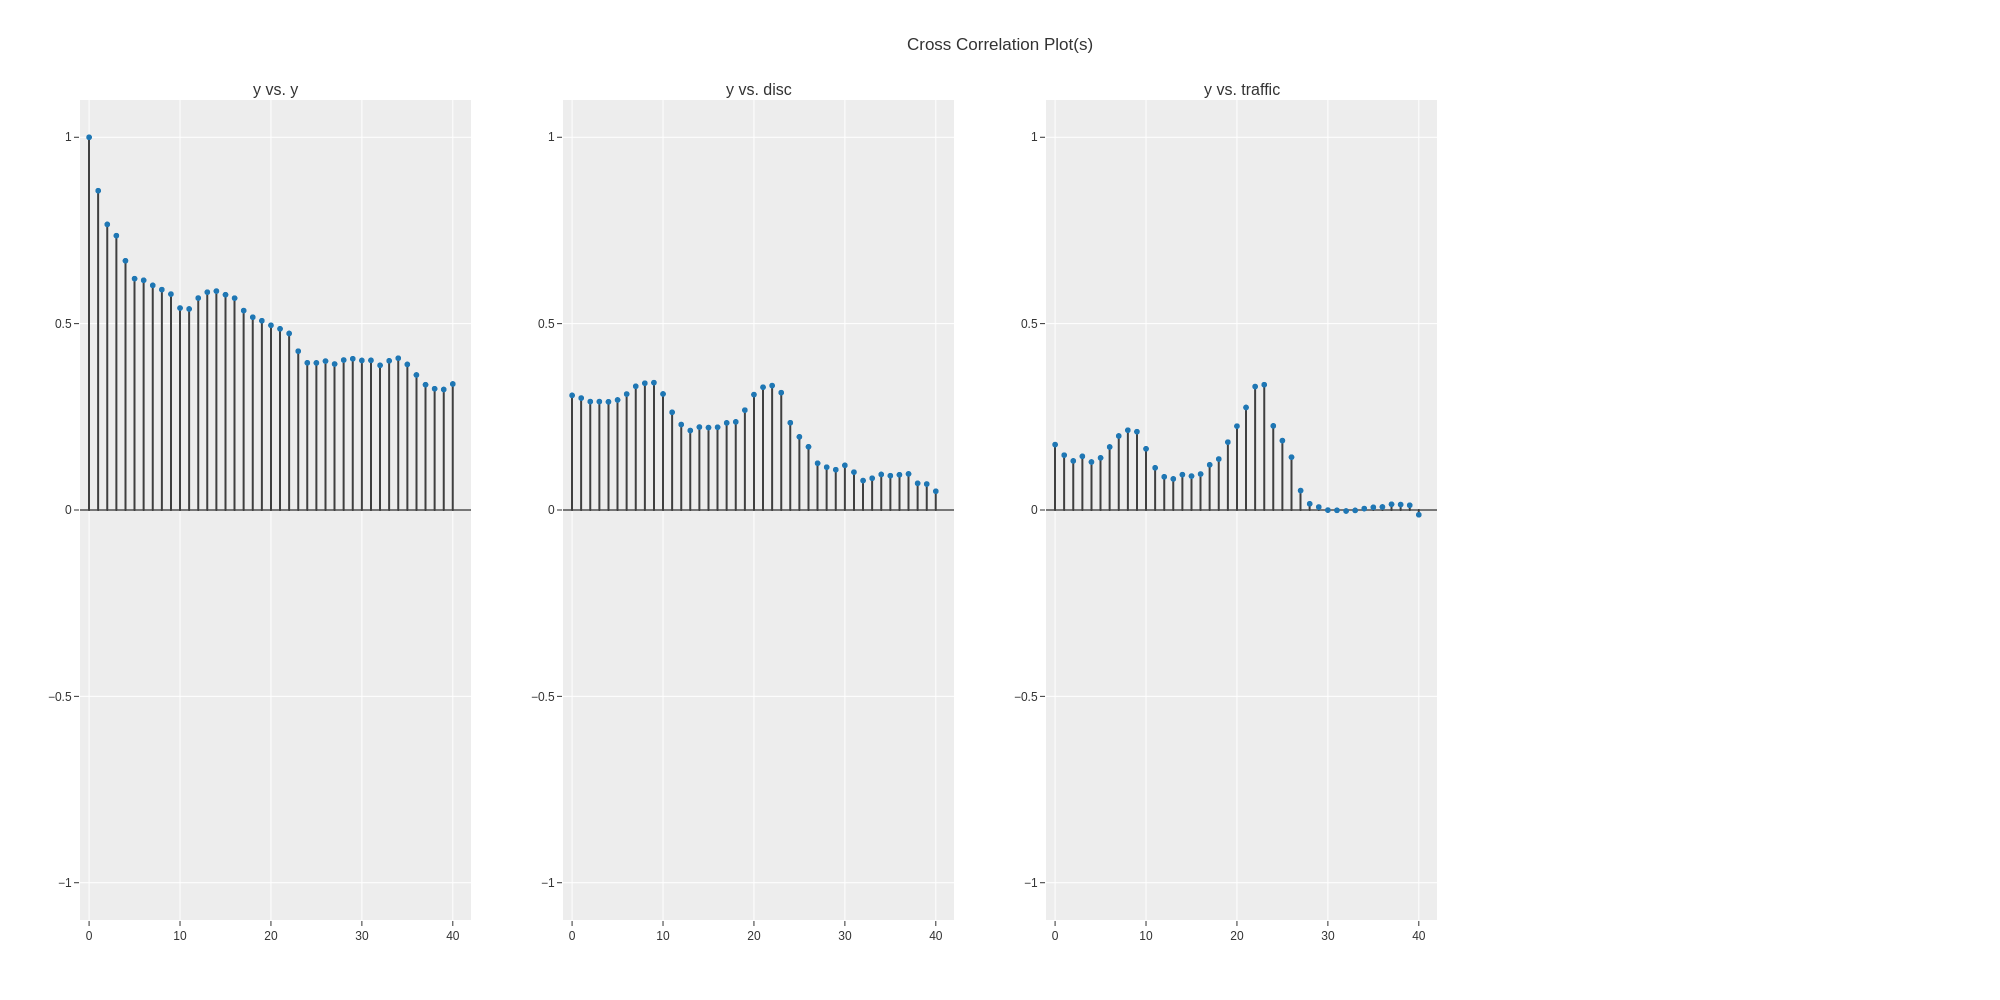

In [ ]:
eda_ds_traff.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 1000, "width": 2000})

<AxesSubplot: >

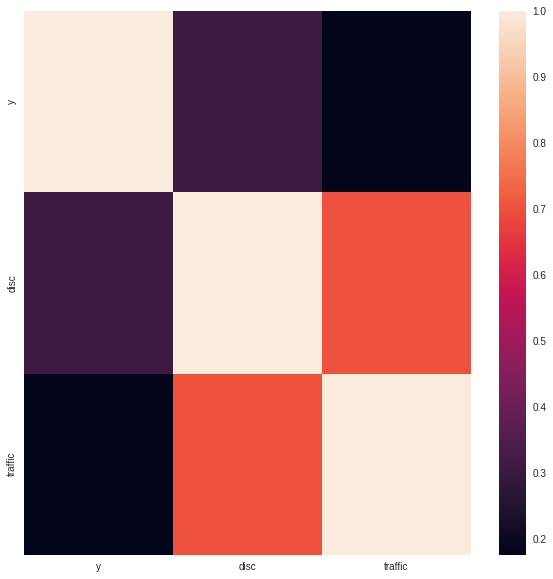

In [ ]:
corr = ds_disc_traff.corr()

fig, ax = plt.subplots(figsize=(10,10))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Bloom - Setup, Statistical Validation

Next, I repeat the EDA with each major dropship account: I use PyCaret's time-series EDA tools to be able to validate the necessary statistical testing and components of the time-series to inform how to approach forecast modeling.

1. Evaluate stationarity and required differencing
2. Check for seasonality and trend
3. Check if the series is / contains white noise
4. Check auto-correlation of target and exogenous variables
5. Check lagged co-variation of exogenous variables


In [ ]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()

In [ ]:
eda.setup(
  data=ds_bloom,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (591, 2)
5              Train data shape                 (561, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     c270

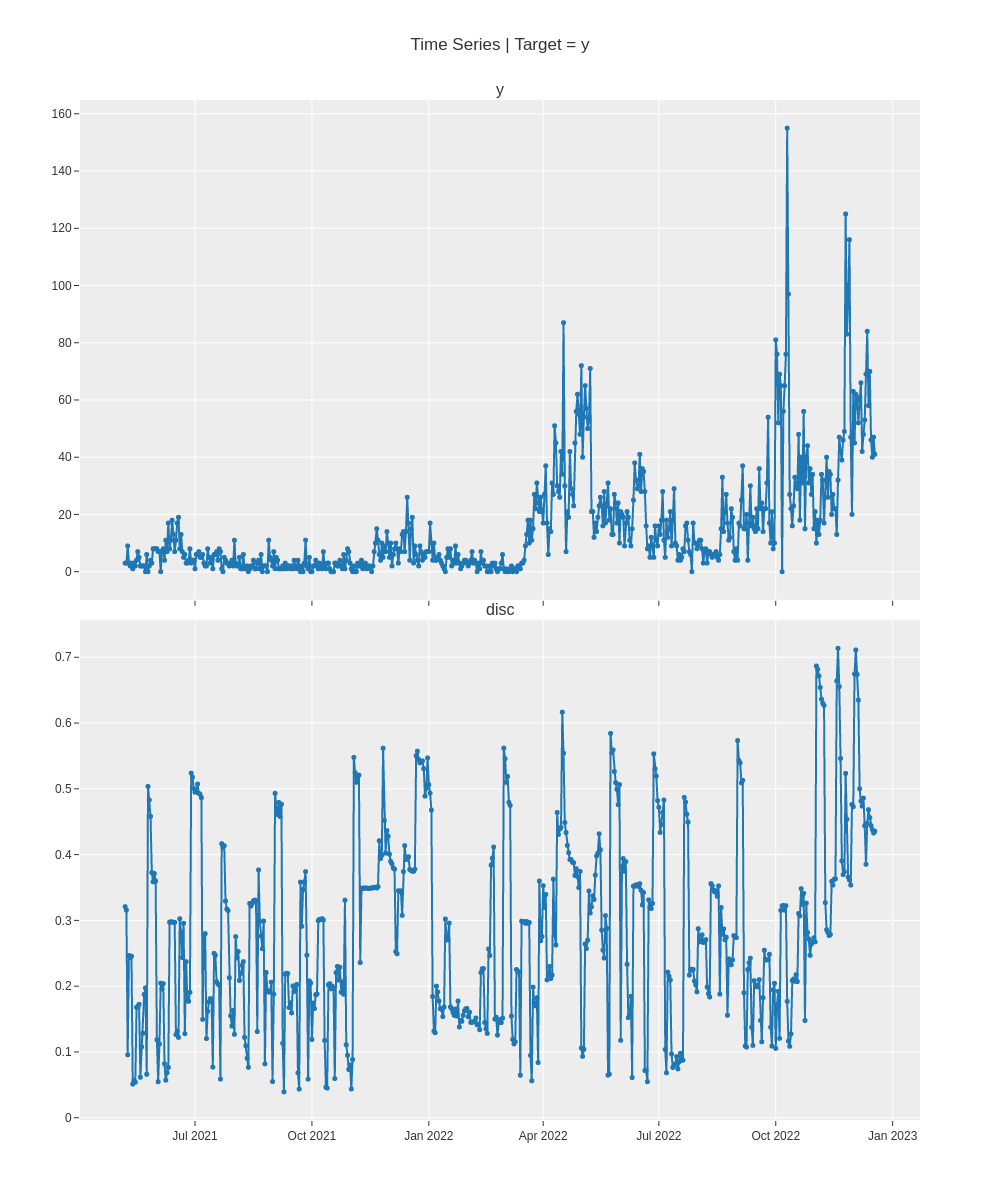

In [ ]:
# Plot the target variable along with any exogenous variables ----
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

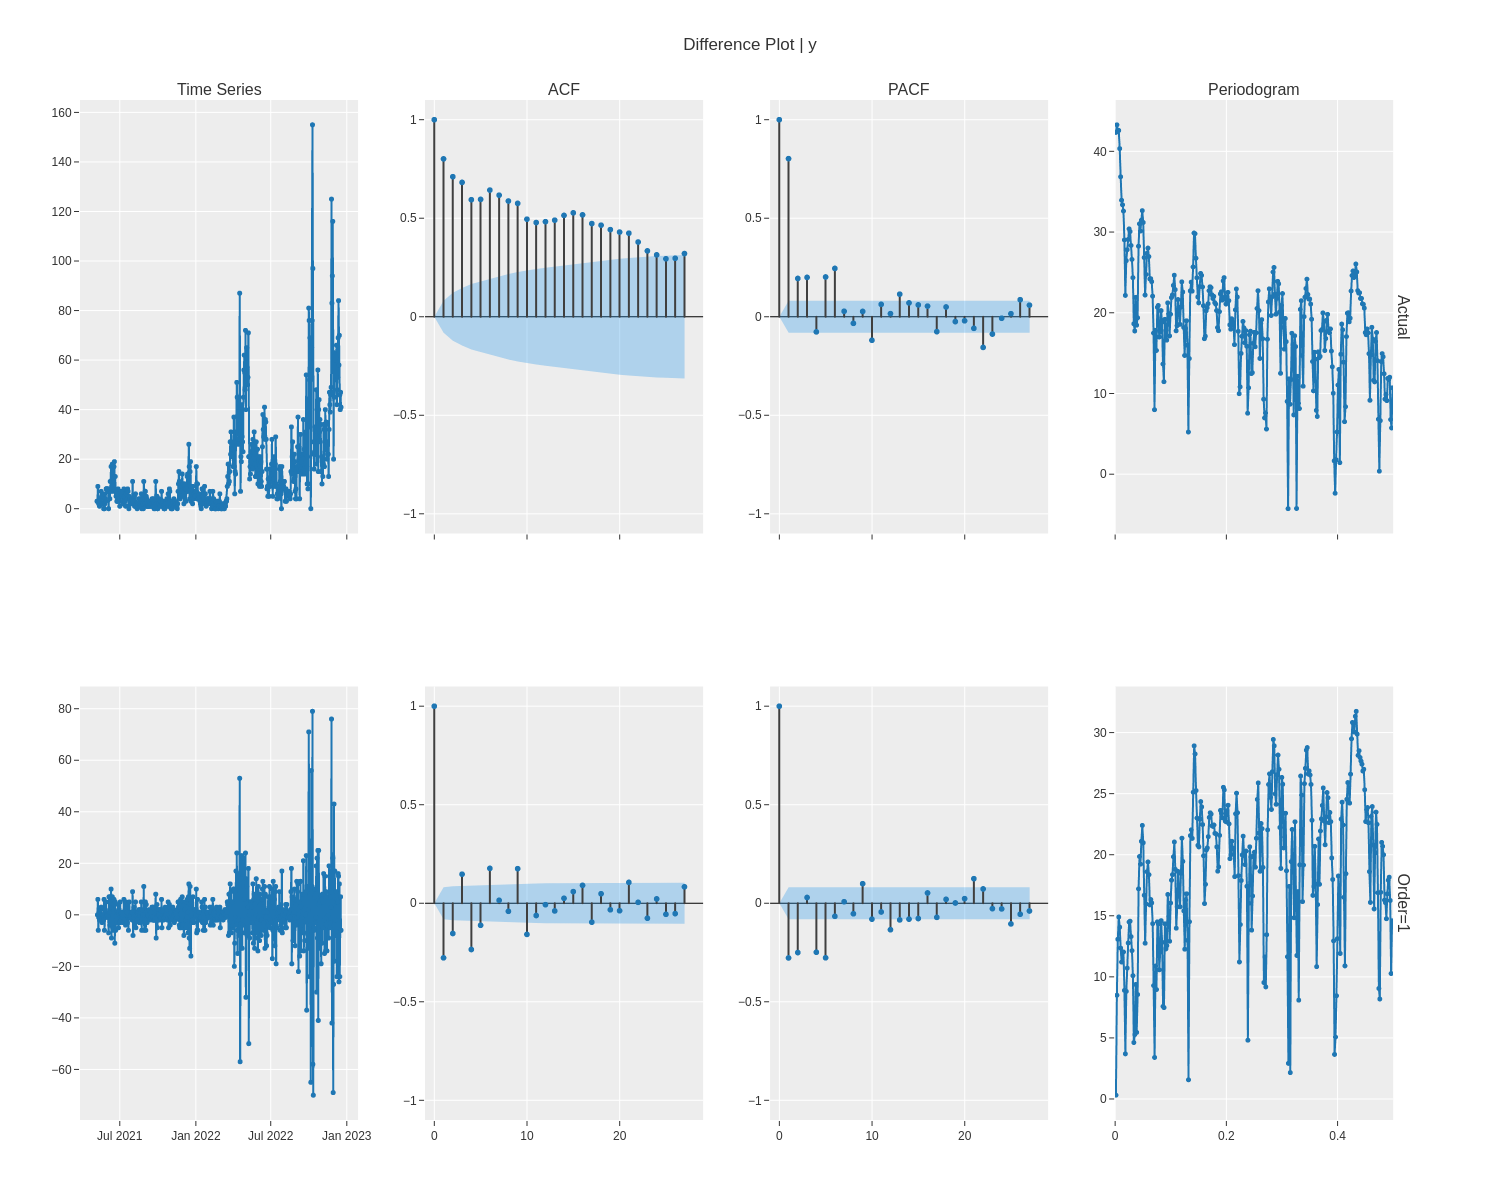

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1200},
    data_kwargs={"acf": True, "pacf": True, "periodogram": True})


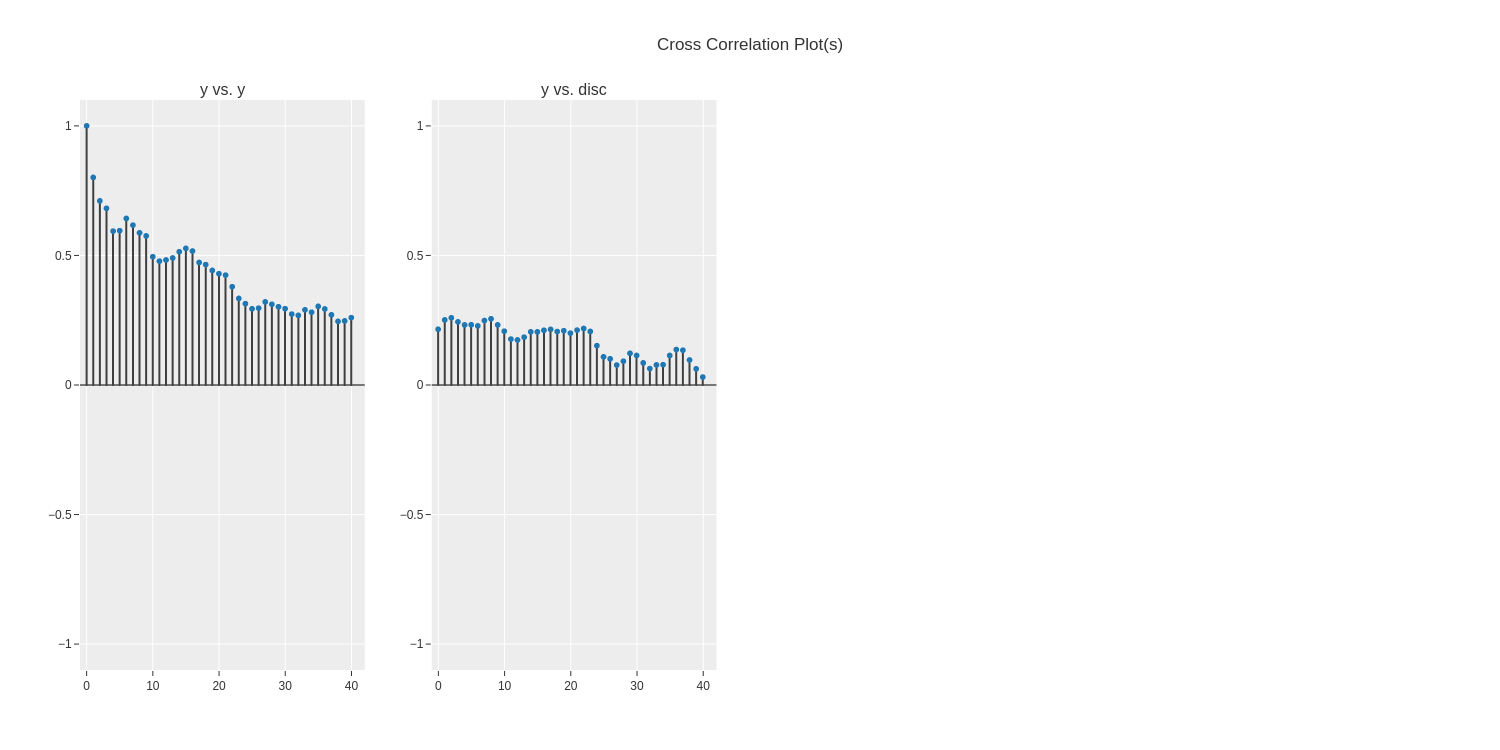

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

As expected, the lag correlation from .com discount offering to dropship is less than .com direct.  There is some weak correlation that is positive.  This matches ds in aggregation.

In [ ]:
eda.setup(
  data=ds_bloom_traff,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (591, 2)
5              Train data shape                 (561, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     d3f6

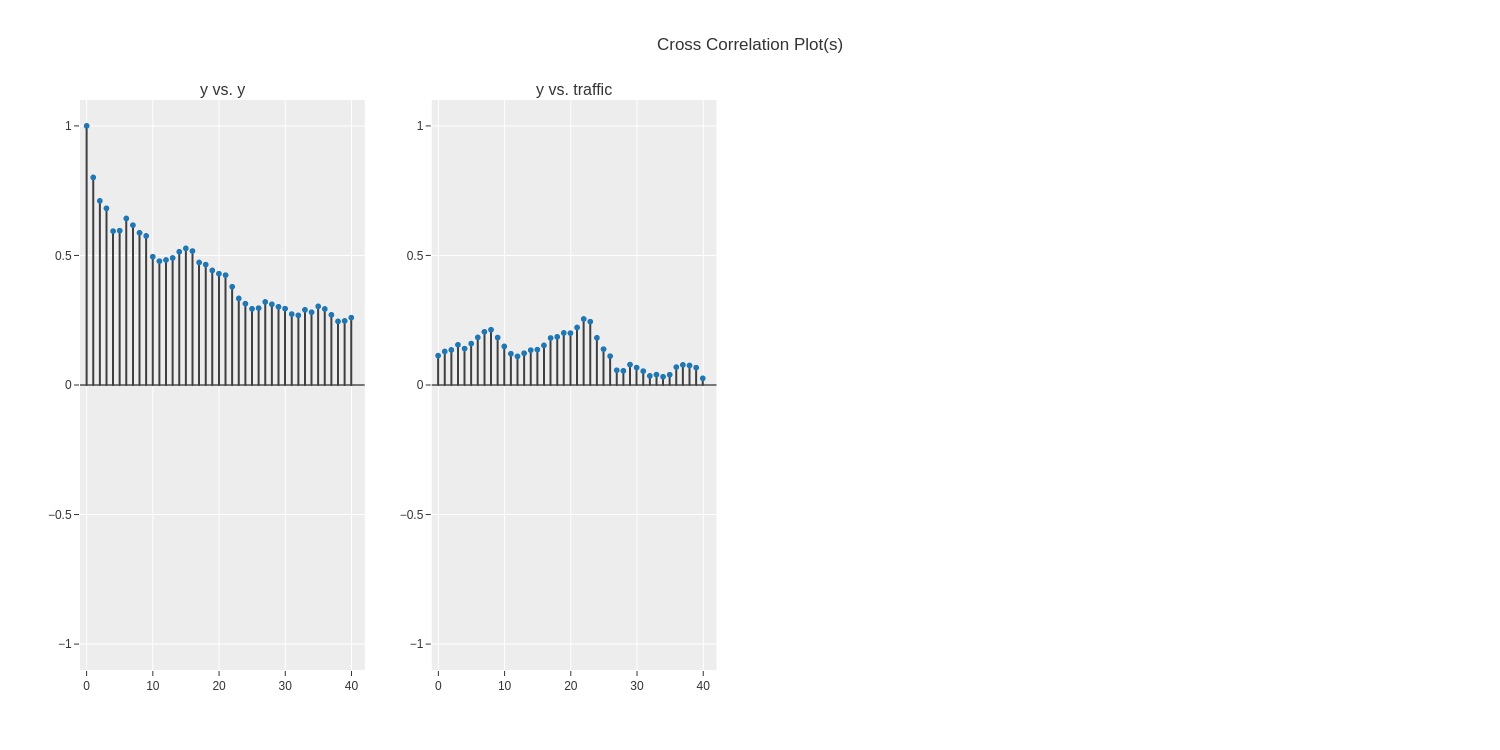

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

# Nord - Setup, Statistical Validation

Next, I repeat the EDA with each major dropship account: I use PyCaret's time-series EDA tools to be able to validate the necessary statistical testing and components of the time-series to inform how to approach forecast modeling.

1. Evaluate stationarity and required differencing
2. Check for seasonality and trend
3. Check if the series is / contains white noise
4. Check auto-correlation of target and exogenous variables
5. Check lagged co-variation of exogenous variables


In [ ]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()

In [ ]:
eda.setup(
  data=ds_nord,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (497, 2)
5              Train data shape                 (467, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     ebb9

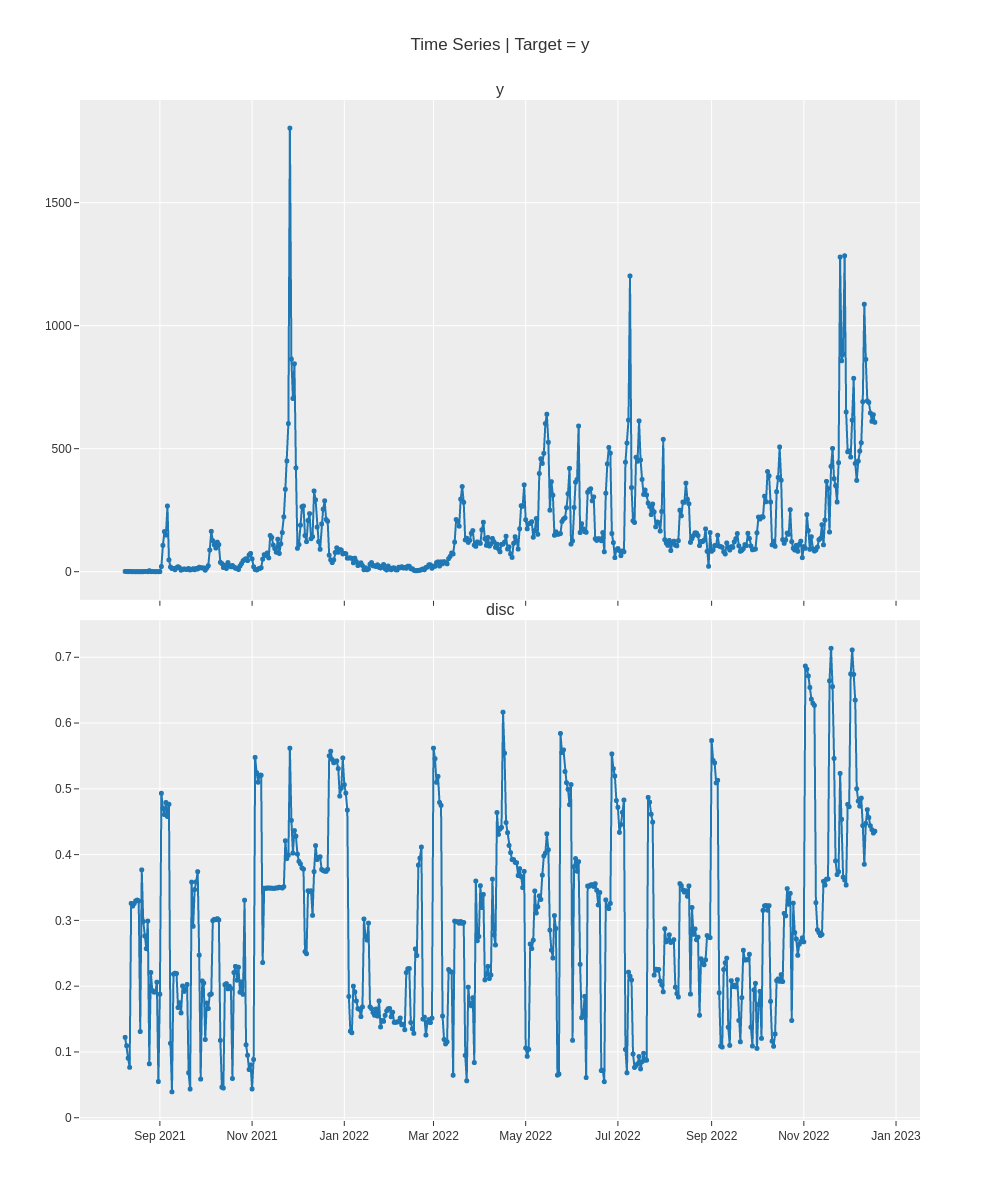

In [ ]:
# Plot the target variable along with any exogenous variables ----
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

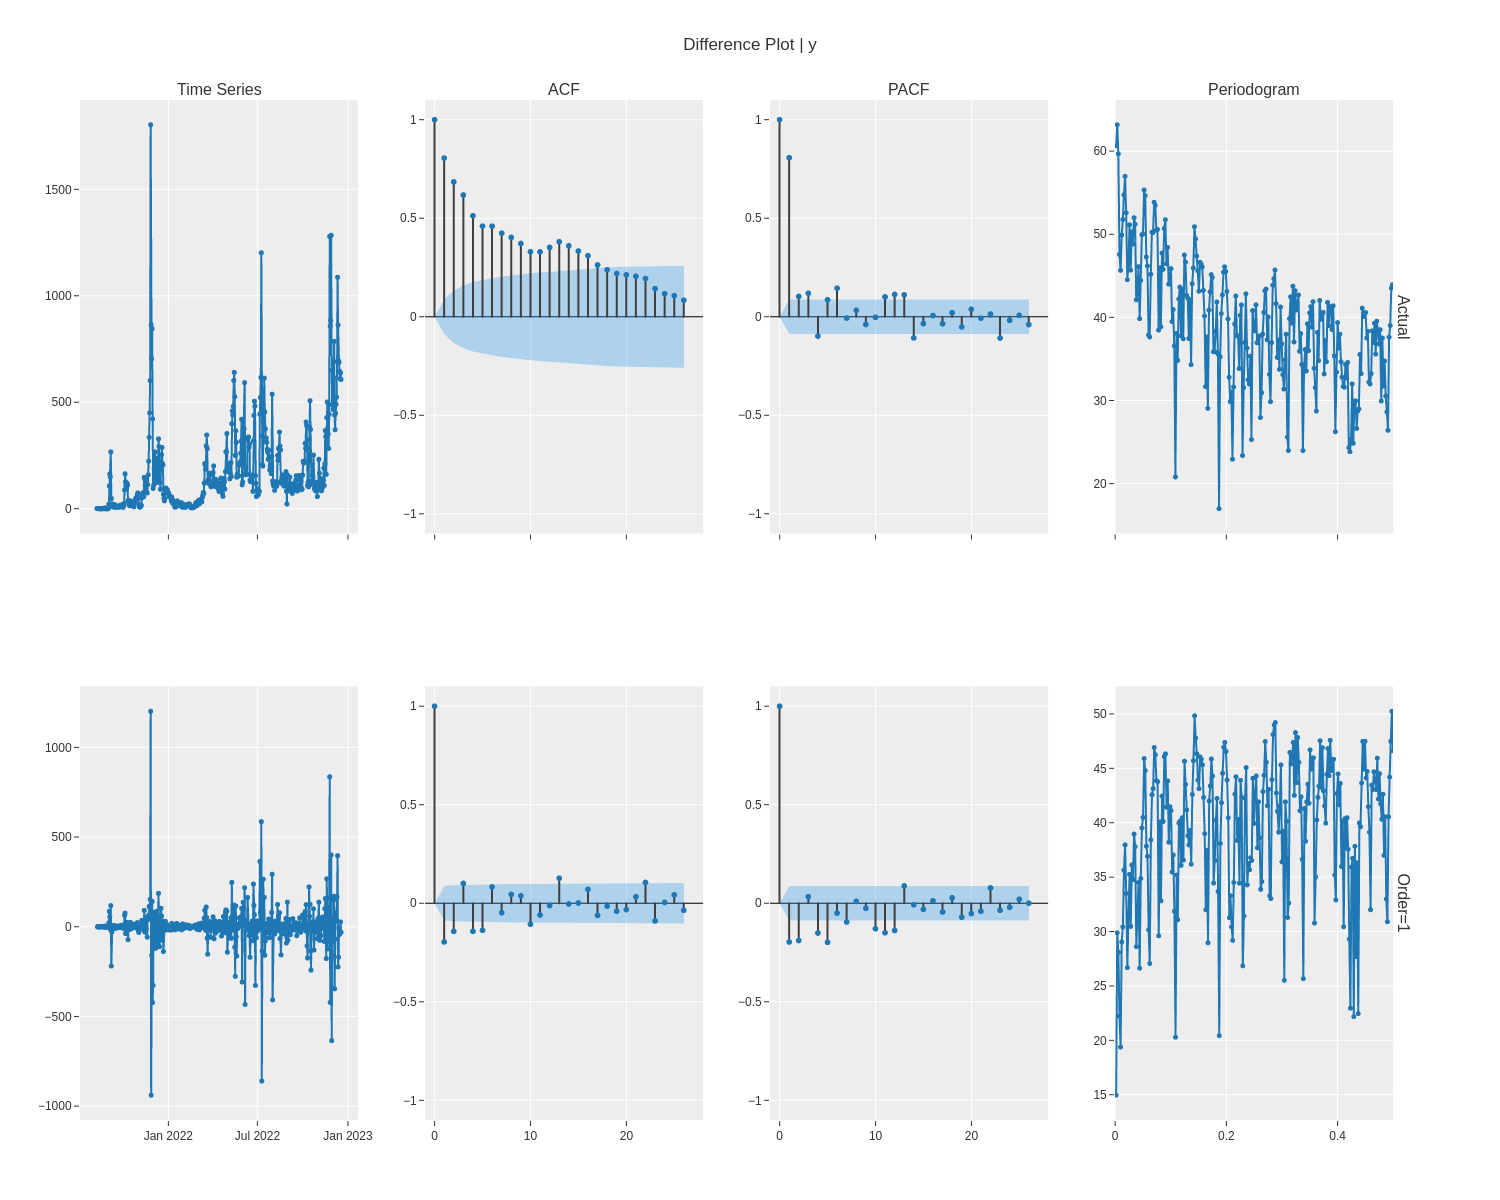

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1200},
    data_kwargs={"acf": True, "pacf": True, "periodogram": True})


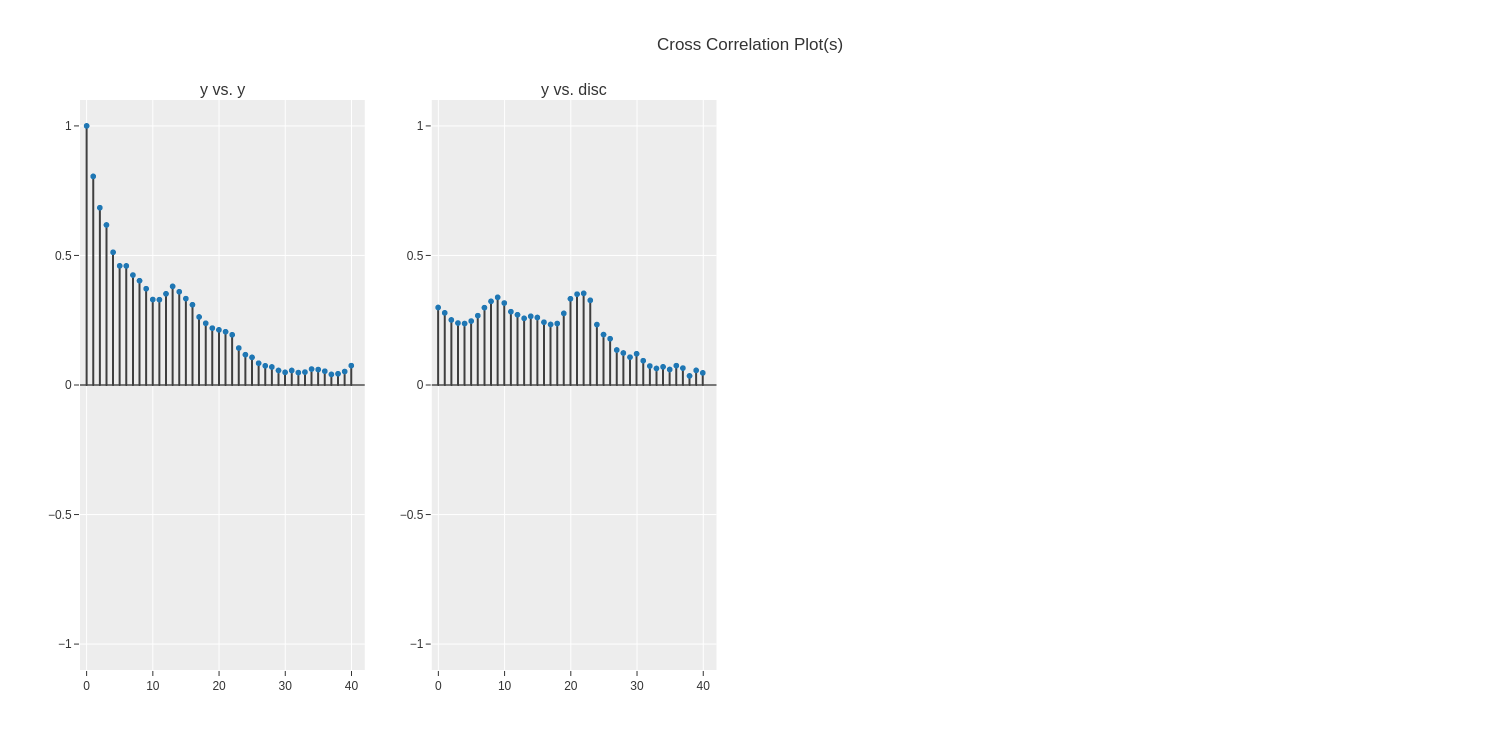

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

As expected, the lag correlation from .com discount offering to dropship is less than .com direct.  There is some weak correlation that is positive.  This matches ds in aggregation.

# DSW - Setup, Statistical Validation

Next, I repeat the EDA with each major dropship account: I use PyCaret's time-series EDA tools to be able to validate the necessary statistical testing and components of the time-series to inform how to approach forecast modeling.

1. Evaluate stationarity and required differencing
2. Check for seasonality and trend
3. Check if the series is / contains white noise
4. Check auto-correlation of target and exogenous variables
5. Check lagged co-variation of exogenous variables


In [ ]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()

In [ ]:
eda.setup(
  data=ds_dsw,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (252, 2)
5              Train data shape                 (222, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                    False
12       Seasonalities Detected                      [1]
13          Primary Seasonality                        1
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     8cbe

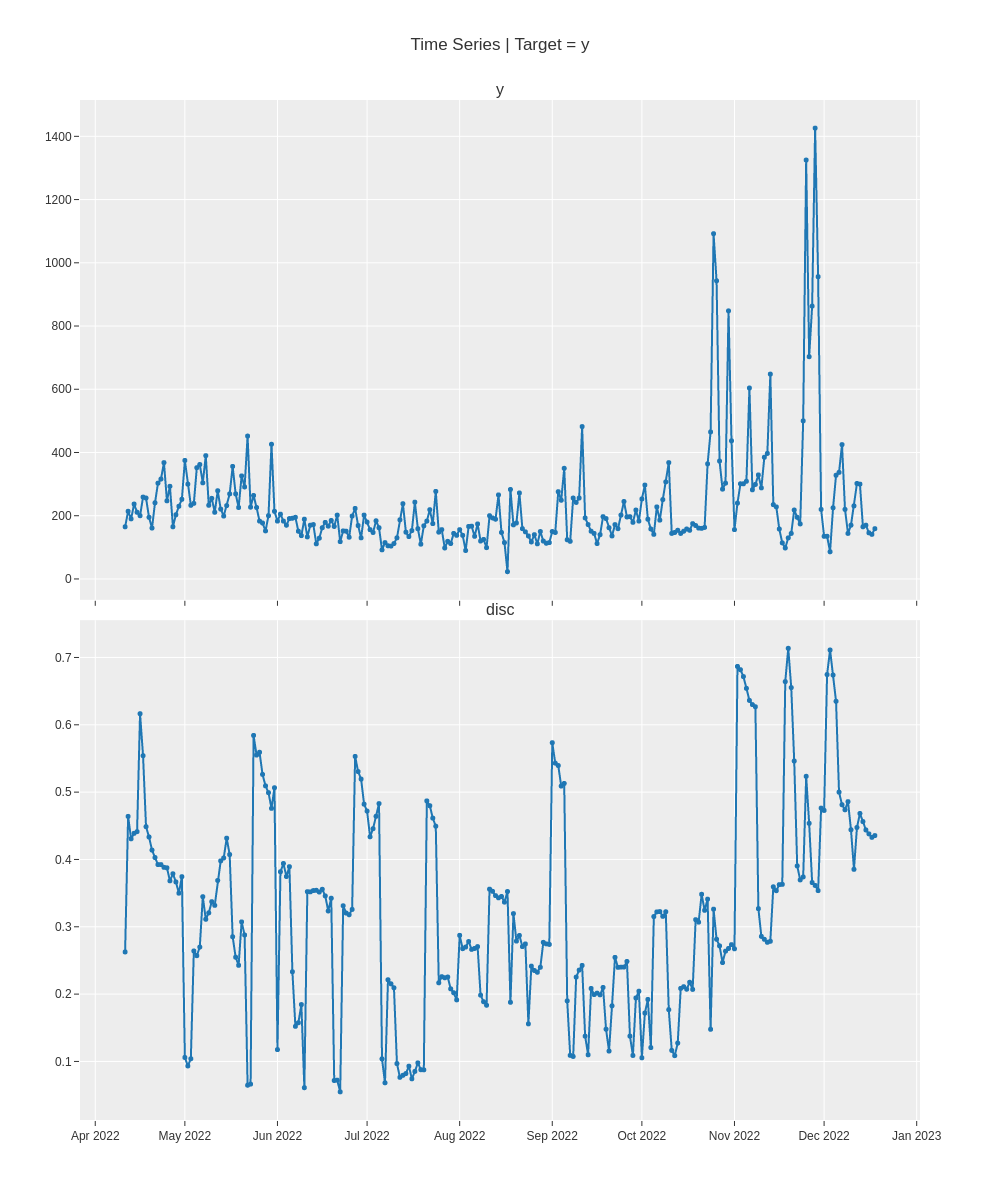

In [ ]:
# Plot the target variable along with any exogenous variables ----
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

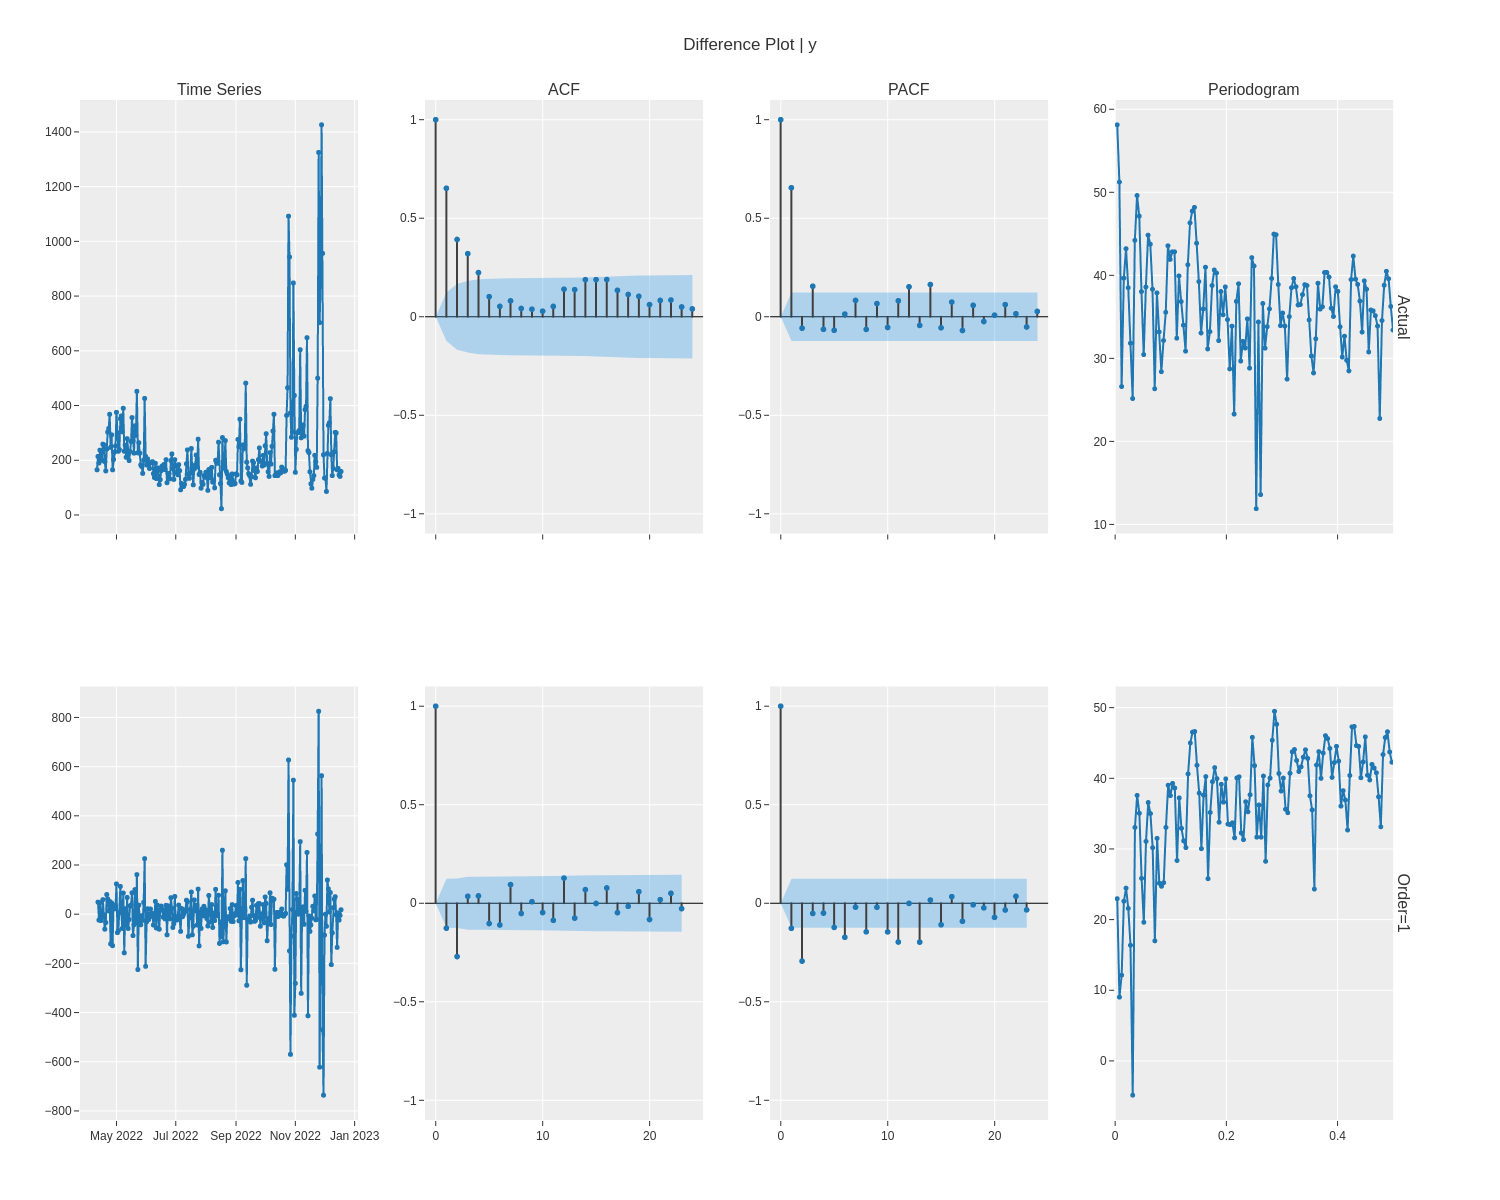

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1200},
    data_kwargs={"acf": True, "pacf": True, "periodogram": True})


In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

As expected, the lag correlation from .com discount offering to dropship is less than .com direct.  There is some weak correlation that is positive.  This matches ds in aggregation.

# Superstore - Setup, Statistical Validation

Last, I repeat the EDA with the Superstore external data for comparison. I use PyCaret's time-series EDA tools to be able to validate the necessary statistical testing and components of the time-series to inform how to approach forecast modeling.

1. Evaluate stationarity and required differencing
2. Check for seasonality and trend
3. Check if the series is / contains white noise
4. Check auto-correlation of target and exogenous variables
5. Check lagged co-variation of exogenous variables


In [ ]:
# Create an EDA experiment ----
eda = TSForecastingExperiment()

In [ ]:
target = 'y'

In [ ]:
eda.setup(
  data=superstore_grp,
  target=target,
  fh=30, #match to prophet experiment of 1 month forecast horizon to start
  numeric_imputation_target=0,
  numeric_imputation_exogenous="ffill",
  # Set defaults for the plots ----
  fig_kwargs={"renderer": "png", "width": 1500, "height": 1000},
  session_id=42,
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1458, 2)
5              Train data shape                (1428, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     d57f

In [ ]:
# Plot the target variable along with any exogenous variables ----
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

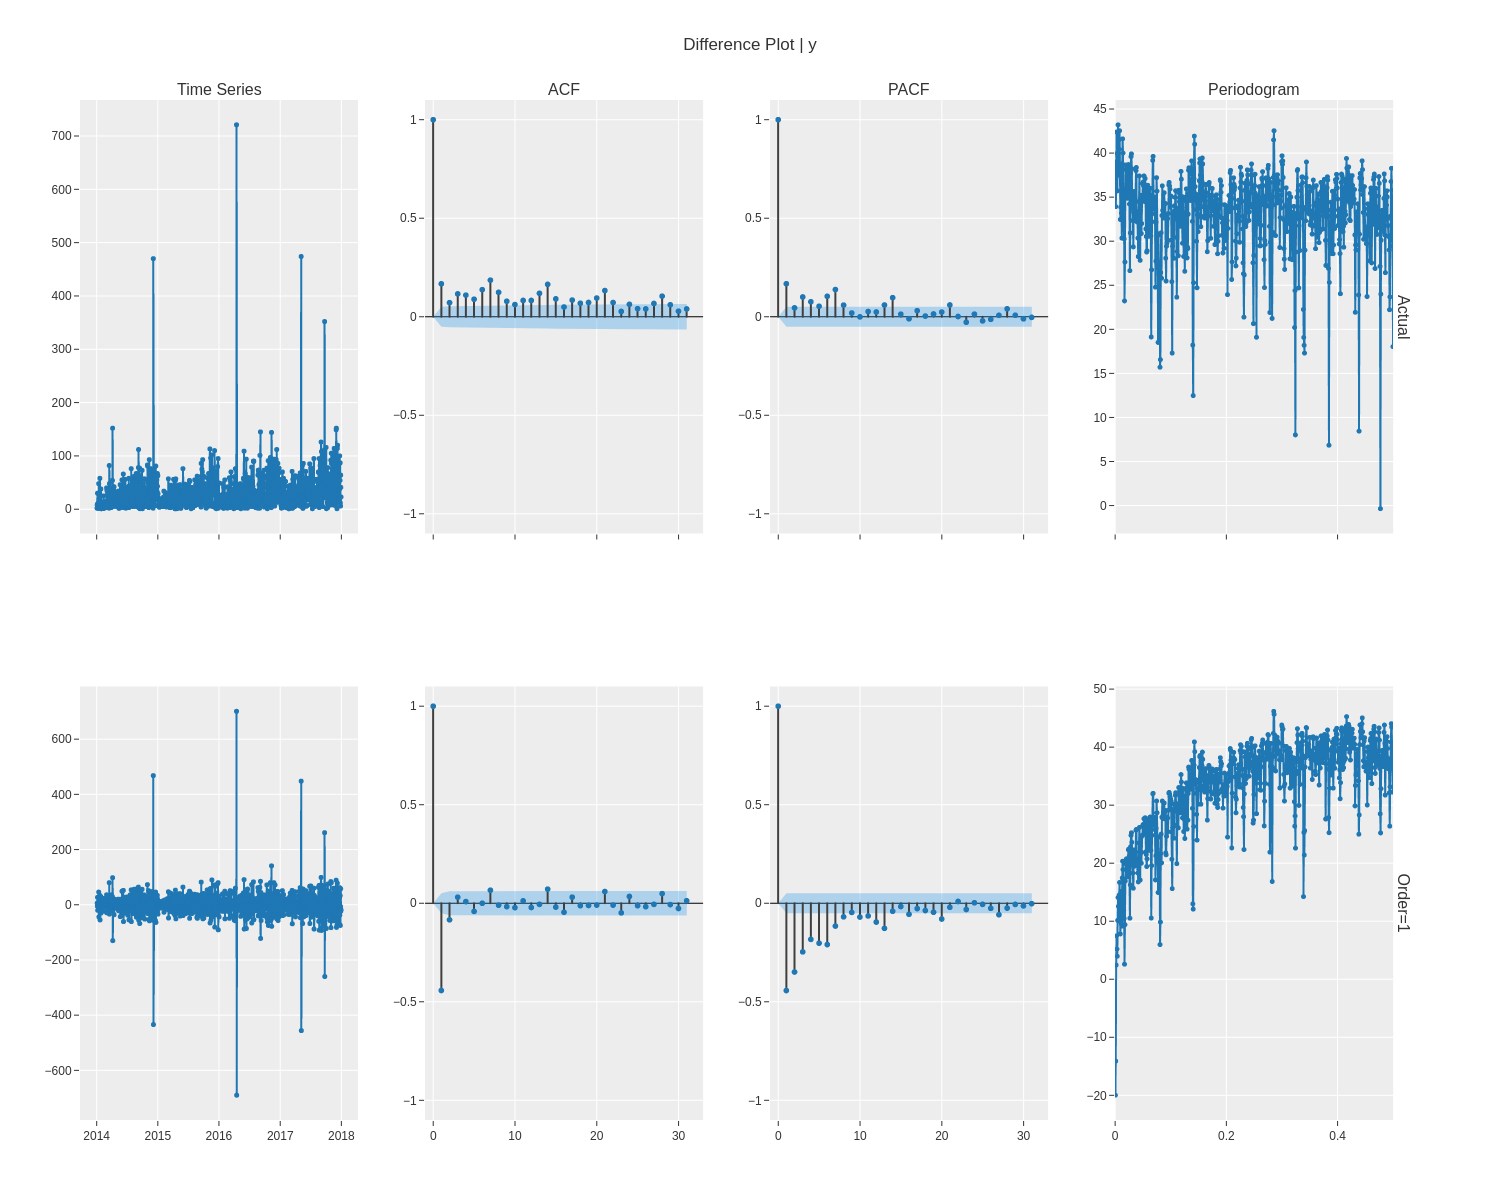

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1200},
    data_kwargs={"acf": True, "pacf": True, "periodogram": True})


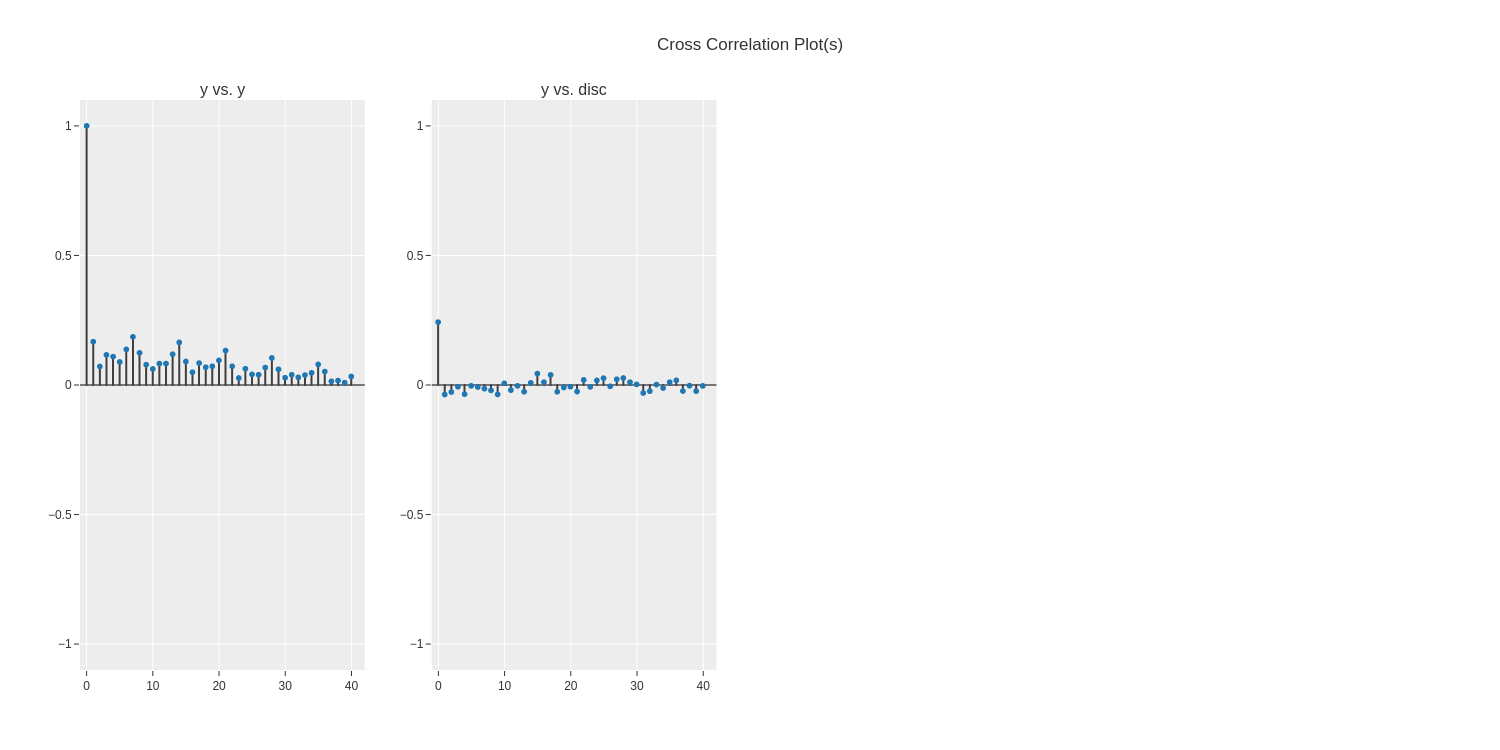

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"renderer":"png","height": 750, "width": 1500})

Interestingly, the superstore discount amount has very little lag correlation to the target, and thus may not be that useful in predicting the aggregate sales.

# ECOM - Baseline Models for Comparison (Naive and Univariate with Zero Exogenous Variables)

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
ecom_data_uni = ecom_data.copy()
#ecom_data_uni.set_index("index", inplace=True)
ecom_data_uni = ecom_data_uni[target]
ecom_data_uni

ds
2018-01-01     1953
2018-01-02     2210
2018-01-03     2417
2018-01-04     2582
2018-01-05     2609
              ...  
2022-12-23    35261
2022-12-24    10521
2022-12-25      980
2022-12-26      376
2022-12-27      562
Freq: D, Name: y, Length: 1822, dtype: int64

In [ ]:
exp_uni = TSForecastingExperiment()
exp_uni.setup(
    data=ecom_data_uni, fh=30, fold=5,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                (1822, 1)
5              Train data shape                (1792, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     821d

Start with naive forecast, mean of 7 days, which is often baseline used for weeks-of-supply metrics for inventory management.

In [ ]:
naive7 = exp_uni.create_model("naive", strategy="mean", sp=7)

cutoff         MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-30   3934.9664   4294.1152  2.4873  0.9460  0.9107  0.5656   
1     2022-07-30   3389.8868   3604.6604  1.2802  0.7212  0.7901  0.4782   
2     2022-08-29   3800.6794   4279.4020  1.3520  0.7375  0.8909  0.5714   
3     2022-09-28   2643.9441   2913.0923  0.9134  0.5499  0.6200  0.3901   
4     2022-10-28  11972.9118  18027.3674  0.5866  0.7462  2.8253  2.4312   
Mean         NaT   5148.4777   6623.7275  1.3239  0.7402  1.2074  0.8873   
SD           NaT   3441.7263   5724.5007  0.6432  0.1257  0.8155  0.7748   

          R2  
0    -5.1594  
1    -1.2010  
2    -0.2136  
3    -1.4107  
4    -0.4740  
Mean -1.6917  
SD    1.7895

In [ ]:
naive7_holdout = exp_uni.predict_model(naive7)

Model        MAE        RMSE    MAPE   SMAPE    MASE  \
0  Seasonal Naive Forecaster  8161.8756  14065.4118  1.3498  0.6247  1.8179   

    RMSSE      R2  
0  1.7549 -0.2571

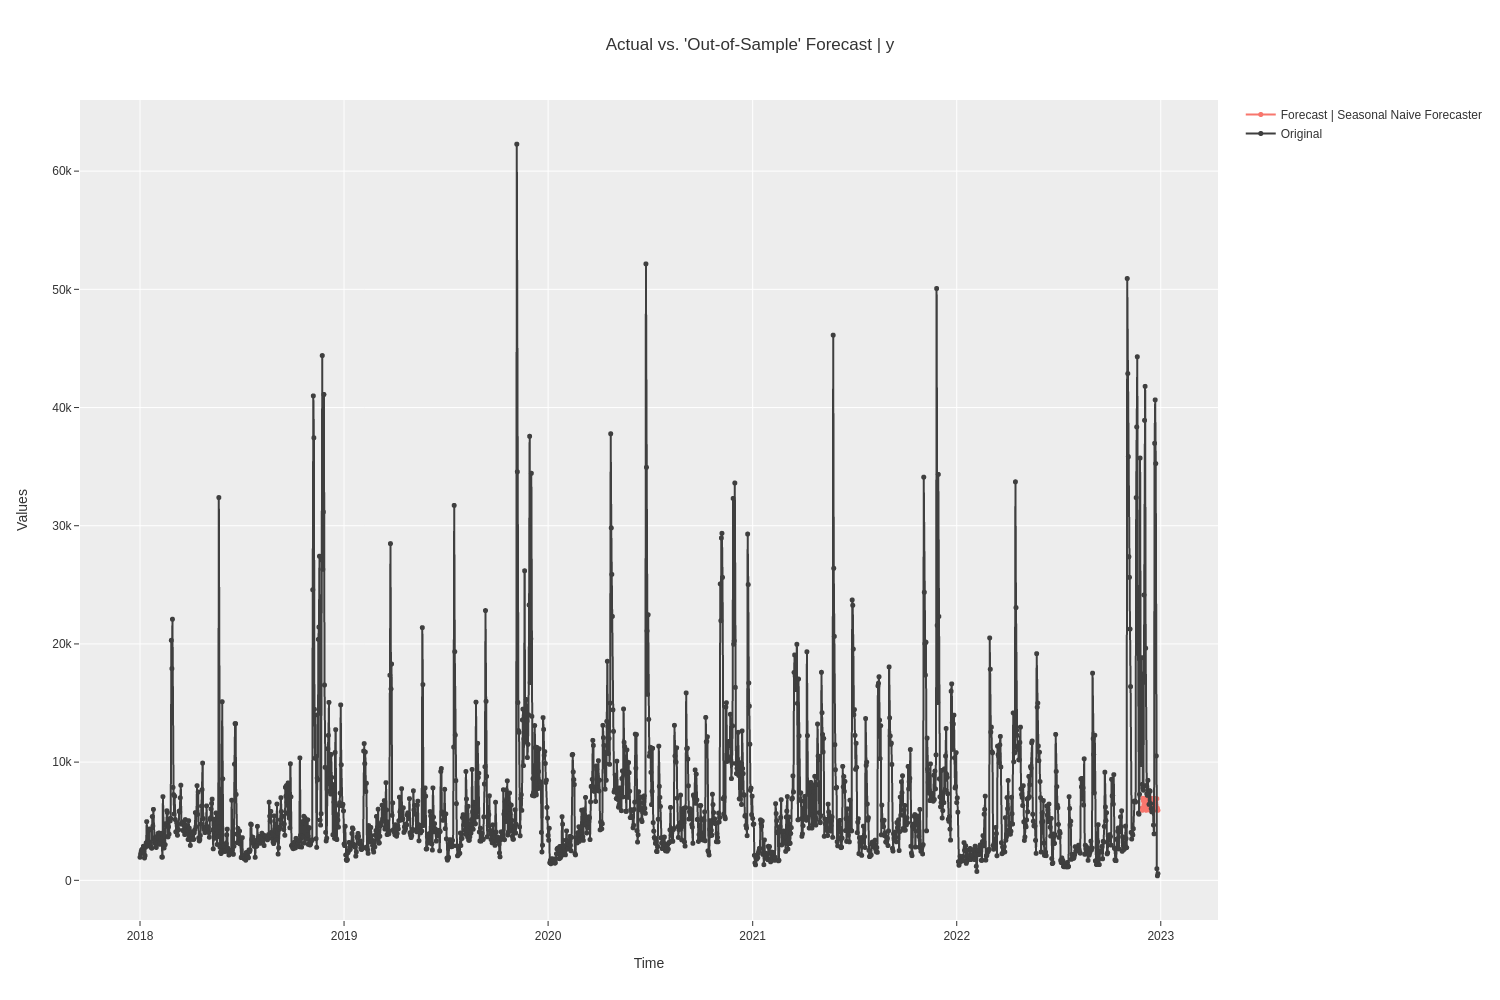

{'data': 2018-01-01     1953
 2018-01-02     2210
 2018-01-03     2417
 2018-01-04     2582
 2018-01-05     2609
               ...  
 2022-12-23    35261
 2022-12-24    10521
 2022-12-25      980
 2022-12-26      376
 2022-12-27      562
 Freq: D, Name: y, Length: 1822, dtype: int64,
 'predictions': [               y_pred
  2022-11-28  6092.8555
  2022-11-29  5924.3359
  2022-11-30  6938.0039
  2022-12-01  6734.0664
  2022-12-02  6898.0469
  2022-12-03  6154.3672
  2022-12-04  6903.7148
  2022-12-05  6092.8555
  2022-12-06  5924.3359
  2022-12-07  6938.0039
  2022-12-08  6734.0664
  2022-12-09  6898.0469
  2022-12-10  6154.3672
  2022-12-11  6903.7148
  2022-12-12  6092.8555
  2022-12-13  5924.3359
  2022-12-14  6938.0039
  2022-12-15  6734.0664
  2022-12-16  6898.0469
  2022-12-17  6154.3672
  2022-12-18  6903.7148
  2022-12-19  6092.8555
  2022-12-20  5924.3359
  2022-12-21  6938.0039
  2022-12-22  6734.0664
  2022-12-23  6898.0469
  2022-12-24  6154.3672
  2022-12-25  6903.7148
  2

In [ ]:
exp_uni.plot_model(naive7, return_data=True)

In [ ]:
exp_uni.predict_model()

Last-point method comes out even a little bit worse.  Let's try a univariate model, no exogenous, accounting for differencing identified in EDA.

In [ ]:
model = exp_uni.create_model("arima", order=(2,1,2))

cutoff         MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2020-12-07   5181.2417   7496.5672  0.8130  0.6548  1.3196  1.0056   
1     2021-01-06   1298.1662   1491.9876  0.5776  0.6041  0.3240  0.1986   
2     2021-02-05   2466.5278   2903.0872  0.5629  0.8402  0.6260  0.3914   
3     2021-03-07   4883.7795   6508.2570  0.4961  0.5863  1.2596  0.8883   
4     2021-04-06   3519.6894   4950.0295  0.3610  0.4347  0.8939  0.6742   
5     2021-05-06   6127.0741   8566.6078  1.0433  0.5986  1.5661  1.1760   
6     2021-06-05   4715.1534   7311.3928  0.4507  0.6271  1.1709  0.9735   
7     2021-07-05   9346.9148  10024.4046  3.0076  1.0684  2.3059  1.3356   
8     2021-08-04   3597.0245   5989.3150  0.3716  0.4802  0.8822  0.7997   
9     2021-09-03   5161.3978   6730.0831  1.1504  0.6148  1.2550  0.8981   
10    2021-10-03   1793.0664   2382.3548  0.4075  0.3807  0.4358  0.3195   
11    2021-11-02  10986.5002  15198.7627  0.6960  1.1301  2.6944  2.0568   
12    2021-12-02  15824.6468  20752.5191  2.2508  0.8214  3.7520  2.7230   
13    2022-01-01   5857.9062   6155.1315  2.9228  1.1233  1.3647  0.7964   
14    2022-01-31   2243.0438   4713.3261  0.4732  0.5183  0.5272  0.6146   
15    2022-03-02   7087.0922   9023.7869  1.9103  0.7883  1.6792  1.1836   
16    2022-04-01   5174.6686   7750.5141  0.4372  0.5936  1.2083  1.0148   
17    2022-05-01   3883.1730   5446.3563  0.4700  0.5378  0.9016  0.7114   
18    2022-05-31   4602.1805   4953.4804  1.5016  0.7394  1.0634  0.6490   
19    2022-06-30   4048.3441   4938.1405  2.4483  0.9021  0.9369  0.6504   
20    2022-07-30   1969.9718   3030.8849  0.4020  0.5281  0.4591  0.4021   
21    2022-08-29   2801.2866   4542.2185  0.4759  0.6038  0.6566  0.6065   
22    2022-09-28   2132.0073   2693.6133  0.5731  0.4634  0.5000  0.3607   
23    2022-10-28  14016.3303  20390.5517  0.6382  1.0702  3.3075  2.7499   
Mean         NaT   5363.2161   7247.6405  1.0184  0.6962  1.2954  0.9658   
SD           NaT   3670.2638   4924.0480  0.8295  0.2193  0.8766  0.6577   

           R2  
0     -0.5068  
1     -1.1539  
2     -2.3722  
3     -0.4677  
4     -0.6239  
5      0.0245  
6     -0.6372  
7    -12.0510  
8     -0.3305  
9     -5.2501  
10    -0.0864  
11    -1.1551  
12   -35.9629  
13   -26.0236  
14    -0.1899  
15    -4.2612  
16    -0.6639  
17    -0.9433  
18    -3.1977  
19    -7.1455  
20    -0.5561  
21    -0.3673  
22    -1.0611  
23    -0.8858  
Mean  -4.4112  
SD     8.5858

**bold text**# DS Agg - Baseline Models for Comparison (Naive and Univariate with Zero Exogenous Variables)

In [ ]:
ecom_data_uni = ecom_data.copy()
#ecom_data_uni.set_index("index", inplace=True)
ecom_data_uni = ecom_data_uni[target]
ecom_data_uni

ds
2018-01-01     1953
2018-01-02     2210
2018-01-03     2417
2018-01-04     2582
2018-01-05     2609
              ...  
2022-12-23    35261
2022-12-24    10521
2022-12-25      980
2022-12-26      376
2022-12-27      562
Freq: D, Name: y, Length: 1822, dtype: int64

In [ ]:
exp_uni = TSForecastingExperiment()
exp_uni.setup(
    data=ecom_data_uni, fh=30, fold=24,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                (1822, 1)
5              Train data shape                (1792, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                       24
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     1294

Start with naive forecast, mean of 7 days, which is often baseline used for weeks-of-supply metrics for inventory management.

In [ ]:
model = exp_uni.create_model("naive", strategy="mean", sp=7)

cutoff         MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2020-12-07   3823.9451   6309.2570  0.5953  0.4500  0.9739  0.8463   
1     2021-01-06   3968.2299   4140.8365  1.8830  0.9027  0.9905  0.5513   
2     2021-02-05   2487.8011   2921.7434  0.9600  0.5372  0.6314  0.3939   
3     2021-03-07   4039.8614   5920.0630  0.3946  0.4362  1.0419  0.8080   
4     2021-04-06   3013.7631   4281.8501  0.3203  0.3579  0.7654  0.5832   
5     2021-05-06   4513.5689   8908.5540  0.4818  0.4622  1.1537  1.2230   
6     2021-06-05   4229.1107   6032.9190  0.5498  0.5123  1.0502  0.8033   
7     2021-07-05   3281.7007   3553.3442  1.0183  0.6313  0.8096  0.4734   
8     2021-08-04   4311.9350   5206.7454  0.8018  0.6285  1.0576  0.6952   
9     2021-09-03   2512.0139   2901.3205  0.5405  0.4225  0.6108  0.3872   
10    2021-10-03   2477.3151   2764.9706  0.7274  0.4808  0.6021  0.3708   
11    2021-11-02   7638.0018  12798.7157  0.3723  0.5305  1.8732  1.7320   
12    2021-12-02   2936.3788   3993.1292  0.2957  0.3404  0.6962  0.5239   
13    2022-01-01   4305.7846   4489.7924  2.2724  0.9975  1.0031  0.5809   
14    2022-01-31   4441.1859   5118.9762  1.8416  0.8819  1.0438  0.6675   
15    2022-03-02   3737.0269   3963.7440  0.8721  0.6221  0.8855  0.5199   
16    2022-04-01   4266.3993   6866.6705  0.3788  0.4381  0.9962  0.8990   
17    2022-05-01   3177.3162   4126.3072  0.4358  0.4173  0.7377  0.5390   
18    2022-05-31   2644.0099   3166.7448  0.9544  0.5272  0.6109  0.4149   
19    2022-06-30   3934.9664   4294.1152  2.4873  0.9460  0.9107  0.5656   
20    2022-07-30   3389.8868   3604.6604  1.2802  0.7212  0.7901  0.4782   
21    2022-08-29   3800.6794   4279.4020  1.3520  0.7375  0.8909  0.5714   
22    2022-09-28   2643.9441   2913.0923  0.9134  0.5499  0.6200  0.3901   
23    2022-10-28  11972.9118  18027.3674  0.5866  0.7462  2.8253  2.4312   
Mean         NaT   4064.4890   5441.0134  0.9298  0.5949  0.9821  0.7271   
SD           NaT   1955.6319   3410.5696  0.6118  0.1859  0.4651  0.4634   

           R2  
0     -0.0673  
1    -15.5909  
2     -2.4157  
3     -0.2144  
4     -0.2151  
5     -0.0549  
6     -0.1147  
7     -0.6398  
8     -0.0055  
9     -0.1615  
10    -0.4633  
11    -0.5282  
12    -0.3685  
13   -13.3787  
14    -0.4036  
15    -0.0151  
16    -0.3061  
17    -0.1155  
18    -0.7156  
19    -5.1594  
20    -1.2010  
21    -0.2136  
22    -1.4107  
23    -0.4740  
Mean  -1.8430  
SD     3.9721

WOS last 7 days does not come out as a very strong forecast for upcoming sales.  Let's try the last-point strategy for comparison.

In [ ]:
model = exp_uni.create_model("naive", strategy="last")

cutoff         MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2020-12-07   4356.3667   6124.0379  0.8849  0.5055  1.1095  0.8215   
1     2021-01-06   1243.6000   1606.2474  0.4235  0.5696  0.3104  0.2139   
2     2021-02-05   2064.9333   2562.0384  0.4400  0.6128  0.5241  0.3454   
3     2021-03-07   4370.8000   6485.7570  0.3838  0.4802  1.1273  0.8852   
4     2021-04-06   3175.6000   4799.9740  0.2938  0.3779  0.8065  0.6537   
5     2021-05-06   7827.5000   9586.7994  1.3930  0.7798  2.0008  1.3161   
6     2021-06-05   4298.6667   6820.9170  0.3949  0.5146  1.0675  0.9082   
7     2021-07-05   7312.7333   7691.4440  2.3906  0.9760  1.8041  1.0247   
8     2021-08-04   3880.7333   6427.8034  0.3702  0.5423  0.9518  0.8583   
9     2021-09-03   8066.0667   8503.4337  1.9169  0.8795  1.9613  1.1347   
10    2021-10-03   1728.5333   2287.6288  0.4252  0.3626  0.4201  0.3068   
11    2021-11-02  10958.7000  15075.8926  0.6929  1.0996  2.6876  2.0401   
12    2021-12-02   2880.2333   3826.6742  0.3106  0.3326  0.6829  0.5021   
13    2022-01-01   4276.3333   4411.6605  2.2433  0.9983  0.9963  0.5708   
14    2022-01-31   1910.1000   4505.3628  0.3858  0.3809  0.4489  0.5875   
15    2022-03-02  11654.1333  12300.2445  3.3014  1.0445  2.7614  1.6134   
16    2022-04-01   4062.5333   6560.2817  0.3788  0.4115  0.9486  0.8589   
17    2022-05-01   3439.9333   4838.5245  0.3777  0.4559  0.7987  0.6320   
18    2022-05-31   2916.8333   3370.5762  1.0532  0.5628  0.6740  0.4416   
19    2022-06-30   3793.0333   4125.4669  2.3996  0.9332  0.8778  0.5434   
20    2022-07-30   1879.7000   3060.9992  0.3472  0.4784  0.4381  0.4061   
21    2022-08-29   2569.4667   4111.7446  0.5287  0.5204  0.6023  0.5490   
22    2022-09-28   1925.3667   2597.7928  0.3946  0.5114  0.4515  0.3479   
23    2022-10-28  13988.1000  20399.6332  0.6328  1.0446  3.3009  2.7511   
Mean         NaT   4774.1667   6336.7056  0.9318  0.6406  1.1563  0.8464   
SD           NaT   3355.1662   4288.9900  0.8446  0.2478  0.8084  0.5794   

           R2  
0     -0.0056  
1     -1.4964  
2     -1.6264  
3     -0.4576  
4     -0.5269  
5     -0.2217  
6     -0.4249  
7     -6.6832  
8     -0.5325  
9     -8.9778  
10    -0.0017  
11    -1.1204  
12    -0.2568  
13   -12.8826  
14    -0.0872  
15    -8.7754  
16    -0.1921  
17    -0.5338  
18    -0.9436  
19    -4.6851  
20    -0.5871  
21    -0.1204  
22    -0.9171  
23    -0.8875  
Mean  -2.2060  
SD     3.4388

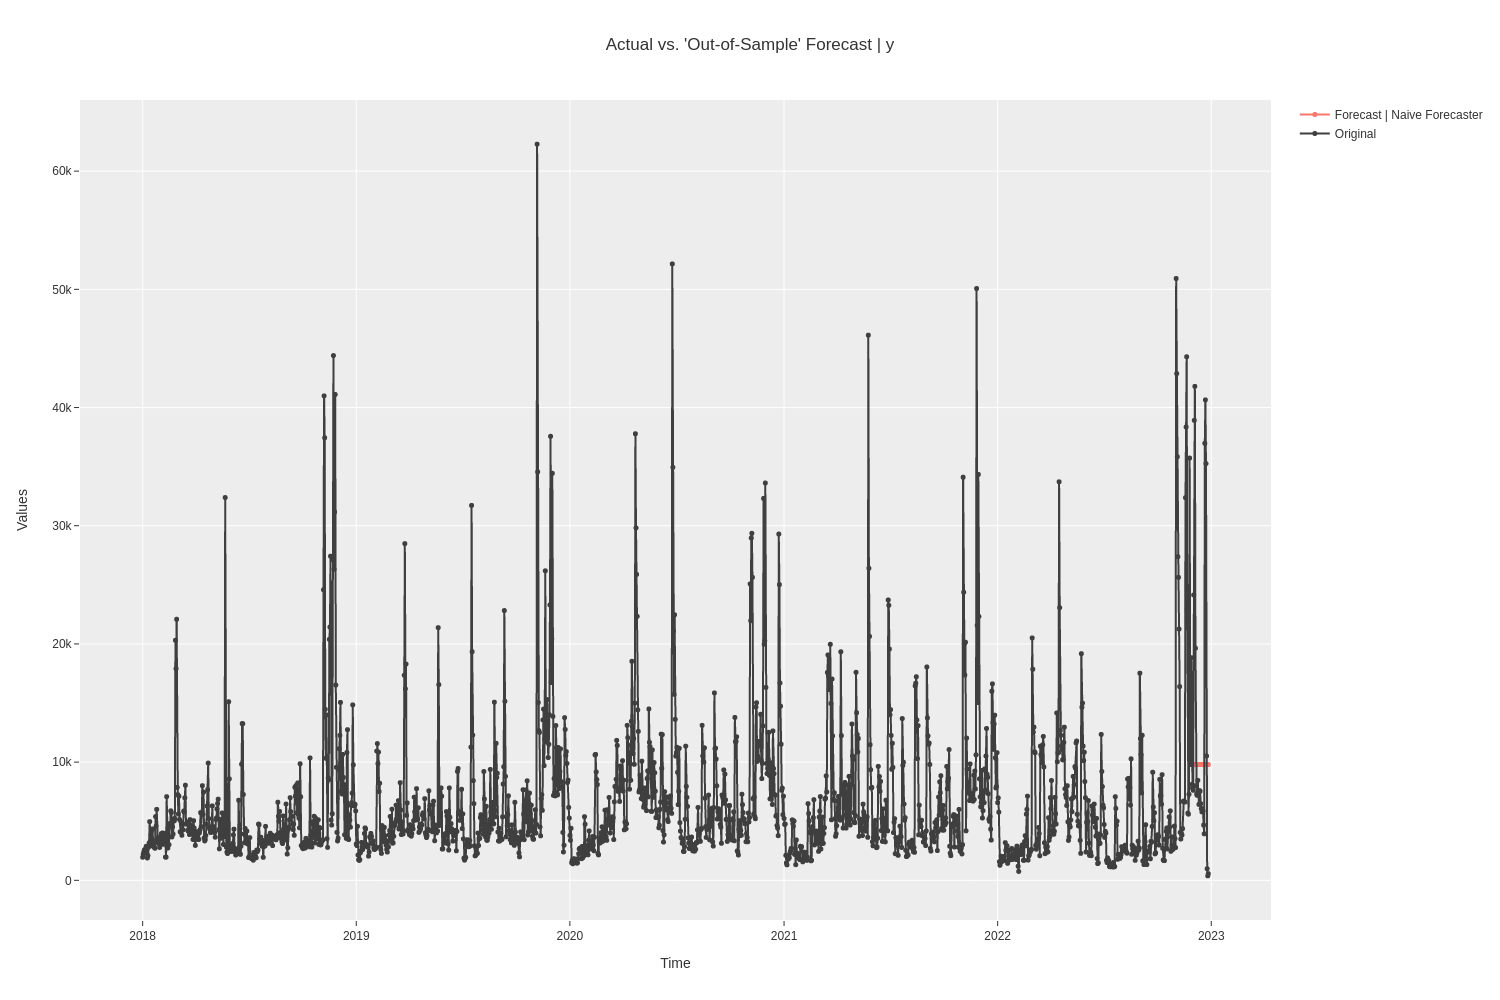

{'data': 2018-01-01     1953
 2018-01-02     2210
 2018-01-03     2417
 2018-01-04     2582
 2018-01-05     2609
               ...  
 2022-12-23    35261
 2022-12-24    10521
 2022-12-25      980
 2022-12-26      376
 2022-12-27      562
 Freq: D, Name: y, Length: 1822, dtype: int64,
 'predictions': [            y_pred
  2022-11-28  9794.0
  2022-11-29  9794.0
  2022-11-30  9794.0
  2022-12-01  9794.0
  2022-12-02  9794.0
  2022-12-03  9794.0
  2022-12-04  9794.0
  2022-12-05  9794.0
  2022-12-06  9794.0
  2022-12-07  9794.0
  2022-12-08  9794.0
  2022-12-09  9794.0
  2022-12-10  9794.0
  2022-12-11  9794.0
  2022-12-12  9794.0
  2022-12-13  9794.0
  2022-12-14  9794.0
  2022-12-15  9794.0
  2022-12-16  9794.0
  2022-12-17  9794.0
  2022-12-18  9794.0
  2022-12-19  9794.0
  2022-12-20  9794.0
  2022-12-21  9794.0
  2022-12-22  9794.0
  2022-12-23  9794.0
  2022-12-24  9794.0
  2022-12-25  9794.0
  2022-12-26  9794.0
  2022-12-27  9794.0]}

In [ ]:
exp_uni.plot_model(model, return_data=True)

Last-point method comes out even a little bit worse.  Let's try a univariate model, no exogenous, accounting for differencing identified in EDA.

In [ ]:
model = exp_uni.create_model("arima", order=(2,1,2))

cutoff         MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2020-12-07   5181.2417   7496.5672  0.8130  0.6548  1.3196  1.0056   
1     2021-01-06   1298.1662   1491.9876  0.5776  0.6041  0.3240  0.1986   
2     2021-02-05   2466.5278   2903.0872  0.5629  0.8402  0.6260  0.3914   
3     2021-03-07   4883.7795   6508.2570  0.4961  0.5863  1.2596  0.8883   
4     2021-04-06   3519.6894   4950.0295  0.3610  0.4347  0.8939  0.6742   
5     2021-05-06   6127.0741   8566.6078  1.0433  0.5986  1.5661  1.1760   
6     2021-06-05   4715.1534   7311.3928  0.4507  0.6271  1.1709  0.9735   
7     2021-07-05   9346.9148  10024.4046  3.0076  1.0684  2.3059  1.3356   
8     2021-08-04   3597.0245   5989.3150  0.3716  0.4802  0.8822  0.7997   
9     2021-09-03   5161.3978   6730.0831  1.1504  0.6148  1.2550  0.8981   
10    2021-10-03   1793.0664   2382.3548  0.4075  0.3807  0.4358  0.3195   
11    2021-11-02  10986.5002  15198.7627  0.6960  1.1301  2.6944  2.0568   
12    2021-12-02  15824.6468  20752.5191  2.2508  0.8214  3.7520  2.7230   
13    2022-01-01   5857.9062   6155.1315  2.9228  1.1233  1.3647  0.7964   
14    2022-01-31   2243.0438   4713.3261  0.4732  0.5183  0.5272  0.6146   
15    2022-03-02   7087.0922   9023.7869  1.9103  0.7883  1.6792  1.1836   
16    2022-04-01   5174.6686   7750.5141  0.4372  0.5936  1.2083  1.0148   
17    2022-05-01   3883.1730   5446.3563  0.4700  0.5378  0.9016  0.7114   
18    2022-05-31   4602.1805   4953.4804  1.5016  0.7394  1.0634  0.6490   
19    2022-06-30   4048.3441   4938.1405  2.4483  0.9021  0.9369  0.6504   
20    2022-07-30   1969.9718   3030.8849  0.4020  0.5281  0.4591  0.4021   
21    2022-08-29   2801.2866   4542.2185  0.4759  0.6038  0.6566  0.6065   
22    2022-09-28   2132.0073   2693.6133  0.5731  0.4634  0.5000  0.3607   
23    2022-10-28  14016.3303  20390.5517  0.6382  1.0702  3.3075  2.7499   
Mean         NaT   5363.2161   7247.6405  1.0184  0.6962  1.2954  0.9658   
SD           NaT   3670.2638   4924.0480  0.8295  0.2193  0.8766  0.6577   

           R2  
0     -0.5068  
1     -1.1539  
2     -2.3722  
3     -0.4677  
4     -0.6239  
5      0.0245  
6     -0.6372  
7    -12.0510  
8     -0.3305  
9     -5.2501  
10    -0.0864  
11    -1.1551  
12   -35.9629  
13   -26.0236  
14    -0.1899  
15    -4.2612  
16    -0.6639  
17    -0.9433  
18    -3.1977  
19    -7.1455  
20    -0.5561  
21    -0.3673  
22    -1.0611  
23    -0.8858  
Mean  -4.4112  
SD     8.5858

In [ ]:
ds_data_uni = ds_agg_data.copy()
#ds_data_uni.set_index("index", inplace=True)
ds_data_uni = ds_data_uni[target]
ds_data_uni

ds
2021-04-30     15
2021-05-01     11
2021-05-02      5
2021-05-03      7
2021-05-04     10
             ... 
2022-12-14    933
2022-12-15    870
2022-12-16    805
2022-12-17    833
2022-12-18    809
Freq: D, Name: y, Length: 598, dtype: int64

In [ ]:
exp_uni = TSForecastingExperiment()
exp_uni.setup(
    data=ds_data_uni, fh=30, fold=6,
    numeric_imputation_target=0, numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                 (598, 1)
5              Train data shape                 (568, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        6
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     6b31

Start with naive forecast, mean of 7 days, which is often baseline used for weeks-of-supply metrics for inventory management.

In [ ]:
model = exp_uni.create_model("naive", strategy="mean", sp=7)

cutoff       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-05-22  325.0836  347.9395  0.7173  1.1258  4.7773  2.0345 -6.2610
1     2022-06-21  352.3463  418.8809  0.6540  1.0086  4.7218  2.4163 -2.3605
2     2022-07-21  201.5042  227.4096  0.5121  0.7072  2.3428  1.2108 -2.9741
3     2022-08-20  137.9246  161.4947  0.4025  0.5192  1.5520  0.8684 -1.8350
4     2022-09-19  254.2001  292.6797  0.5388  0.7568  2.8302  1.5980 -2.3556
5     2022-10-19  340.2766  409.7770  0.5787  0.8401  3.7354  2.2616 -2.1144
Mean         NaT  268.5559  309.6969  0.5672  0.8263  3.3266  1.7316 -2.9834
SD           NaT   78.6624   93.4740  0.1009  0.1985  1.1959  0.5591  1.5055

Let's try the last-point strategy for comparison.

In [ ]:
model = exp_uni.create_model("naive", strategy="last")

cutoff       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-05-22  217.4333  230.3581  0.5549  0.4185  3.1953  1.3469 -2.1827
1     2022-06-21  189.7000  256.6666  0.3702  0.3966  2.5422  1.4806 -0.2617
2     2022-07-21  132.0667  151.7887  0.4429  0.3377  1.5355  0.8082 -0.7705
3     2022-08-20   88.8333  107.1197  0.3248  0.2687  0.9996  0.5760 -0.2473
4     2022-09-19  141.3000  200.0809  0.2603  0.3197  1.5732  1.0924 -0.5682
5     2022-10-19  216.0333  311.1836  0.3222  0.4154  2.3715  1.7175 -0.7960
Mean         NaT  164.2278  209.5329  0.3792  0.3594  2.0362  1.1703 -0.8044
SD           NaT   47.2719   66.9581  0.0960  0.0552  0.7362  0.3910  0.6534

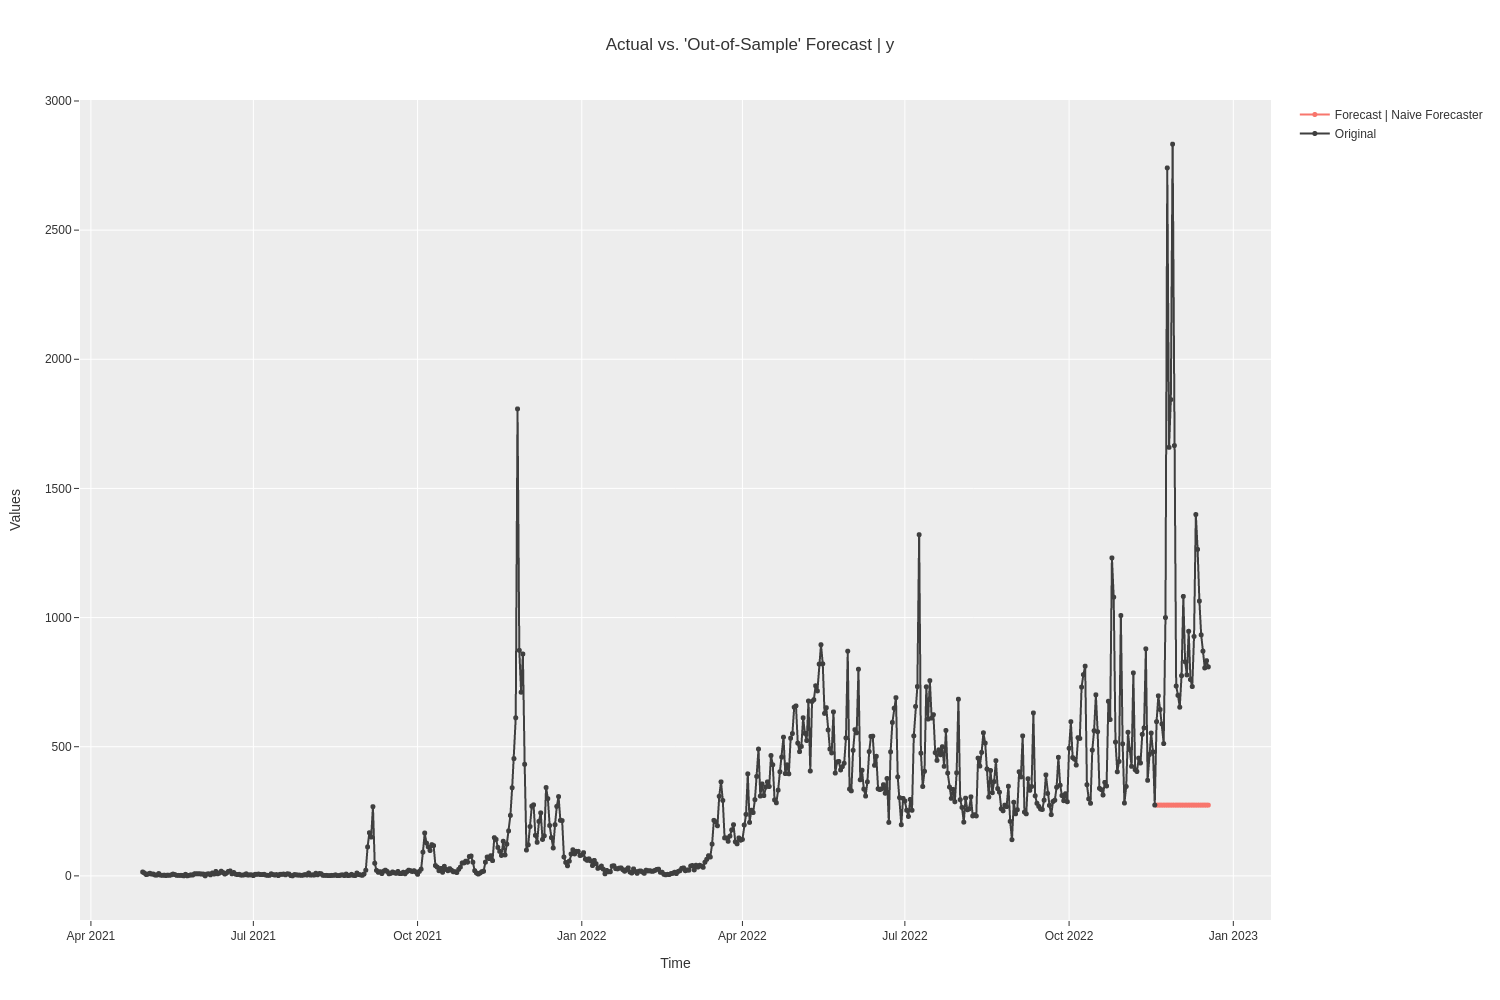

{'data': 2021-04-30     15
 2021-05-01     11
 2021-05-02      5
 2021-05-03      7
 2021-05-04     10
              ... 
 2022-12-14    933
 2022-12-15    870
 2022-12-16    805
 2022-12-17    833
 2022-12-18    809
 Freq: D, Name: y, Length: 598, dtype: int64,
 'predictions': [            y_pred
  2022-11-19   274.0
  2022-11-20   274.0
  2022-11-21   274.0
  2022-11-22   274.0
  2022-11-23   274.0
  2022-11-24   274.0
  2022-11-25   274.0
  2022-11-26   274.0
  2022-11-27   274.0
  2022-11-28   274.0
  2022-11-29   274.0
  2022-11-30   274.0
  2022-12-01   274.0
  2022-12-02   274.0
  2022-12-03   274.0
  2022-12-04   274.0
  2022-12-05   274.0
  2022-12-06   274.0
  2022-12-07   274.0
  2022-12-08   274.0
  2022-12-09   274.0
  2022-12-10   274.0
  2022-12-11   274.0
  2022-12-12   274.0
  2022-12-13   274.0
  2022-12-14   274.0
  2022-12-15   274.0
  2022-12-16   274.0
  2022-12-17   274.0
  2022-12-18   274.0]}

In [ ]:
exp_uni.plot_model(model, return_data=True)

Last-point method comes out much better for dropship.  However, for last month of year data, it is constantly under-representing sales, which is not very useful.  

Start with naive forecast, mean of 7 days, which is often baseline used for weeks-of-supply metrics for inventory management.

In [ ]:
#Use smape for basis of model performance comparison
metric='smape'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "naive", "snaive"]

**Experiment for best model without exogenous variables.**

In [ ]:
noex_auto = TSForecastingExperiment()
noex_auto.setup(
    data=ecom_data_uni, target=target, fh=30, fold=24, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                (1822, 1)
5              Train data shape                (1792, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                       24
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     1143

In [ ]:
best_noex = noex_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
grand_means                                 Grand Means Forecaster   
ets                                                            ETS   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
croston                                                    Croston   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
exp_smooth                                   Exponential Smoothing   
theta                                             Theta Forecaster   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
polytrend                              Polynomial Trend Forecaster   
arima                                                        ARIMA   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                          MAE          RMSE       MAPE   SMAPE      MASE  \
grand_means         4066.4398     5430.9877       0.93  0.5962    0.9827   
ets                 4852.3114     6285.9798     1.0548  0.6094    1.1753   
knn_cds_dt          4536.1615     6011.7155     1.0889  0.6147    1.0932   
croston             4590.4594     6007.7672     0.9644   0.619    1.1122   
gbr_cds_dt          4466.4276     5850.5101      1.071  0.6203    1.0796   
huber_cds_dt        4444.4603     5735.1251     1.1048  0.6277    1.0746   
et_cds_dt            4695.794     5938.5786     1.1618  0.6377    1.1321   
dt_cds_dt           5436.0185     7830.6257      1.349  0.6388    1.3137   
rf_cds_dt           4851.4152     6128.8937     1.2059  0.6389    1.1724   
ridge_cds_dt        4520.4994     5754.5606     1.1519  0.6407    1.0927   
lasso_cds_dt        4520.4994     5754.5606     1.1519  0.6407    1.0927   
en_cds_dt           4520.4994     5754.5606     1.1519  0.6407    1.0927   
lr_cds_dt           4520.4994     5754.5606     1.1519  0.6407    1.0927   
lar_cds_dt          4520.4994     5754.5606     1.1519  0.6407    1.0927   
llar_cds_dt         4520.0327      5753.009     1.1534  0.6408    1.0926   
br_cds_dt           4521.2267     5754.8548     1.1523  0.6409    1.0929   
omp_cds_dt          4523.9423     5749.6691     1.1678  0.6418    1.0937   
exp_smooth          5161.6855     6514.6932     1.2094  0.6428    1.2475   
theta               4844.8153     6380.6579     0.9739  0.6428    1.1727   
lightgbm_cds_dt     4946.9072     6507.0722     1.1971  0.6489    1.1943   
polytrend           4667.3136     5821.1193     1.2198  0.6615    1.1284   
arima               5325.0354     7231.8004       1.03  0.6853    1.2859   
ada_cds_dt         15026.3316    16133.1569      4.407  1.1327    3.6305   
par_cds_dt       4117522.0067  9929461.7284  1173.6221  1.2777  977.5512   

                     RMSSE              R2  TT (Sec)  
grand_means         0.7257         -1.8123    0.2954  
ets                 0.8391         -3.3473    0.5583  
knn_cds_dt          0.8023         -3.5648    0.5762  
croston             0.8021         -3.2836    0.1188  
gbr_cds_dt          0.7816         -3.2432    0.8008  
huber_cds_dt        0.7659         -3.1008    0.4529  
et_cds_dt           0.79

Without exogenous variables, none of the classic ML approaches are able to do much better then a naive forecast, and most methods come out worse.

**Experiment 2: Search for best model with available exogenous variables.**

In [ ]:
ex_auto = TSForecastingExperiment()
ex_auto.setup(
    data=ecom_data, target=target, fh=30, fold=24, enforce_exogenous=True,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 2)
5              Train data shape                (1792, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                       24
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     203a

In [ ]:
best_ex = ex_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
arima                                                        ARIMA   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                         MAE          RMSE       MAPE   SMAPE      MASE  \
lar_cds_dt         4289.0266     5559.1483      1.063  0.6116    1.0365   
lr_cds_dt          4281.4501     5521.9938     1.0623  0.6136    1.0347   
lasso_cds_dt       4287.4971     5527.0902     1.0632  0.6144    1.0362   
knn_cds_dt         4536.1615     6011.7155     1.0889  0.6147    1.0932   
ridge_cds_dt       4314.4441     5551.9573     1.0728  0.6178    1.0428   
llar_cds_dt        4313.7158      5550.264     1.0777  0.6179    1.0424   
gbr_cds_dt         4659.3722     6054.7314     1.1111  0.6183    1.1244   
huber_cds_dt       4444.4537     5735.0927     1.1048  0.6277    1.0746   
et_cds_dt          4914.2598     6345.0196      1.225  0.6338    1.1883   
en_cds_dt          4515.8543     5751.9496      1.149  0.6402    1.0916   
br_cds_dt          4521.2267     5754.8548     1.1523  0.6409    1.0929   
omp_cds_dt         4523.9423     5749.6691     1.1678  0.6418    1.0937   
lightgbm_cds_dt    5303.9187     6834.8505     1.2509  0.6602    1.2817   
dt_cds_dt          5641.7778     8209.0225     1.2428   0.666    1.3694   
arima              3807.7005     4982.3222     0.9012  0.6747    0.9198   
rf_cds_dt           5918.257     7364.1392     1.5543  0.7045    1.4283   
ada_cds_dt        12424.0589    13427.2766     3.5511  1.0601    3.0099   
par_cds_dt       4118113.127  9930951.4994  1173.8124  1.2777  977.6901   

                     RMSSE             R2  TT (Sec)  
lar_cds_dt          0.7424        -3.1339    0.5850  
lr_cds_dt           0.7374        -3.0892    0.5588  
lasso_cds_dt        0.7381        -3.0826    0.5667  
knn_cds_dt          0.8023        -3.5648    0.7604  
ridge_cds_dt        0.7414        -3.1207    0.7508  
llar_cds_dt         0.7412        -3.1116    0.5850  
gbr_cds_dt          0.8081        -3.6117    1.2725  
huber_cds_dt        0.7659        -3.1007    0.6246  
et_cds_dt           0.8464        -4.0863    1.6942  
en_cds_dt           0.7681        -3.3732    0.5750  
br_cds_dt           0.7684        -3.3818    0.5692  
omp_cds_dt          0.7677        -3.5078    0.5642  
lightgbm_cds_dt     0.9107        -6.1399    0.7933  
dt_cds_dt           1.0959       -12.2534    0.5825  
arima               0.6635        -3.6397    0.5096  
rf_cds_dt           0.9818        -8.3288    2.9708  
ada_cds_dt          1.7885         -41.83    0.9200  
par_cds_dt       1297.1723 -571834247.759    0.5696

In [ ]:
#Use smape for basis of model performance comparison
metric='smape'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "naive", "snaive"]

**Experiment for best model without exogenous variables.**

In [ ]:
noex_auto = TSForecastingExperiment()
noex_auto.setup(
    data=ds_data_uni, target=target, fh=30, fold=6, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                 (598, 1)
5              Train data shape                 (568, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        6
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     2cb2

In [ ]:
best_noex = noex_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
exp_smooth                                   Exponential Smoothing   
ets                                                            ETS   
polytrend                              Polynomial Trend Forecaster   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
theta                                             Theta Forecaster   
croston                                                    Croston   
arima                                                        ARIMA   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
grand_means                                 Grand Means Forecaster   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                             MAE              RMSE           MAPE   SMAPE  \
br_cds_dt                133.357          174.0892         0.3331  0.2982   
lr_cds_dt               133.4533          174.1129         0.3335  0.2984   
en_cds_dt               133.4513          174.1116         0.3335  0.2984   
ridge_cds_dt            133.4533          174.1129         0.3335  0.2984   
lasso_cds_dt            133.4529          174.1126         0.3335  0.2984   
lar_cds_dt              133.4533          174.1129         0.3335  0.2984   
huber_cds_dt            134.7719          179.0613         0.3169  0.2996   
omp_cds_dt              134.2675          177.4083         0.3371   0.301   
llar_cds_dt             134.9574          178.7975          0.339  0.3031   
exp_smooth              146.7284          190.8012         0.3479  0.3169   
ets                     153.3131          197.7956         0.3701  0.3265   
polytrend               147.2502          190.1178         0.3747  0.3317   
et_cds_dt               152.5836           195.939         0.3706  0.3325   
rf_cds_dt               153.2059          198.8894         0.3571  0.3333   
theta                   155.3677          201.0906         0.3638  0.3403   
croston                 157.4244          200.3947          0.392  0.3426   
arima                   157.6839          205.6473         0.3891  0.3454   
gbr_cds_dt               159.389          203.5688         0.3914  0.3491   
lightgbm_cds_dt         164.6035          206.2406         0.4096  0.3495   
dt_cds_dt               165.3355          218.2531         0.3841   0.351   
ada_cds_dt              161.0908          193.7555         0.4466  0.3543   
knn_cds_dt              158.9401          202.7272         0.3815  0.3544   
grand_means             268.4186          313.0959         0.5611  0.8172   
par_cds_dt       8245492471.2404  27017444833.5121  23757647.8333  0.8213   

                          MASE           RMSSE                   R2  TT (Sec)  
br_cds_dt               1.6202          0.9682              -0.3453    0.0917  
lr_cds_dt               1.6217          0.9684              -0.3455    0.1400  
en_cds_dt               1.6216          0.9684              -0.3454    0.0883  
ridge_cds_dt            1.6217          0.9684              -0.3

Interestingly, the DS results are indicating much stronger performance with some ML models even with no exogenous variables identified.

**Experiment 2: Search for best model with discount as exogenous variable.**

In [ ]:
ex_auto = TSForecastingExperiment()
ex_auto.setup(
    data=ds_agg_data_disc, target=target, fh=30, fold=6, enforce_exogenous=True,
    numeric_imputation_target=0, numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (598, 2)
5              Train data shape                 (568, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        6
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     a523

In [ ]:
best_ex = ex_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
arima                                                        ARIMA   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                            MAE                RMSE           MAPE   SMAPE  \
br_cds_dt              133.3572            174.0892         0.3331  0.2982   
en_cds_dt              133.4722            174.1215         0.3335  0.2984   
lasso_cds_dt           133.4529            174.1126         0.3335  0.2984   
omp_cds_dt             134.2675            177.4083         0.3371   0.301   
huber_cds_dt           135.6061             179.563         0.3197  0.3016   
llar_cds_dt            134.9574            178.7975          0.339  0.3031   
ridge_cds_dt           137.2619            176.2285         0.3444  0.3072   
lr_cds_dt              137.8412            176.5839         0.3461  0.3085   
lar_cds_dt             137.8412            176.5839         0.3461  0.3085   
rf_cds_dt              146.3163            193.8713         0.3422  0.3154   
dt_cds_dt               156.265            204.0415         0.3566  0.3379   
et_cds_dt              156.8053            199.6994         0.3896  0.3396   
gbr_cds_dt             162.1845            204.6888         0.4045  0.3475   
arima                  162.9169            209.9243         0.4043  0.3537   
knn_cds_dt             158.9401            202.7272         0.3815  0.3544   
ada_cds_dt             164.0948            200.9258         0.4461  0.3552   
lightgbm_cds_dt        176.5789            223.3094          0.435  0.3759   
par_cds_dt       8250580238.446  27034537568.970798  23772472.0787  0.8235   

                          MASE           RMSSE                   R2  TT (Sec)  
br_cds_dt               1.6202          0.9682              -0.3453    0.1250  
en_cds_dt               1.6219          0.9684              -0.3456    0.1650  
lasso_cds_dt            1.6217          0.9684              -0.3455    0.1367  
omp_cds_dt              1.6291          0.9876              -0.4332    0.1267  
huber_cds_dt            1.6605          1.0004              -0.2988    0.1450  
llar_cds_dt             1.6363          0.9956               -0.464    0.1233  
ridge_cds_dt            1.6698          0.9801              -0.3766    0.1250  
lr_cds_dt               1.6775          0.9821              -0.3812    0.2450  
lar_cds_dt              1.6775          0.9821              -0.3812    0.1350  
rf_cds_dt               1.8159          1.0819              -0.5988    0.6050  
dt_cds_dt               1.9676          1.1439              -0.8184    0.1250  
et_cds_dt               1.9459          1.1135              -0.8206    0.5017  
gbr_cds_dt              1.9548          1.1362              -0.8156    0.2250  
arima                   2.0098          1.1689              -0.9487    0.4800  
knn_cds_dt              1.9532          1.1289 

Adding .com discount with lag has no impact on model performance in this cross validation.  This may not be surprising since the cross-correlation showed relatively weak relationship.

**Experiment 3: Search for best model with traffic as exogenous variable.**

In [ ]:
ex_auto = TSForecastingExperiment()
ex_auto.setup(
    data=ds_agg_traff, target=target, fh=30, fold=6, enforce_exogenous=True,
    numeric_imputation_target=0, numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (598, 2)
5              Train data shape                 (568, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        6
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     de77

In [ ]:
best_ex = ex_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

Model       MAE  \
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...  134.1508   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending  134.4673   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending  134.4646   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending  134.4673   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending  134.4624   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...  134.4673   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...  134.2675   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...  134.9574   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending  138.9156   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending  148.1457   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...  145.7893   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending  153.1367   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending  151.7559   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   158.477   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending  151.0217   
arima                                                        ARIMA  162.8344   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...  171.6873   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...  220.1031   

                     RMSE    MAPE   SMAPE    MASE   RMSSE      R2  TT (Sec)  
br_cds_dt        174.5935  0.3375  0.2998  1.6302  0.9709 -0.3591    0.1633  
lr_cds_dt        174.8437  0.3392  0.3003  1.6344  0.9722 -0.3671    0.1917  
en_cds_dt        174.8414  0.3392  0.3003  1.6344  0.9722  -0.367    0.1650  
ridge_cds_dt     174.8437  0.3392  0.3003  1.6344  0.9722 -0.3671    0.1617  
lasso_cds_dt     174.8395  0.3392  0.3003  1.6343  0.9722  -0.367    0.1683  
lar_cds_dt       174.8437  0.3392  0.3003  1.6344  0.9722 -0.3671    0.1717  
omp_cds_dt       177.4083  0.3371   0.301  1.6291  0.9876 -0.4332    0.1650  
llar_cds_dt      178.7975   0.339  0.3031  1.6363  0.9956  -0.464    0.1633  
huber_cds_dt     182.2944  0.3343  0.3064  1.7081  1.0157 -0.3798    0.2050  
dt_cds_dt        196.0661  0.3533  0.3147   1.858  1.0973 -0.7305    0.1667  
gbr_cds_dt       185.6908  0.3555  0.3222  1.8029  1.0361 -0.4312    0.3200  
rf_cds_dt        198.8615  0.3855  0.3337  1.8825   1.107 -0.8201    0.7800  
ada_cds_dt       187.5705  0.4103  0.3365  1.8316  1.0405 -0.8372    0.3200  
et_cds_dt        201.4551  0.3975  0.3454  1.9579   1.123 -0.8565    0.6300  
knn_cds_dt       194.0043  0.3482  0.3499  1.8732  1.0863 -0.4955    0.2050  
arima            210.3666  0.4062   0.351  2.0012  1.1703 -0.9719    1.0433  
lightgbm_cds_dt  211.3532  0.4417  0.3642  2.1592  1.1819 -1.2304    0.3583  
par_cds_dt       264.8076  0.5773  0.4483  2.6205  1.4671 -2.1087    0.1700

Similarly, adding .com traffic is not improving performance of any model.

# Bloom - Naive and AutoML Univariate 

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "naive", "snaive"]

In [ ]:
ds_bloom_uni = ds_bloom.drop(columns=['disc'])
ds_bloom_uni

y
ds            
2021-05-07   3
2021-05-08   3
2021-05-09   9
2021-05-10   3
2021-05-11   2
...         ..
2022-12-14  70
2022-12-15  46
2022-12-16  40
2022-12-17  47
2022-12-18  41

[591 rows x 1 columns]

**Experiment for best model without exogenous variables.**

In [ ]:
bloom_exp = TSForecastingExperiment()
bloom_exp.setup(
    data=ds_bloom_uni, target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                 (591, 1)
5              Train data shape                 (561, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     a4b9

In [ ]:
naive7 = bloom_exp.create_model("naive", strategy="mean", sp=7)

cutoff      MAE     RMSE          MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-21   4.8605   6.8059  4.600000e-01  0.4210  0.8613  0.6903   
1     2022-07-21   4.6439   6.2117  1.327251e+15  0.5033  0.7649  0.6030   
2     2022-08-20   8.5616  10.5457  5.070000e-01  0.5847  1.4178  1.0391   
3     2022-09-19  32.2196  45.0654  1.374338e+15  1.0265  5.1360  4.3819   
4     2022-10-19  15.4510  18.4644  4.984000e-01  0.7081  2.0195  1.3055   
Mean         NaT  13.1473  17.4186  5.403178e+14  0.6487  2.0399  1.6040   
SD           NaT  10.3060  14.4976  6.619190e+14  0.2114  1.6117  1.4115   

          R2  
0    -0.1200  
1    -0.0709  
2    -0.6825  
3    -0.9035  
4    -1.9604  
Mean -0.7475  
SD    0.6857

In [ ]:
naive7_holdout = bloom_exp.predict_model(naive7)

Model      MAE     RMSE    MAPE   SMAPE    MASE  \
0  Seasonal Naive Forecaster  45.1082  50.4213  0.7451  1.2059  5.6834   

    RMSSE      R2  
0  3.5476 -3.9208

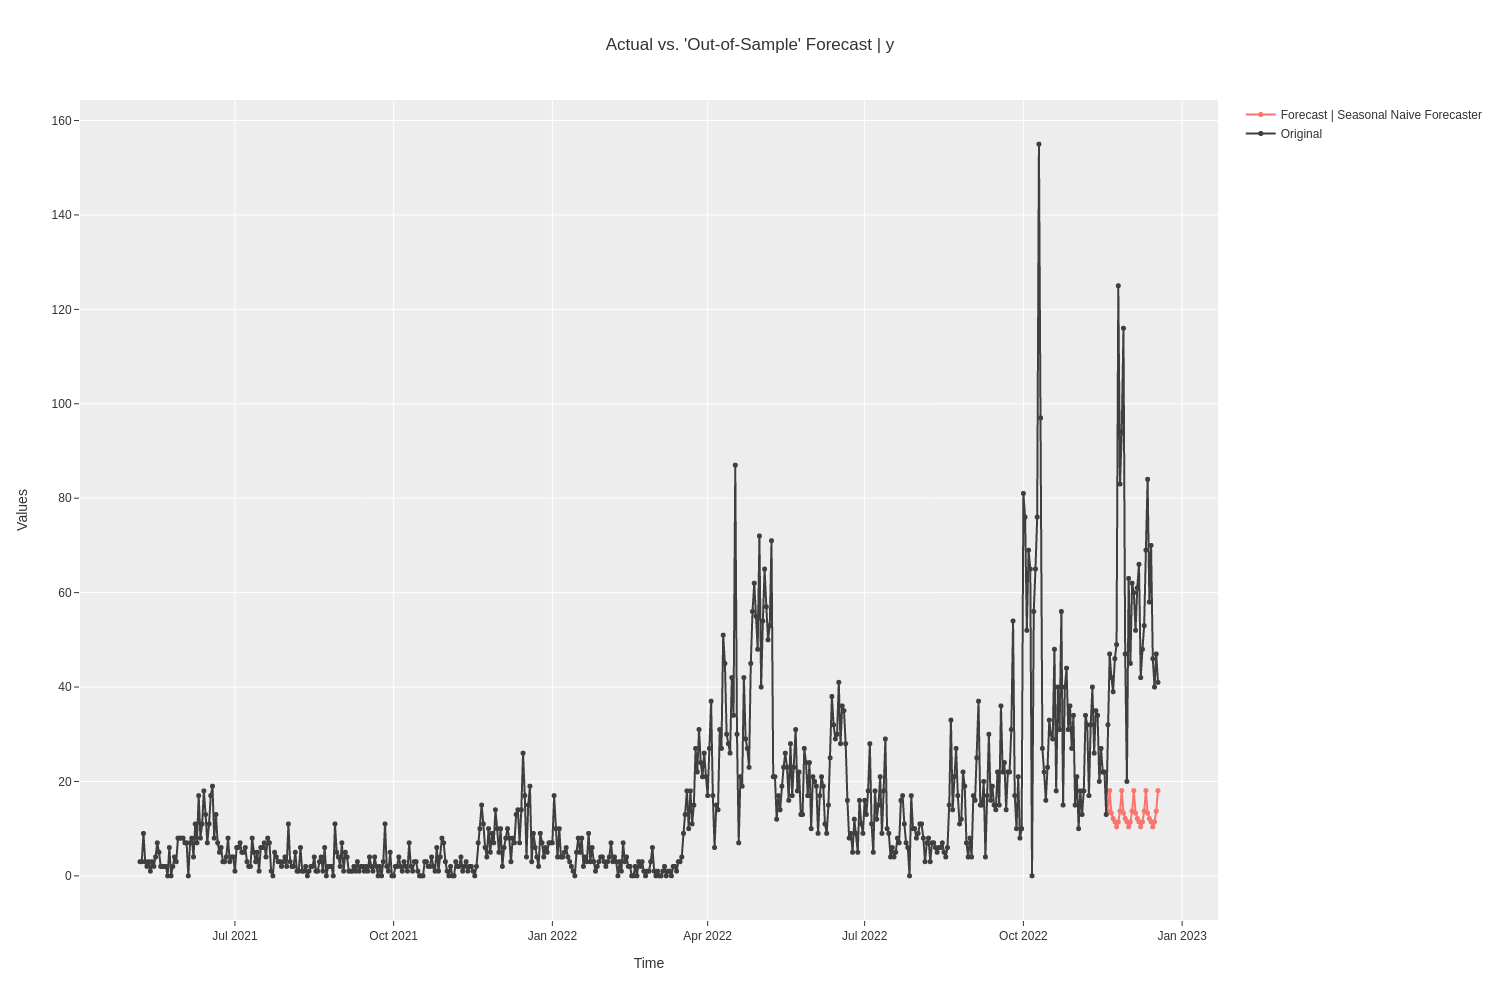

In [ ]:
bloom_exp.plot_model(naive7)

In [ ]:
top_alt = bloom_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model       MAE  \
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   11.0819   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   11.7543   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   11.8595   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   11.9013   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   12.3346   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   12.3346   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   12.3346   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   12.3413   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   12.3613   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   12.3916   
theta                                             Theta Forecaster   12.6402   
ets                                                            ETS    12.888   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   12.9182   
exp_smooth                                   Exponential Smoothing   13.0554   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   13.0978   
grand_means                                 Grand Means Forecaster   13.1959   
arima                                                        ARIMA   13.2825   
polytrend                              Polynomial Trend Forecaster   13.4254   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   14.0479   
croston                                                    Croston   14.2359   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   14.6568   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   14.7127   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   18.1915   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...  426.6105   

                     RMSE                 MAPE   SMAPE     MASE    RMSSE  \
lightgbm_cds_dt   14.9739    849246647807146.5  0.5159   1.7678   1.4127   
knn_cds_dt        15.5823   887220847177630.25  0.5353   1.8928    1.478   
et_cds_dt         15.6397   920790905058834.75  0.5433   1.9064   1.4811   
huber_cds_dt      15.6359   838650691666358.25  0.5648   1.9071   1.4796   
ridge_cds_dt      16.0792    933411880660333.0  0.5838   1.9811   1.5213   
lar_cds_dt        16.0792  933410864029055.625  0.5838   1.9811   1.5213   
lr_cds_dt         16.0792    933410864029055.0  0.5838   1.9811   1.5213   
br_cds_dt         16.0818  934308812856370.375  0.5841   1.9826   1.5218   
en_cds_dt         16.1083    936696304130284.5  0.5851    1.986   1.5244   
lasso_cds_dt      16.1369   941378582783082.75  0.5868   1.9909   1.5273   
theta             16.6733  939682085401220.875  0.5552   1.9994     1.55   
ets               16.9122  878695455675521.375  0.5614   2.0367   1.5711   
omp_cds_dt        16.6923   1091219079822871.5  0.6088   2.0741   1.5813   
exp_smooth        17.0662  878895209127657.375  0.5651   2.0596   1.5824   
llar_cds_dt        16.782   1183328417763750.0  0.6151   2.1041   1.5893   
grand_means       17.5612  608922072066541.875  0.6453   2.0482   1.6169   
arima             17.7045  708849618090170.125   0.611   2.1354   1.6681   
polytrend         17.0794  1256683065335055.25  0.6267   2.1528   1.6156   
rf_cds_dt         17.9789   883762143359832.25  0.6077   2.2513   1.6963   
croston           18.2707   899065627556978.75  0.6389   2.2459   1.6945   
ada_cds_dt        18.3269  1010126664507350.25  0.6545   2.3519   1.7272   
dt_cds_dt         19.2852   742125213688190.25  0.6251   2.3829   1.8294   
gbr_cds_dt        22.0749  876341583155215.875   0.662   2.9416   2.1067   
par_cds_dt       762.7231  1709305339109672.25  1.1489  69.3991  72.8101   

                         R2  TT (Sec)  
lightgbm_cds_dt     -0.5373     1.768  
knn_cds_dt          -1.1652     0.190  
et_cds_dt           -1.0792     1.554  

In [ ]:
arima = bloom_exp.create_model("arima")


cutoff      MAE     RMSE          MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-21  18.0348  20.1778  2.349900e+00  0.9048  3.1956  2.0465   
1     2022-07-21   4.8383   7.4152  1.190550e+15  0.5986  0.7969  0.7198   
2     2022-08-20   8.3537  10.0547  6.141000e-01  0.5123  1.3833  0.9907   
3     2022-09-19  24.4605  37.1810  2.353698e+15  0.6592  3.8992  3.6152   
4     2022-10-19  10.7251  13.6938  5.437000e-01  0.3803  1.4018  0.9682   
Mean         NaT  13.2825  17.7045  7.088496e+14  0.6110  2.1354  1.6681   
SD           NaT   7.0664  10.6389  9.428643e+14  0.1742  1.1942  1.0754   

          R2  
0    -8.8450  
1    -0.5260  
2    -0.5295  
3    -0.2957  
4    -0.6283  
Mean -2.1649  
SD    3.3418

In [ ]:
arima_holdout = bloom_exp.predict_model(arima)

Model      MAE     RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  ARIMA  34.1394  41.6935  0.5313  0.7671  4.3014  2.9335 -2.3647

In [ ]:
top_holdout = bloom_exp.predict_model(top_alt)

Model      MAE     RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  LGBMRegressor  32.5346  39.4172  0.5043  0.7051  4.0992  2.7733 -2.0073

In [ ]:
bloom_disc_exp = TSForecastingExperiment()
bloom_disc_exp.setup(
    data=ds_bloom, target=target, fh=30, fold=5, enforce_exogenous=True,
    numeric_imputation_target=0, numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                 (591, 2)
5              Train data shape                 (561, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     ca16

Determined adding .com discount or traffic acitivity has not enough lag correlation to mean anything to the dropship results, so not including any further in these experiments.

# DSW - Naive and AutoML Univariate 

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "naive", "snaive"]

In [ ]:
dsw_uni = ds_dsw.drop(columns=['disc'])
dsw_uni.describe()

y
count   252.000000
mean    234.607143
std     172.588682
min      23.000000
25%     150.750000
50%     188.000000
75%     256.000000
max    1426.000000

**Experiment for best model without exogenous variables.**

In [ ]:
dsw_exp = TSForecastingExperiment()
dsw_exp.setup(
    data=dsw_uni, target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                 (252, 1)
5              Train data shape                 (222, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                    False
12       Seasonalities Detected                      [1]
13          Primary Seasonality                        1
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     03b7

In [ ]:
naive7 = dsw_exp.create_model("naive", strategy="mean", sp=7)

cutoff       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-21   77.3318   85.1667  0.5725  0.4163  1.4498  1.1672 -3.7994
1     2022-07-21   60.9356   70.9313  0.6405  0.3722  1.2428  1.0676 -0.6765
2     2022-08-20   60.4803   75.1969  0.3557  0.3112  1.2148  1.0966  0.1606
3     2022-09-19   34.3607   46.6522  0.1727  0.1687  0.6681  0.6303  0.2743
4     2022-10-19  189.5693  287.8625  0.4291  0.5431  3.8186  4.0081 -0.4740
Mean         NaT   84.5355  113.1619  0.4341  0.3623  1.6788  1.5940 -0.9030
SD           NaT   54.2902   88.2636  0.1651  0.1231  1.1007  1.2217  1.4928

In [ ]:
naive7_holdout = dsw_exp.predict_model(naive7)

Model       MAE      RMSE    MAPE   SMAPE   MASE   RMSSE      R2
0  NaiveForecaster  205.2435  369.8728  0.4606  0.5041  3.182  3.2954 -0.1567

In [ ]:
dsw_exp.plot_model(naive7)

In [ ]:
top_alt = dsw_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
croston                                                    Croston   
theta                                             Theta Forecaster   
ets                                                            ETS   
exp_smooth                                   Exponential Smoothing   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
polytrend                              Polynomial Trend Forecaster   
arima                                                        ARIMA   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
grand_means                                 Grand Means Forecaster   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                                   MAE                   RMSE  \
croston                        75.2317               107.5754   
theta                          75.5984               109.5288   
ets                            75.8834               108.9581   
exp_smooth                      76.064                109.724   
ada_cds_dt                     76.5475               111.5273   
lightgbm_cds_dt                81.0258               116.3337   
lr_cds_dt                       86.605               123.2271   
ridge_cds_dt                    86.605               123.2271   
lar_cds_dt                      86.605               123.2271   
omp_cds_dt                      86.605               123.2271   
en_cds_dt                      86.6054               123.2274   
lasso_cds_dt                   86.6056               123.2276   
br_cds_dt                       86.639                123.255   
llar_cds_dt                    86.9935               123.5277   
polytrend                      87.6075               123.9866   
arima                          88.6013               117.7426   
gbr_cds_dt                     88.8098               124.0618   
grand_means                     89.275               118.2337   
knn_cds_dt                     91.0716               124.0535   
huber_cds_dt                   95.2722                130.551   
rf_cds_dt                       99.698               135.5484   
et_cds_dt                     106.1545               140.3505   
dt_cds_dt                     112.0822               149.1717   
par_cds_dt       1791123610046186752.0  7686067758445949952.0   

                               MAPE   SMAPE                 MASE  \
croston                      0.3279  0.3166               1.5006   
theta                        0.3055  0.3171               1.5098   
ets                          0.3146  0.3187               1.5152   
exp_smooth                   0.3103  0.3193                1.519   
ada_cds_dt                   0.3052  0.3257               1.5277   
lightgbm_cds_dt              0.3521  0.3481               1.6123   
lr_cds_dt                     0.332  0.3897               1.7279   
ridge_cds_dt                  0.332  0.3897               1.7279   
lar_cds_dt                    0.332  0.3897               1.7279   
omp_

In [ ]:
arima = dsw_exp.create_model("arima")


cutoff       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-21   75.3505   83.5118  0.5724  0.4122  1.4127  1.1445 -3.6147
1     2022-07-21   65.6807   75.1873  0.7108  0.3929  1.3396  1.1317 -0.8837
2     2022-08-20   66.4505   83.1833  0.3887  0.3424  1.3347  1.2130 -0.0272
3     2022-09-19   41.9503   54.6832  0.2111  0.2071  0.8157  0.7388  0.0029
4     2022-10-19  193.5746  292.1474  0.4383  0.5548  3.8993  4.0677 -0.5182
Mean         NaT   88.6013  117.7426  0.4643  0.3819  1.7604  1.6592 -1.0082
SD           NaT   53.6420   87.8300  0.1691  0.1123  1.0905  1.2158  1.3442

In [ ]:
arima_holdout = dsw_exp.predict_model(arima)

Model       MAE     RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  ARIMA  198.4042  370.953  0.4183  0.4751  3.0759  3.3051 -0.1634

In [ ]:
top_holdout = dsw_exp.predict_model(top_alt)

Model       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  Croston  220.2335  349.4572  0.6862  0.5748  3.4144  3.1136 -0.0325

Determined adding .com discount or traffic acitivity has not enough lag correlation to mean anything to the dropship results, so not including any further in these experiments.

# Nord - Naive and AutoML Univariate 

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "naive", "snaive"]

In [ ]:
nord_uni = ds_nord.drop(columns=['disc'])
nord_uni.describe()

y
count   497.000000
mean    173.448692
std     207.982586
min       0.000000
25%      36.000000
50%     112.000000
75%     214.000000
max    1803.000000

**Experiment for best model without exogenous variables.**

In [ ]:
dsw_exp = TSForecastingExperiment()
dsw_exp.setup(
    data=nord_uni, target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                 (497, 1)
5              Train data shape                 (467, 1)
6               Test data shape                  (30, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     e7eb

In [ ]:
naive7 = dsw_exp.create_model("naive", strategy="mean", sp=7)

cutoff       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-21  228.1134  313.9841  0.6063  0.8328  2.4361  1.5747 -0.7381
1     2022-07-21   79.1293  113.1935  0.3235  0.3930  0.7371  0.5233 -0.3940
2     2022-08-20   37.0019   44.0486  0.4735  0.3146  0.3379  0.2074 -0.9425
3     2022-09-19   88.1948  126.0147  0.3609  0.4235  0.8378  0.6138 -0.1284
4     2022-10-19   51.3838   75.0724  0.3650  0.3330  0.4987  0.3756 -0.0941
Mean         NaT   96.7646  134.4627  0.4258  0.4594  0.9695  0.6590 -0.4594
SD           NaT   68.2172   94.2906  0.1032  0.1908  0.7540  0.4782  0.3342

In [ ]:
naive7_holdout = dsw_exp.predict_model(naive7)

Model       MAE     RMSE    MAPE   SMAPE    MASE  \
0  Seasonal Naive Forecaster  486.6459  543.357  0.7427  1.1939  4.7729   

    RMSSE      R2  
0  2.7768 -3.7791

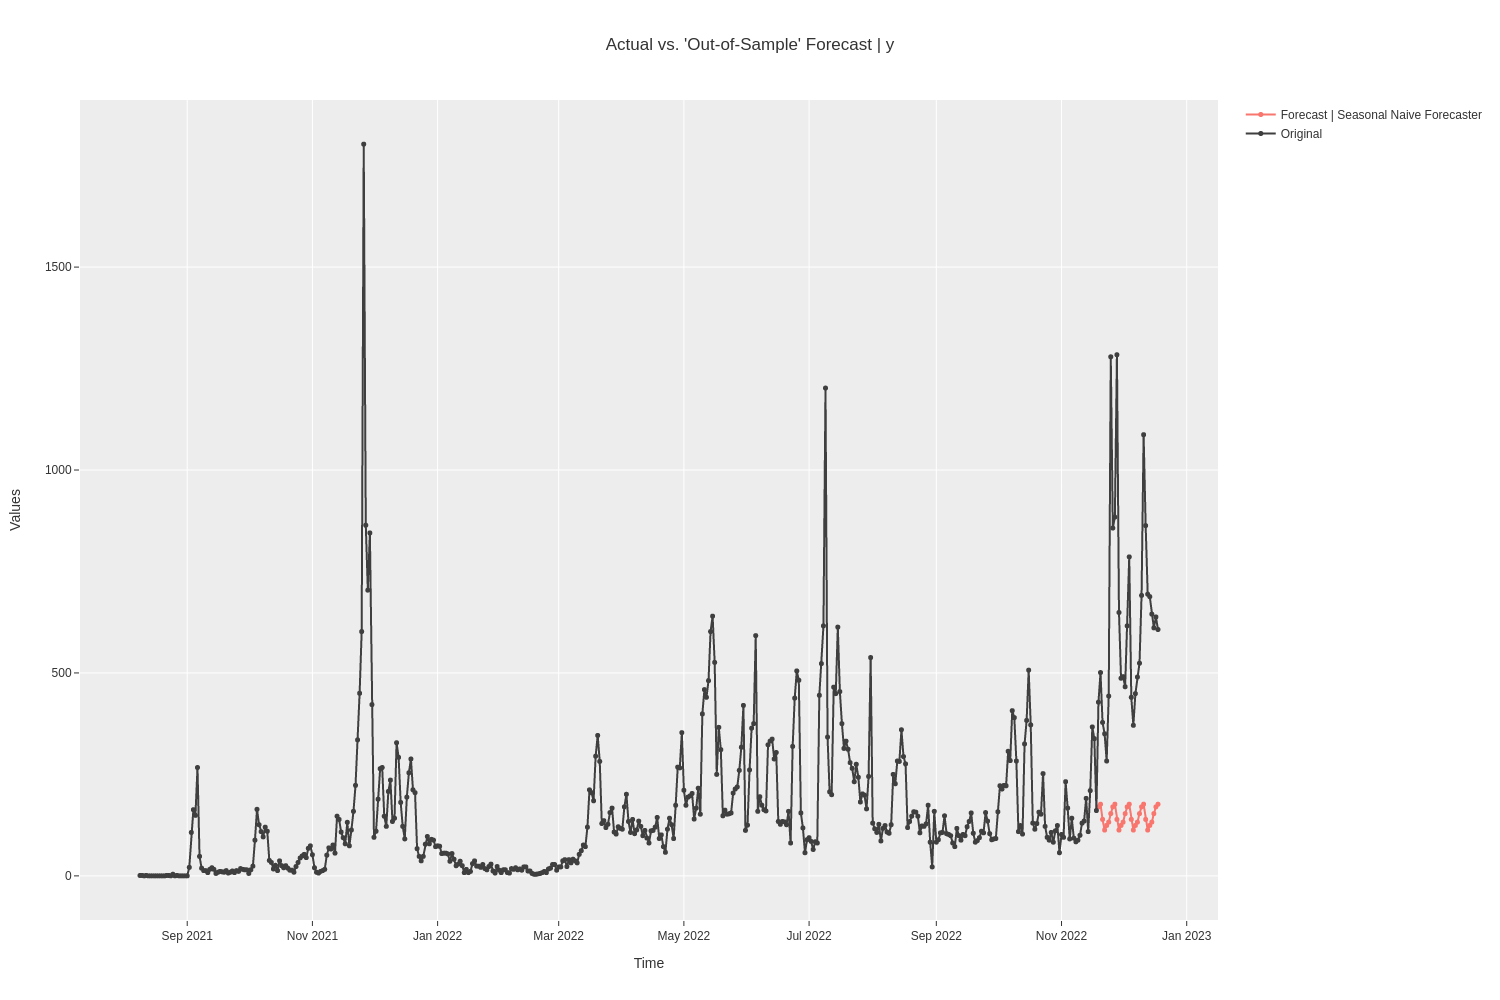

In [ ]:
dsw_exp.plot_model(naive7)

In [ ]:
top_alt = dsw_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
grand_means                                 Grand Means Forecaster   
exp_smooth                                   Exponential Smoothing   
theta                                             Theta Forecaster   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
ets                                                            ETS   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
croston                                                    Croston   
polytrend                              Polynomial Trend Forecaster   
arima                                                        ARIMA   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                             MAE              RMSE           MAPE   SMAPE  \
grand_means              98.8839          135.9623         0.4509  0.4744   
exp_smooth              102.6368          135.4907         0.5419  0.4736   
theta                    103.313          137.9675         0.5602  0.4845   
knn_cds_dt              104.2272          134.2046         0.6329  0.4983   
gbr_cds_dt              104.5782          136.0062         0.6788  0.4749   
et_cds_dt                105.284          132.5559         0.7371  0.4957   
huber_cds_dt            111.4314          137.4074         0.7265  0.5344   
ets                     111.8711          146.7597         0.6407  0.5182   
lightgbm_cds_dt         121.9773          153.0403         0.8304  0.5734   
ridge_cds_dt            127.4207          151.0784         0.9524  0.5948   
lar_cds_dt              127.4207          151.0784         0.9524  0.5948   
lr_cds_dt               127.4207          151.0784         0.9524  0.5948   
en_cds_dt               127.4221          151.0793         0.9524  0.5948   
lasso_cds_dt            127.4237          151.0804         0.9524  0.5948   
br_cds_dt               127.6074          151.1972         0.9538  0.5957   
omp_cds_dt              129.6291          152.9226         0.9765  0.6047   
llar_cds_dt              132.095          154.8367         0.9996  0.6154   
rf_cds_dt               133.5603          162.3073         0.9872  0.5948   
croston                 133.5824          162.3693         0.8985  0.6115   
polytrend               136.9123          159.6583         1.0595  0.6363   
arima                   154.9389          198.8985         0.9773  0.6472   
dt_cds_dt               156.8507          214.0869         0.9344  0.5977   
ada_cds_dt              177.8715          201.4577         1.4875  0.7386   
par_cds_dt       6885071019.5109  22423383394.2803  49141672.9558   1.413   

                          MASE           RMSSE                    R2  TT (Sec)  
grand_means             0.9897          0.6661               -0.4649     0.076  
exp_smooth              1.0185          0.6617               -0.4819     0.256  
theta                   1.0264          0.6741               -0.6798     0.116  
knn_cds_dt              1.0324          0.6565              

In [ ]:
arima = dsw_exp.create_model("arima")


cutoff       MAE      RMSE    MAPE   SMAPE    MASE   RMSSE       R2
0     2022-06-21  230.5598  318.3703  0.6952  0.8463  2.4622  1.5967  -0.7870
1     2022-07-21  176.0130  203.3686  1.2100  0.6474  1.6396  0.9402  -3.4996
2     2022-08-20   95.2176  120.5666  1.1821  0.5509  0.8696  0.5676 -13.5528
3     2022-09-19   90.9717  135.0668  0.3317  0.4358  0.8642  0.6579  -0.2963
4     2022-10-19  181.9326  217.1201  1.4675  0.7555  1.7657  1.0864  -8.1516
Mean         NaT  154.9389  198.8985  0.9773  0.6472  1.5203  0.9698  -5.2575
SD           NaT   53.9439   70.4782  0.4081  0.1451  0.6026  0.3651   4.9975

In [ ]:
arima_holdout = dsw_exp.predict_model(arima)

Model       MAE     RMSE    MAPE  SMAPE    MASE   RMSSE      R2
0  ARIMA  409.5235  496.919  0.5905  0.896  4.0165  2.5394 -2.9971

In [ ]:
top_holdout = dsw_exp.predict_model(top_alt)

Model       MAE      RMSE    MAPE   SMAPE    MASE  RMSSE  \
0  Grand Means Forecaster  488.7181  548.2904  0.7403  1.1914  4.7932  2.802   

       R2  
0 -3.8662

Determined adding .com discount or traffic acitivity has not enough lag correlation to mean anything to the dropship results, so not including any further in these experiments.

# ECOM Model - Including Exogenous Variables

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "naive", "snaive", "lar_cds_dt", "et_cds_dt"]
target='y'

**Traffic and Discount**

In [ ]:
traff_auto = TSForecastingExperiment()
traff_auto.setup(
    data=ecom_disc_traff, target=target, fh=30, fold=5, enforce_exogenous=True,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 3)
5              Train data shape                (1792, 3)
6               Test data shape                  (30, 3)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     4c76

In [ ]:
best_traffic = traff_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
arima                                                        ARIMA   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                        MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
arima             2284.5632   2940.4049  0.7613  0.5822  0.5341  0.3922   
lr_cds_dt          3883.068   5362.3128  0.9086  0.5724  0.9114   0.719   
lasso_cds_dt       3938.248   5410.2177  0.9255  0.5804  0.9243  0.7254   
ridge_cds_dt      4014.4315   5473.7758  0.9508  0.5911  0.9421  0.7339   
llar_cds_dt       4038.2641   5466.6981   0.959  0.5936  0.9477  0.7329   
dt_cds_dt         4738.8058   6885.8501   1.109   0.646  1.1115  0.9211   
lightgbm_cds_dt   4773.3716   6325.1754  1.1665  0.6692  1.1198  0.8473   
omp_cds_dt        4890.1548   6357.7157  1.2549  0.6961   1.147  0.8518   
huber_cds_dt       5215.822   6856.2341  1.3584  0.7293  1.2228  0.9182   
en_cds_dt         5370.7694   6931.8882  1.4528  0.7551  1.2589  0.9281   
br_cds_dt         5397.3057   6956.7371  1.4662  0.7581  1.2651  0.9314   
gbr_cds_dt        5879.8659    7533.501  1.8006  0.7113  1.3767  1.0063   
knn_cds_dt        6201.9814   8131.1341  1.6993  0.8054   1.453  1.0875   
rf_cds_dt         8947.8155  10619.5393  3.1267  0.9369   2.094  1.4181   
ada_cds_dt        10269.555  11309.8258  3.3695   1.096  2.4026  1.5092   
par_cds_dt       24992.4658  44525.7373   7.977  1.1645  5.8506  5.9408   

                       R2  TT (Sec)  
arima             -0.7064     1.042  
lr_cds_dt         -0.3412     0.860  
lasso_cds_dt      -0.3761     0.492  
ridge_cds_dt      -0.4327     0.456  
llar_cds_dt       -0.4297     0.494  
dt_cds_dt         -3.5804     0.648  
lightgbm_cds_dt   -1.2101     0.852  
omp_cds_dt        -1.3489     0.836  
huber_cds_dt      -2.1784     0.832  
en_cds_dt          -2.397     0.764  
br_cds_dt         -2.4542     0.592  
gbr_cds_dt        -7.3382     2.262  
knn_cds_dt        -4.9383     1.156  
rf_cds_dt        -14.7697     3.996  
ada_cds_dt       -17.6951     0.846  
par_cds_dt      -377.1862     0.782

In [ ]:
arima = traff_auto.create_model("arima")

cutoff        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-30  3930.1158  4572.9346  2.4314  1.5762  0.9095  0.6023 -5.9852
1     2022-07-30   888.8100  1058.6319  0.2767  0.2345  0.2072  0.1404  0.8102
2     2022-08-29  1651.7325  2421.3705  0.3953  0.4583  0.3872  0.3233  0.6115
3     2022-09-28  1409.9269  1738.7763  0.4074  0.3757  0.3306  0.2329  0.1411
4     2022-10-28  3542.2307  4910.3109  0.2956  0.2664  0.8359  0.6622  0.8906
Mean         NaT  2284.5632  2940.4049  0.7613  0.5822  0.5341  0.3922 -0.7064
SD           NaT  1216.8123  1536.2331  0.8367  0.5033  0.2835  0.2052  2.6522

In [ ]:
arima_holdout = traff_auto.predict_model(arima)

Model        MAE       RMSE    MAPE   SMAPE   MASE   RMSSE      R2
0  ARIMA  6101.4958  8080.7627  3.5687  0.6135  1.359  1.0082  0.5851

In [ ]:
top_alt = traff_auto.create_model("lr_cds_dt")

cutoff         MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-30   2467.5836   2720.0484  1.5180  0.7442  0.5711  0.3583   
1     2022-07-30   2127.5923   2329.6877  0.7567  0.5198  0.4959  0.3091   
2     2022-08-29   3007.2600   3829.2321  1.0737  0.6084  0.7049  0.5113   
3     2022-09-28   1762.3800   2055.3345  0.6087  0.4073  0.4133  0.2752   
4     2022-10-28  10050.5242  15877.2614  0.5861  0.5823  2.3717  2.1412   
Mean         NaT   3883.0680   5362.3128  0.9086  0.5724  0.9114  0.7190   
SD           NaT   3110.8572   5292.0499  0.3509  0.1104  0.7364  0.7157   

          R2  
0    -1.4714  
1     0.0806  
2     0.0283  
3    -0.2001  
4    -0.1434  
Mean -0.3412  
SD    0.5746

In [ ]:
top_holdout = traff_auto.predict_model(top_alt)

Model        MAE        RMSE   MAPE   SMAPE    MASE   RMSSE  \
0  LinearRegression  8254.6623  12811.9309  2.719  0.5862  1.8386  1.5985   

      R2  
0 -0.043

# ECOM Wmn Espadrille - Including Exogenous Variables

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "lar_cds_dt", "et_cds_dt"]
target='y'

In [ ]:
ecom_wmn_dict['WOMEN_ESPADRILLE'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Freq: D
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        1822 non-null   float64
 1   traffic  1822 non-null   float64
dtypes: float64(2)
memory usage: 42.7 KB


**Traffic and Discount**

In [ ]:
traff_exp = TSForecastingExperiment()
traff_exp.setup(
    data=ecom_wmn_dict['WOMEN_ESPADRILLE'], target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 2)
5              Train data shape                (1792, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     870c

In [ ]:
naive7 = traff_exp.create_model("naive", strategy="mean", sp=7)

cutoff        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-30  1690.2829  1805.2489  2.4808  0.9588  0.8771  0.5258 -1.0732
1     2022-07-30  1388.8601  1531.1066  1.6155  0.7927  0.7223  0.4482 -4.4547
2     2022-08-29  1778.7639  2104.1714  1.5906  0.8110  0.9345  0.6209 -0.0904
3     2022-09-28  1159.2711  1283.5047  1.2066  0.6304  0.6075  0.3791 -3.7442
4     2022-10-28  5476.5054  9584.0989  0.8070  0.8324  2.8962  2.8526 -0.2325
Mean         NaT  2298.7367  3261.6261  1.5401  0.8051  1.2075  0.9653 -1.9190
SD           NaT  1604.0610  3173.0761  0.5553  0.1049  0.8522  0.9471  1.8256

In [ ]:
holdout_naive = traff_exp.predict_model(naive7)

Model        MAE       RMSE    MAPE   SMAPE    MASE  \
0  Seasonal Naive Forecaster  3026.3398  5162.1259  2.2701  0.7269  1.5062   

    RMSSE      R2  
0  1.3793 -0.1251

In [ ]:
top_alt = traff_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
arima                                                        ARIMA   
croston                                                    Croston   
naive                                             Naive Forecaster   
theta                                             Theta Forecaster   
exp_smooth                                   Exponential Smoothing   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
ets                                                            ETS   
snaive                                   Seasonal Naive Forecaster   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
grand_means                                 Grand Means Forecaster   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
polytrend                              Polynomial Trend Forecaster   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                         MAE         RMSE      MAPE   SMAPE      MASE  \
arima              1424.1328    2014.1154    0.7643  0.6654    0.7485   
croston            1874.7349     3050.962    0.8748  0.6188    0.9859   
naive              1903.6533    3121.1822      0.89   0.608     1.001   
theta              1930.2001    3161.6071    0.9261  0.6096    1.0147   
exp_smooth         1993.2605     3138.187      1.13  0.6419    1.0475   
huber_cds_dt       2010.9492    3107.5769    1.1471  0.6903     1.057   
ets                2027.8831    3153.7099    1.1615  0.6672    1.0657   
snaive               2205.96    3559.0349    1.1118   0.698    1.1586   
lightgbm_cds_dt    2236.7486    3317.9288    1.4159  0.7454    1.1756   
lr_cds_dt          2258.1712    3194.7504    1.5377  0.7825    1.1864   
ridge_cds_dt       2260.0457     3191.838      1.55  0.7854    1.1873   
lasso_cds_dt       2260.6663    3188.0346    1.5448  0.7847    1.1877   
grand_means        2291.6734    3252.7217    1.5319  0.8051    1.2037   
llar_cds_dt        2322.4354     3247.964    1.6304  0.8048    1.2199   
en_cds_dt           2516.201    3464.2176    1.8404  0.8577    1.3209   
br_cds_dt          2521.5132    3470.9329    1.8461  0.8589    1.3237   
omp_cds_dt         2526.1751    3474.7788    1.8548  0.8597    1.3261   
polytrend          2593.4824    3505.5603     1.923  0.8856    1.3612   
gbr_cds_dt         2693.9101    3696.7176    2.1942  0.8097    1.4144   
rf_cds_dt          2780.0465    3626.4166    2.1668   0.887    1.4597   
knn_cds_dt         2977.3557    3938.7127    2.4545  0.9215    1.5619   
dt_cds_dt          3550.7624    5998.8645    3.0668  0.8113    1.8609   
ada_cds_dt         3779.8881    4394.5036    3.2839   1.079    1.9825   
par_cds_dt       316580.6811  738857.7559  135.1218   1.737  167.1495   

                    RMSSE          R2  TT (Sec)  
arima              0.5959     -0.4097     0.900  
croston            0.9039     -0.3254     0.324  
naive              0.9244     -0.4811     0.192  
theta              0.9362     -0.5597     0.394  
exp_smooth          0.929     -0.6251     0.790  
huber_cds_dt       0.9203     -0.7437     0.890  
ets                0.9337     -0.6238     0.578  
snaive             1.0526     -2.4734     0.202  
lightgbm_cds_dt     0.982     -2.2

In [ ]:
arima = traff_exp.create_model("arima")

cutoff        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-30  1247.3428  1566.6720  1.3064  1.5010  0.6473  0.4563 -0.5614
1     2022-07-30   564.7509   820.0156  0.4908  0.3514  0.2937  0.2401 -0.5646
2     2022-08-29   475.6812   635.9521  0.3257  0.2913  0.2499  0.1877  0.9004
3     2022-09-28   885.2199  1077.6413  0.6940  0.5319  0.4639  0.3183 -2.3444
4     2022-10-28  3947.6691  5970.2961  1.0046  0.6516  2.0877  1.7770  0.5217
Mean         NaT  1424.1328  2014.1154  0.7643  0.6654  0.7485  0.5959 -0.4097
SD           NaT  1290.5824  2002.6864  0.3532  0.4370  0.6841  0.5975  1.1291

In [ ]:
arima_holdout = traff_exp.predict_model(arima)

Model        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  ARIMA  5888.8674  6936.4109  4.7015  1.4379  2.9309  1.8534 -1.0314

In [ ]:
top_alt = traff_exp.create_model("croston")

cutoff        MAE        RMSE    MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-30  1520.9347   1617.6556  2.1532  0.9202  0.7893  0.4711   
1     2022-07-30   626.6692    692.8720  0.6094  0.4805  0.3259  0.2028   
2     2022-08-29  1282.4664   2204.6371  0.5573  0.5919  0.6737  0.6506   
3     2022-09-28   564.3049    668.5749  0.5993  0.3956  0.2957  0.1975   
4     2022-10-28  5379.2992  10071.0704  0.4546  0.7059  2.8448  2.9976   
Mean         NaT  1874.7349   3050.9620  0.8748  0.6188  0.9859  0.9039   
SD           NaT  1790.6883   3557.7777  0.6416  0.1833  0.9491  1.0607   

          R2  
0    -0.6647  
1    -0.1170  
2    -0.1970  
3    -0.2873  
4    -0.3610  
Mean -0.3254  
SD    0.1886

In [ ]:
top_holdout = traff_exp.predict_model(top_alt)

Model        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE     R2
0  Croston  5486.9277  5844.1359  7.6681  1.0229  2.7309  1.5616 -0.442

# ECOM Wmn Boot - Including Exogenous Variables

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "lar_cds_dt", "et_cds_dt"]
target='y'

In [ ]:
ecom_wmn_dict['WOMEN_BOOT'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Freq: D
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        1822 non-null   float64
 1   traffic  1822 non-null   float64
dtypes: float64(2)
memory usage: 42.7 KB


**Traffic and Discount**

In [ ]:
traff_exp = TSForecastingExperiment()
traff_exp.setup(
    data=ecom_wmn_dict['WOMEN_BOOT'], target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 2)
5              Train data shape                (1792, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     6834

In [ ]:
naive7 = traff_exp.create_model("naive", strategy="mean", sp=7)

cutoff        MAE       RMSE     MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-30   459.8283   464.7718  35.6317  1.7788  1.1870  0.5816   
1     2022-07-30   539.2596   698.8302   3.1603  1.0852  1.4141  0.8824   
2     2022-08-29   313.6007   491.6754   0.4076  0.4354  0.8067  0.6152   
3     2022-09-28   630.2705  1006.1132   0.3918  0.5673  1.6233  1.2654   
4     2022-10-28  1590.0322  1973.8577   0.6844  1.0843  4.0055  2.4574   
Mean         NaT   706.5983   927.0497   8.0552  0.9902  1.8073  1.1604   
SD           NaT   453.7899   558.1028  13.8273  0.4746  1.1320  0.6932   

            R2  
0    -154.2301  
1      -0.0150  
2      -0.1422  
3      -0.5771  
4      -1.7803  
Mean  -31.3489  
SD     61.4437

In [ ]:
holdout_naive = traff_exp.predict_model(naive7)

Model        MAE       RMSE    MAPE   SMAPE    MASE  \
0  Seasonal Naive Forecaster  1197.0703  1570.9702  1.3165  1.0145  2.9368   

    RMSSE      R2  
0  1.9321 -1.0116

In [ ]:
top_alt = traff_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model  \
arima                                                        ARIMA   
croston                                                    Croston   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
theta                                             Theta Forecaster   
snaive                                   Seasonal Naive Forecaster   
ets                                                            ETS   
exp_smooth                                   Exponential Smoothing   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
naive                                             Naive Forecaster   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
polytrend                              Polynomial Trend Forecaster   
grand_means                                 Grand Means Forecaster   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   

                         MAE         RMSE       MAPE   SMAPE       MASE  \
arima               543.4541     767.2666     4.0095   0.871     1.3916   
croston             555.6815     805.8922     1.6343  0.8799     1.4213   
lr_cds_dt           562.7869     820.5272     5.3089  0.8108     1.4394   
ridge_cds_dt        566.5145     823.3166     5.4691  0.8096     1.4489   
gbr_cds_dt          574.5806     822.8516     7.9873  0.7881     1.4721   
lightgbm_cds_dt     578.9107     772.6808     7.0121  0.8556     1.4832   
lasso_cds_dt         601.318     846.0978     6.5925  0.8488     1.5377   
knn_cds_dt           602.655     882.9907     7.6275  0.8013     1.5431   
rf_cds_dt           636.2103     819.2821     8.1593  0.8413      1.632   
en_cds_dt           639.7673     869.8939      7.738  0.8914     1.6359   
br_cds_dt           641.4369     870.9302     7.7873  0.8931     1.6402   
theta                644.552     911.8139     2.6755  0.9973     1.6471   
snaive              648.1867     886.7592     2.2126  1.0064     1.6571   
ets                 658.5212     912.6718     3.6559  1.0662     1.6832   
exp_smooth          658.5801      911.179     3.7679  1.0673     1.6835   
llar_cds_dt         661.3283     881.4279     8.9017  0.9146      1.692   
naive                  676.6     936.9861     2.4501  1.0668     1.7293   
omp_cds_dt          688.5546     897.7265      9.941   0.941     1.7626   
huber_cds_dt        708.8913     958.9924     4.3714  1.0277     1.8098   
polytrend           709.0576     917.3351    10.3458  0.9607     1.8161   
grand_means         713.5429     933.7494     7.9828  1.0011     1.8251   
dt_cds_dt           767.5936    1079.5158     3.5268  0.9583     1.9689   
ada_cds_dt         1130.9993      1239.05    27.0046  1.0686     2.9135   
par_cds_dt       558361.6435  1227636.482  9219.7639  1.6748  1458.4199   

                    RMSSE             R2  TT (Sec)  
arima              0.9609       -12.4278     0.678  
croston            1.0093        -0.9681     0.354  
lr_cds_dt          1.0274       -13.4468     0.544  
ridge_cds_dt       1.0308       -14.3238     0.470  
gbr_cds_dt         1.0306       -45.3217     1.994  
lightgbm_cds_dt    0.9676       -22.7593     1.160  
lasso_cds_dt       1.0592       -21.2588     0.448  
knn_cds_dt

In [ ]:
arima = traff_exp.create_model("arima")

cutoff        MAE       RMSE     MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-30   232.8242   294.1055  17.8199  1.7712  0.6010  0.3680   
1     2022-07-30   410.8279   715.4557   0.6134  0.8779  1.0773  0.9033   
2     2022-08-29   382.0038   519.8550   0.4993  0.6335  0.9826  0.6504   
3     2022-09-28   633.6774   848.6529   0.6835  0.5051  1.6320  1.0674   
4     2022-10-28  1057.9374  1458.2639   0.4313  0.5673  2.6651  1.8155   
Mean         NaT   543.4541   767.2666   4.0095  0.8710  1.3916  0.9609   
SD           NaT   287.3952   392.9069   6.9058  0.4675  0.7170  0.4884   

           R2  
0    -61.1588  
1     -0.0639  
2     -0.2768  
3     -0.1221  
4     -0.5175  
Mean -12.4278  
SD    24.3660

In [ ]:
arima_holdout = traff_exp.predict_model(arima)

Model        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  ARIMA  2040.5409  2459.4086  7.6528  0.8109  5.0061  3.0247 -3.9303

In [ ]:
top_alt = traff_exp.create_model("croston")

cutoff        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2022-06-30    68.3407    72.5525  5.9151  1.2558  0.1764  0.0908 -2.7827
1     2022-07-30   511.0211   861.5530  0.8149  1.4371  1.3400  1.0878 -0.5428
2     2022-08-29   347.8400   515.0979  0.4826  0.5018  0.8948  0.6445 -0.2536
3     2022-09-28   561.4660   846.5866  0.4559  0.4743  1.4460  1.0648 -0.1166
4     2022-10-28  1289.7395  1733.6713  0.5032  0.7305  3.2490  2.1584 -1.1448
Mean         NaT   555.6815   805.8922  1.6343  0.8799  1.4213  1.0093 -0.9681
SD           NaT   405.3562   545.5047  2.1443  0.3954  1.0173  0.6792  0.9737

In [ ]:
top_holdout = traff_exp.predict_model(top_alt)

Model        MAE       RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  Croston  1317.9005  1555.6488  5.8688  0.6969  3.2332  1.9132 -0.9726

# ECOM Wmn Sandal - Including Exogenous Variables

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet", "lar_cds_dt", "et_cds_dt"]
target='y'

In [ ]:
ecom_wmn_dict['WOMEN_SANDAL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2018-01-01 to 2022-12-27
Freq: D
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        1822 non-null   float64
 1   traffic  1822 non-null   float64
dtypes: float64(2)
memory usage: 42.7 KB


**Traffic and Discount**

In [ ]:
traff_exp = TSForecastingExperiment()
traff_exp.setup(
    data=ecom_wmn_dict['WOMEN_SANDAL'], target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1822, 2)
5              Train data shape                (1792, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                    False
15           Target White Noise                       No
16                Recommended d                        0
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     19a2

In [ ]:
naive7 = traff_exp.create_model("naive", strategy="mean", sp=7)

cutoff        MAE       RMSE     MAPE   SMAPE    MASE   RMSSE  \
0     2022-06-30   328.0841   349.1232   1.8910  0.8739  0.7437  0.3690   
1     2022-07-30   347.1025   371.9106   1.7291  0.7267  0.7909  0.3952   
2     2022-08-29   483.4349   495.8882  10.8348  1.4818  1.0998  0.5301   
3     2022-09-28   517.3983   518.4720  23.3475  1.7805  1.1838  0.5577   
4     2022-10-28  1074.6778  1580.8504   9.5279  1.5612  2.4984  1.7153   
Mean         NaT   550.1395   663.2489   9.4661  1.2848  1.2633  0.7134   
SD           NaT   272.4682   463.5764   7.8970  0.4102  0.6406  0.5062   

            R2  
0      -6.5904  
1      -0.0147  
2      -1.2900  
3    -377.3993  
4      -0.0475  
Mean  -77.0684  
SD    150.1850

In [ ]:
holdout_naive = traff_exp.predict_model(naive7)

Model       MAE       RMSE     MAPE   SMAPE    MASE  \
0  Seasonal Naive Forecaster  864.0189  1443.2306  12.0459  1.5496  1.9159   

    RMSSE      R2  
0  1.4891  0.0026

In [ ]:
top_alt = traff_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model        MAE  \
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   361.3445   
naive                                             Naive Forecaster   361.5667   
theta                                             Theta Forecaster   377.3856   
arima                                                        ARIMA   382.8587   
exp_smooth                                   Exponential Smoothing   385.3861   
ets                                                            ETS   389.0171   
croston                                                    Croston   488.8665   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   531.2473   
snaive                                   Seasonal Naive Forecaster   532.1667   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending     541.32   
grand_means                                 Grand Means Forecaster    549.291   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   553.8568   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending    554.723   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   564.9896   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   571.1897   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   575.2755   
polytrend                              Polynomial Trend Forecaster   589.5105   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   592.0653   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   593.5532   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   629.4311   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   644.9461   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   689.7189   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending  1791.1742   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   6547.877   

                      RMSE      MAPE   SMAPE     MASE    RMSSE         R2  \
huber_cds_dt      584.4786    2.5863  0.9816   0.8307   0.6294    -5.9748   
naive             603.4356    1.1139  0.8309   0.8308   0.6492    -2.2299   
theta             618.6264    1.2282  0.8552   0.8666   0.6652    -3.0791   
arima              507.638    3.2219    1.12   0.8779   0.5435   -13.0485   
exp_smooth        620.9071    1.6223  0.9058   0.8847   0.6676    -3.4999   
ets               624.4506    1.6636  0.9212    0.893   0.6714    -3.7167   
croston           701.4382    2.9442  1.0993   1.1197   0.7529   -10.1682   
dt_cds_dt         807.9869    3.1781  1.0875   1.2165   0.8661   -19.5849   
snaive            811.6513    2.1199   0.975   1.2176   0.8693   -25.1001   
knn_cds_dt        783.0116    2.4628  1.0399   1.2384    0.839   -20.4939   
grand_means        662.159    9.4862   1.284   1.2614   0.7123   -76.9129   
br_cds_dt         699.0605    7.7941  1.3114   1.2708   0.7514   -51.0655   
en_cds_dt         701.7356    7.8038  1.3114   1.2727   0.7543   -52.1991   
lasso_cds_dt      741.8142    7.9466  1.2542   1.2942   0.7967   -70.0984   
llar_cds_dt       703.3852    8.7631  1.3198   1.3107   0.7561   -64.7223   
omp_cds_dt        698.8886    9.5533  1.3081   1.3202   0.7514   -78.5604   
polytrend         700.6457   10.3794   1.312    1.353   0.7533   -91.7939   
ridge_cds_dt      774.6355    8.5923    1.31   1.3558   0.8316   -81.7389   
lr_cds_dt         775.6682    8.6331  1.3101   1.3592   0.8327   -82.2761   
lightgbm_cds_dt   825.5083    5.2368  1.2368   1.4427    0.885   -18.4592   
gbr_cds_dt        860.4309    4.1674  1.1267   1.4772   0.9213   -34.4085   
rf_cds_dt         957.5406    9.6343  1.2005   1.5778   1.0264  -179.9756   
ada_cds_dt       1882.5448   35.8368  1.5997   4.0979   2.0154 -1022.5313   
par_cds_dt        11890.18  146.5319  1.4577  14.9165  12.7165 -5862.9413   

                 TT (Sec)  
huber_cds_dt        0.830  
naive               0.190  
theta               0.314

In [ ]:
arima = traff_exp.create_model("arima")

cutoff       MAE       RMSE    MAPE   SMAPE    MASE   RMSSE       R2
0     2022-06-30  657.1608   878.0502  3.1709  1.3608  1.4897  0.9279 -47.0114
1     2022-07-30  277.8716   344.2124  0.9064  0.6395  0.6331  0.3658   0.1308
2     2022-08-29  123.4054   165.7653  1.9652  0.9186  0.2808  0.1772   0.7441
3     2022-09-28   97.3046   121.1546  4.3539  1.3954  0.2226  0.1303 -19.6623
4     2022-10-28  758.5508  1029.0075  5.7131  1.2858  1.7634  1.1165   0.5562
Mean         NaT  382.8587   507.6380  3.2219  1.1200  0.8779  0.5435 -13.0485
SD           NaT  274.3230   374.6960  1.6989  0.2942  0.6331  0.4031  18.6882

In [ ]:
arima_holdout = traff_exp.predict_model(arima)

Model       MAE       RMSE     MAPE   SMAPE    MASE   RMSSE      R2
0  ARIMA  846.8646  1318.5045  10.5964  1.5495  1.8778  1.3605  0.1675

In [ ]:
top_holdout = traff_exp.predict_model(top_alt)

Model       MAE       RMSE    MAPE   SMAPE    MASE  RMSSE      R2
0  HuberRegressor  579.6968  1507.0455  2.1518  1.0971  1.2854  1.555 -0.0876

# Superstore - Naive and AutoML Univariate 

In the following sections, I check the performance of a naive forecast, and then run an AutoML experiment with PyCaret to quickly assess what sorts of algorithms and data preparations might be most helpful for tackling this problem.

In [ ]:
#Use smape for basis of model performance comparison
metric='mae'
# Exclude slower models, prophet due to previous experiments, and the naive forecast since we just checked that above.
exclude = ["auto_arima", "bats", "prophet"]

In [ ]:
nord_uni = ds_nord.drop(columns=['disc'])
nord_uni.describe()

y
count   497.000000
mean    173.448692
std     207.982586
min       0.000000
25%      36.000000
50%     112.000000
75%     214.000000
max    1803.000000

**Experiment for best model without exogenous variables.**

In [ ]:
dsw_exp = TSForecastingExperiment()
dsw_exp.setup(
    data=superstore_grp, target=target, fh=30, fold=5, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs={"renderer": "png", "width": 1500, "height": 1000}, session_id=42
)

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables                  Present
4                    Data shape                (1458, 2)
5              Train data shape                (1428, 2)
6               Test data shape                  (30, 2)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        5
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                     True
12       Seasonalities Detected                      [7]
13          Primary Seasonality                        7
14     Target Strictly Positive                     True
15           Target White Noise                       No
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     c72c

In [ ]:
naive7 = dsw_exp.create_model("naive", strategy="mean", sp=7)

cutoff      MAE     RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2017-07-03  15.6932  20.9961  1.4504  0.5918  0.7158  0.4681  0.0477
1     2017-08-02  18.8671  24.3845  1.0035  0.6082  0.8534  0.5460 -0.0721
2     2017-09-01  41.8806  71.7090  0.5499  0.6806  1.8798  1.6119 -0.3526
3     2017-10-01  20.1027  26.5267  1.6018  0.6754  0.8784  0.5764  0.1105
4     2017-10-31  34.8057  40.8186  0.5971  0.7222  1.5195  0.8925 -0.9841
Mean         NaT  26.2699  36.8870  1.0405  0.6557  1.1694  0.8190 -0.2501
SD           NaT  10.2103  18.6772  0.4294  0.0485  0.4511  0.4221  0.3999

In [ ]:
naive7_holdout = dsw_exp.predict_model(naive7)

Model     MAE     RMSE    MAPE   SMAPE    MASE   RMSSE  \
0  Seasonal Naive Forecaster  34.648  46.1282  1.0982  0.6997  1.5128  1.0148   

       R2  
0 -0.4012

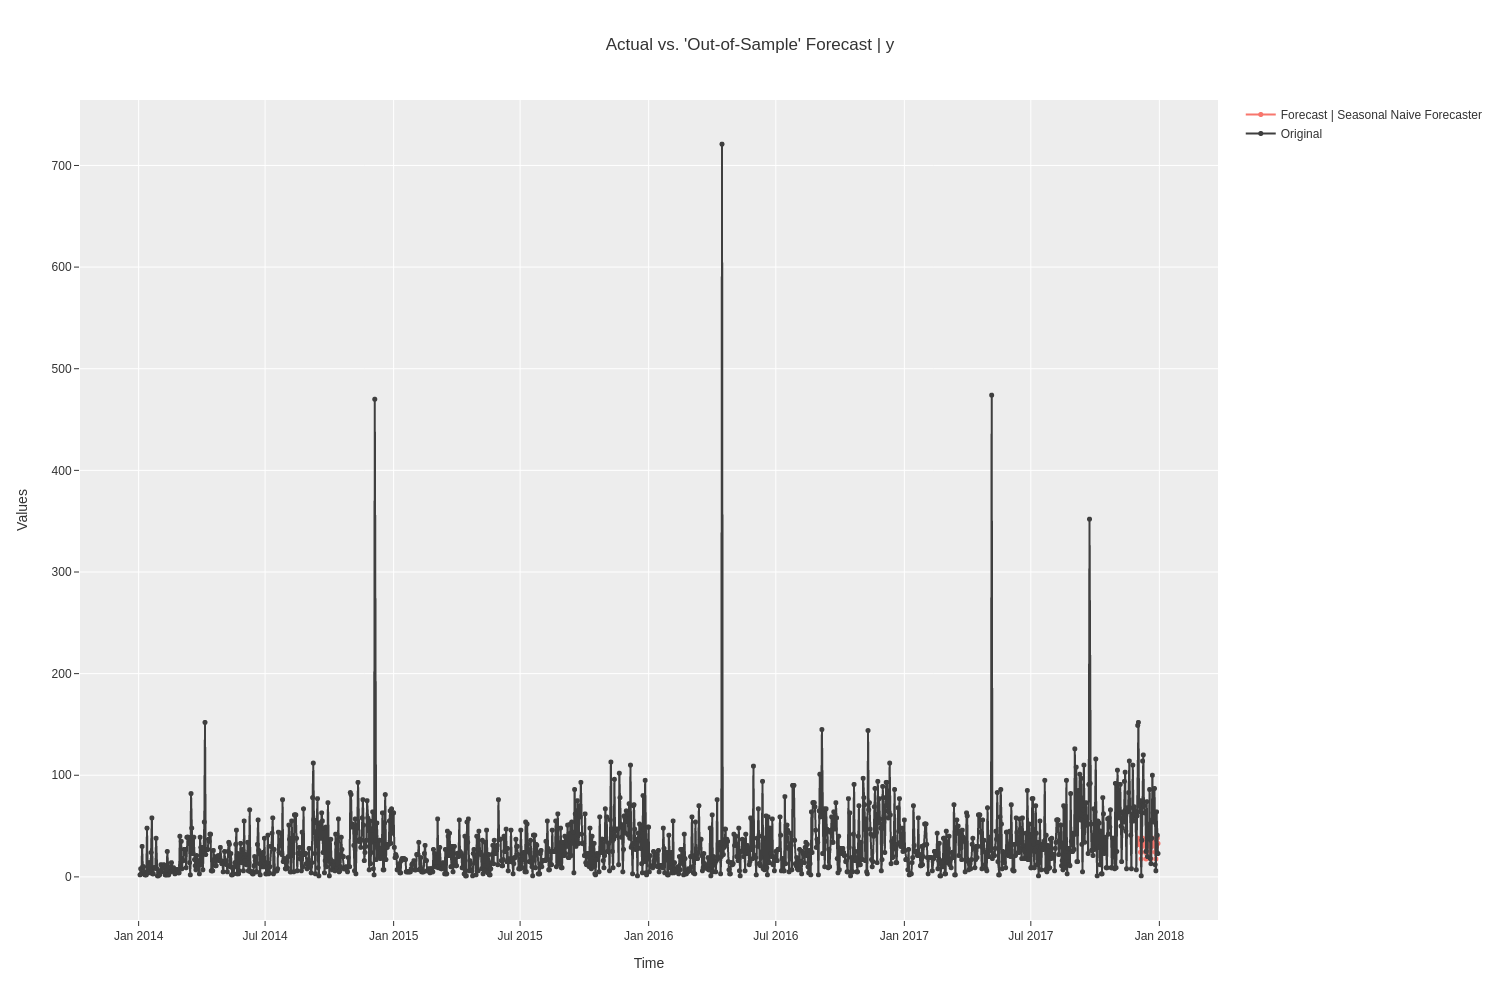

In [ ]:
dsw_exp.plot_model(naive7)

In [ ]:
top_alt = dsw_exp.compare_models(sort=metric, turbo=True, exclude=exclude)

Model        MAE  \
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending    24.2749   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...    24.4622   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...     24.487   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending    24.4984   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending    24.5004   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...    24.5004   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...    24.5095   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending    24.5327   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending    24.5333   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending    25.0861   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...    25.1969   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending    25.4287   
theta                                             Theta Forecaster    26.3209   
polytrend                              Polynomial Trend Forecaster    26.3403   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...    26.3852   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending    26.4721   
ets                                                            ETS    26.5418   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending    27.1768   
grand_means                                 Grand Means Forecaster    27.6933   
exp_smooth                                   Exponential Smoothing    27.9926   
croston                                                    Croston    28.7586   
snaive                                   Seasonal Naive Forecaster      30.42   
arima                                                        ARIMA    31.9505   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending    33.7425   
naive                                             Naive Forecaster    39.7733   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...  3382.3768   

                     RMSE      MAPE   SMAPE      MASE     RMSSE           R2  \
ada_cds_dt        34.2197    1.4342  0.5939     1.082    0.7602      -0.0674   
llar_cds_dt       34.3412    1.3936  0.6001    1.0901    0.7628      -0.0741   
omp_cds_dt        34.3942    1.3917  0.6007    1.0913     0.764      -0.0794   
ridge_cds_dt      34.3896    1.3918  0.6019    1.0918    0.7639      -0.0764   
lr_cds_dt         34.3919    1.3922  0.6019    1.0919     0.764      -0.0765   
lar_cds_dt        34.3919    1.3922  0.6019    1.0919     0.764      -0.0765   
br_cds_dt         34.4061    1.3912  0.6013    1.0921    0.7643      -0.0792   
lasso_cds_dt      34.4245    1.3904  0.6021    1.0932    0.7647      -0.0806   
en_cds_dt         34.4254    1.3904  0.6021    1.0932    0.7647      -0.0807   
rf_cds_dt         35.3156    1.2864  0.6119    1.1172    0.7842      -0.1348   
gbr_cds_dt        35.2973    1.4477  0.6152    1.1232    0.7841      -0.1451   
huber_cds_dt      35.6598     1.136   0.633    1.1323     0.792       -0.154   
theta              36.438     1.527  0.6283    1.1709    0.8086      -0.2171   
polytrend         35.9549    1.6615  0.6392    1.1732    0.7983      -0.1869   
lightgbm_cds_dt   36.4791    1.3888  0.6488    1.1765    0.8104       -0.247   
et_cds_dt         36.7316    1.6872  0.6194    1.1797    0.8155      -0.2757   
ets               36.5962    1.5218  0.6327    1.1806     0.812        -0.24   
knn_cds_dt        37.8887    1.6484  0.6386    1.2143    0.8418      -0.4473   
grand_means       38.3035    1.2891  0.6872    1.2318    0.8501      -0.3578   
exp_smooth        37.8948    1.5059   0.661    1.2446    0.8403      -0.3719   
croston           38.9963    1.9732  0.6698    1.2784    0.8647      -0.4315   
snaive            41.9012    1.3128  0.7713     1.356    0.9303      -0.7243   
arima             42.4206    1.55

In [ ]:
arima = dsw_exp.create_model("arima")


cutoff      MAE     RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2017-07-03  29.8654  36.1020  2.7327  0.9736  1.3622  0.8048 -1.8156
1     2017-08-02  23.2656  28.8465  1.2998  0.7801  1.0524  0.6459 -0.5003
2     2017-09-01  43.4418  73.0568  0.6667  0.7590  1.9499  1.6422 -0.4039
3     2017-10-01  27.0961  31.1589  2.4312  0.8203  1.1840  0.6771 -0.2273
4     2017-10-31  36.0836  42.9390  0.6231  0.9190  1.5753  0.9389 -1.1956
Mean         NaT  31.9505  42.4206  1.5507  0.8504  1.4248  0.9418 -0.8285
SD           NaT   7.1059  16.0614  0.8806  0.0826  0.3159  0.3652  0.5930

In [ ]:
arima_holdout = dsw_exp.predict_model(arima)

Model      MAE     RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0  ARIMA  25.1265  35.5082  1.0446  0.5905  1.0971  0.7812  0.1697

In [ ]:
top_holdout = dsw_exp.predict_model(top_alt)

Model      MAE     RMSE    MAPE   SMAPE    MASE  RMSSE      R2
0  AdaBoostRegressor  28.9768  37.8182  1.7084  0.5744  1.2652  0.832  0.0582